In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import datetime
from datetime import datetime
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [2]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))

In [3]:
def outliers_iqr(ys):
    """–§—É–Ω–∫—Ü–∏—è –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç –º–µ–∂–∫–≤–∞—Ä—Ç–∏–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –∏ –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç 1.5 –º–µ–∂–∫–≤–∞—Ä—Ç–∏–ª—å–Ω—ã—Ö —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è —Å –æ–±–µ–∏—Ö
 —Å—Ç–æ—Ä–æ–Ω –æ—Ç —ç—Ç–æ–≥–æ –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞. –° –µ—ë –ø–æ–º–æ—â—å—é –∏–∑–±–∞–≤–∏–º—Å—è –æ—Ç –≤—ã–±—Ä–æ—Å–æ–≤."""
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return lower_bound, upper_bound

In [4]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option('display.max_columns', None)

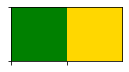

In [5]:
colors = ['green', 'gold']
sns.palplot(sns.color_palette(colors))

## –û—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö

–ó–∞–≥—Ä—É–∑–∏–º –Ω–∞—à–∏ –¥–∞–Ω–Ω—ã–µ –∏ –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –Ω–∏—Ö:

In [6]:
df1 = pd.read_csv('tab1.csv')
df2 = pd.read_csv('tab2.csv')

In [7]:
df1.head()

–≥–æ–¥        –î–∞—Ç–∞   –ú–µ—Å—è—Ü     –ù–∞–∑–≤–∞–Ω–∏–µ      –§–æ—Ä–º–∞—Ç –¢–µ–≥ (–∫—É—Ä—Å)       –õ–∏–Ω–µ–π–∫–∞  \
0  2019  15.01.2020  —è–Ω–≤–∞—Ä—å     Flatingo  –ò–Ω—Ç–µ–≥—Ä–∞—Ü–∏—è         GD        –ö–æ–¥–∏–Ω–≥   
1  2020  15.01.2020  —è–Ω–≤–∞—Ä—å    Johe News  –ò–Ω—Ç–µ–≥—Ä–∞—Ü–∏—è        PWS        –ö–æ–¥–∏–Ω–≥   
2  2020  15.01.2020  —è–Ω–≤–∞—Ä—å  PRO —Ä–æ–±–æ—Ç–æ–≤  –ò–Ω—Ç–µ–≥—Ä–∞—Ü–∏—è        DST  Data Science   
3  2020  15.01.2020  —è–Ω–≤–∞—Ä—å     –•–∞—É–¥–∏ –•–æ  –ò–Ω—Ç–µ–≥—Ä–∞—Ü–∏—è        PWS        –ö–æ–¥–∏–Ω–≥   
4  2020  15.01.2020  —è–Ω–≤–∞—Ä—å      Foo52ru  –ò–Ω—Ç–µ–≥—Ä–∞—Ü–∏—è        DST  Data Science   

  –ü–æ–¥–ø–∏—Å—á–∏–∫–∏ –û—Ö–≤–∞—Ç –§–∞–∫—Ç    –†–∞—Å—Ö–æ–¥   CPC    –°TR –í–∏–∑–∏—Ç—ã –§–∞–∫—Ç –°1 –§–∞–∫—Ç  \
0     52 027     42¬†225   —Ä.4¬†500  —Ä.15  0,72%         304   11,2%   
1      9¬†000      6¬†389   —Ä.5¬†000  —Ä.40  1,94%         124    4,0%   
2     38¬†000      6¬†900   —Ä.7¬†500  —Ä.46  2,38%         164    7,9%   
3    842¬†000     50¬†000  —Ä.25¬†000  —Ä.15  3,39%        1697    6,5%   
4     35¬†000     22¬†000  —Ä.25¬†000  —Ä.60  1,90%         418    4,3%   

   –ó–∞—è–≤–∫–∏ –§–∞–∫—Ç –°2 –§–∞–∫—Ç –û–ø–ª–∞—Ç—ã –§–∞–∫—Ç  –î–æ—Ö–æ–¥      CPL   ROMI  \
0     34.00000    0,0%           0      0    —Ä.132  -100%   
1      5.00000    0,0%           0      0  —Ä.1¬†000  -100%   
2     13.00000   23,1%           3      4    —Ä.577  3380%   
3    111.00000    5,4%           6      4    —Ä.225  1044%   
4     18.00000   11,1%           2      3  —Ä.1¬†389   620%   

                                –°—Å—ã–ª–∫–∞ –Ω–∞ —Ä–∞–∑–º–µ—â–µ–Ω–∏–µ Unnamed: 21 Unnamed: 22  \
0        https://www.youtube.com/watch?v=aqSjawK_QwA         NaN         NaN   
1  https://www.youtube.com/watch?v=o7h1-6U1u1g&t=...         NaN         NaN   
2  https://www.youtube.com/watch?v=mk8OsCBZ-yw&fe...         NaN         NaN   
3                       https://youtu.be/M8fhrtvedHA         NaN         NaN   
4        https://www.youtube.com/watch?v=J9ZgrTAFw60         NaN         NaN   

  Unnamed: 23  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   –≥–æ–¥                   587 non-null    int64  
 1   –î–∞—Ç–∞                  587 non-null    object 
 2   –ú–µ—Å—è—Ü                 587 non-null    object 
 3   –ù–∞–∑–≤–∞–Ω–∏–µ              587 non-null    object 
 4   –§–æ—Ä–º–∞—Ç                587 non-null    object 
 5   –¢–µ–≥ (–∫—É—Ä—Å)            587 non-null    object 
 6   –õ–∏–Ω–µ–π–∫–∞               587 non-null    object 
 7   –ü–æ–¥–ø–∏—Å—á–∏–∫–∏            575 non-null    object 
 8   –û—Ö–≤–∞—Ç –§–∞–∫—Ç            579 non-null    object 
 9   –†–∞—Å—Ö–æ–¥                587 non-null    object 
 10  CPC                   578 non-null    object 
 11  –°TR                   577 non-null    object 
 12  –í–∏–∑–∏—Ç—ã –§–∞–∫—Ç           575 non-null    object 
 13  –°1 –§–∞–∫—Ç               576 non-null    object

In [9]:
# –ü–µ—Ä–µ–∏–º–µ–Ω—É–µ–º —Å—Ç–æ–ª–±—Ü—ã
df1 = df1.rename(columns={'–°—Å—ã–ª–∫–∞ –Ω–∞ —Ä–∞–∑–º–µ—â–µ–Ω–∏–µ':'link','–û—Ö–≤–∞—Ç –§–∞–∫—Ç':'–û—Ö–≤–∞—Ç_–§–∞–∫—Ç','–¢–µ–≥ (–∫—É—Ä—Å)':'–¢–µ–≥_(–∫—É—Ä—Å)',
                          '–í–∏–∑–∏—Ç—ã –§–∞–∫—Ç':'–í–∏–∑–∏—Ç—ã_–§–∞–∫—Ç','–ó–∞—è–≤–∫–∏ –§–∞–∫—Ç':'–ó–∞—è–≤–∫–∏_–§–∞–∫—Ç','–û–ø–ª–∞—Ç—ã –§–∞–∫—Ç':'–û–ø–ª–∞—Ç—ã_–§–∞–∫—Ç',
                         '–°1 –§–∞–∫—Ç':'–°1_–§–∞–∫—Ç','–°2 –§–∞–∫—Ç':'–°2_–§–∞–∫—Ç'})

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   link                               588 non-null    object 
 1   channel_name                       588 non-null    object 
 2   channel_subscribers                587 non-null    float64
 3   video_name                         588 non-null    object 
 4   video_date                         588 non-null    object 
 5   video_year                         588 non-null    int64  
 6   video_month                        588 non-null    object 
 7   day_of_week                        588 non-null    object 
 8   views                              588 non-null    int64  
 9   video_duration                     588 non-null    object 
 10  time_of_advertisement              587 non-null    object 
 11  part_of_video_with_ad_from1_to_10  587 non-null    float64

–ó–∞–º–µ—Ç–∏–º, —á—Ç–æ –¥–∞–Ω–Ω—ã–µ –º–æ–∂–Ω–æ –æ–±—ä–µ–¥–∏–Ω–∏—Ç—å –ø–æ —Å—Ç–æ–ª–±—Ü—É 'link', –æ–±—Ä–∞–±–æ—Ç–∞–µ–º –µ–≥–æ –≤ –æ–±–µ–∏—Ö —Ç–∞–±–ª–∏—Ü–∞—Ö, —á—Ç–æ–±—ã –ø–æ–ª—É—á–∏—Ç—å –±–æ–ª—å—à–µ –ø–µ—Ä–µ—Å–µ—á–µ–Ω–∏–π

In [11]:
df2['link_true'] = df2['link'].apply(lambda x: x.split('=')[1])

In [12]:
df1['link_true'] = df1['link'].apply(lambda x: x.split('=')[1] if '=' in x else x)
df1['link_true'] = df1['link_true'].apply(lambda x: x.split('&')[0] if '&' in x else x)
df1['link_true'] = df1['link_true'].apply(lambda x: x.split('/')[3] if 'https' in x else x)
df1['link_true'] = df1['link_true'].apply(lambda x: x.split('#')[0] if '#' in x else x)

In [13]:
num_links = [137,192,276,354,358,359,361,363,368,373,383,
            408,410,412,413,414,420,425,435,440,446,448,
             450,457,469,473,479,480,481,482,484,485,486,
            488,494,499,510,511,514,519,522,530,533,538,
             539,540,548,549,550,551,553,555,556,558,561,
             571,572,576,578,579,581,583,585
            ]

In [14]:
for i in num_links:
    k = df1.link[i].split('/')[3][0:11]
    df1['link_true'][i] = k

<ipython-input-14-2cc6a3e65a91>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['link_true'][i] = k


–û–±—ä–µ–¥–∏–Ω–∏–º –¥–∞–Ω–Ω—ã–µ –ø–æ –Ω–æ–≤–æ–º—É —Å—Ç–æ–ª–±—Ü—É 'link_true'

In [15]:
data = pd.merge(df1,df2, on = 'link_true', how = 'left')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 587 entries, 0 to 586
Data columns (total 47 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   –≥–æ–¥                                587 non-null    int64  
 1   –î–∞—Ç–∞                               587 non-null    object 
 2   –ú–µ—Å—è—Ü                              587 non-null    object 
 3   –ù–∞–∑–≤–∞–Ω–∏–µ                           587 non-null    object 
 4   –§–æ—Ä–º–∞—Ç                             587 non-null    object 
 5   –¢–µ–≥_(–∫—É—Ä—Å)                         587 non-null    object 
 6   –õ–∏–Ω–µ–π–∫–∞                            587 non-null    object 
 7   –ü–æ–¥–ø–∏—Å—á–∏–∫–∏                         575 non-null    object 
 8   –û—Ö–≤–∞—Ç_–§–∞–∫—Ç                         579 non-null    object 
 9   –†–∞—Å—Ö–æ–¥                             587 non-null    object 
 10  CPC                                578 non-null    object

## –†–∞–±–æ—Ç–∞ —Å –ø—Ä–æ–ø—É—Å–∫–∞–º–∏

–≥–æ–¥ - 0.0%
–î–∞—Ç–∞ - 0.0%
–ú–µ—Å—è—Ü - 0.0%
–ù–∞–∑–≤–∞–Ω–∏–µ - 0.0%
–§–æ—Ä–º–∞—Ç - 0.0%
–¢–µ–≥_(–∫—É—Ä—Å) - 0.0%
–õ–∏–Ω–µ–π–∫–∞ - 0.0%
–ü–æ–¥–ø–∏—Å—á–∏–∫–∏ - 2.0%
–û—Ö–≤–∞—Ç_–§–∞–∫—Ç - 1.0%
–†–∞—Å—Ö–æ–¥ - 0.0%
CPC - 2.0%
–°TR - 2.0%
–í–∏–∑–∏—Ç—ã_–§–∞–∫—Ç - 2.0%
–°1_–§–∞–∫—Ç - 2.0%
–ó–∞—è–≤–∫–∏_–§–∞–∫—Ç - 3.0%
–°2_–§–∞–∫—Ç - 0.0%
–û–ø–ª–∞—Ç—ã_–§–∞–∫—Ç - 3.0%
–î–æ—Ö–æ–¥ - 0.0%
CPL - 7.0%
ROMI - 13.0%
link_x - 0.0%
Unnamed: 21 - 100.0%
Unnamed: 22 - 100.0%
Unnamed: 23 - 97.0%
link_true - 0.0%
link_y - 3.0%
channel_name - 3.0%
channel_subscribers - 3.0%
video_name - 3.0%
video_date - 3.0%
video_year - 3.0%
video_month - 3.0%
day_of_week - 3.0%
views - 3.0%
video_duration - 3.0%
time_of_advertisement - 3.0%
part_of_video_with_ad_from1_to_10 - 3.0%
video_category - 3.0%
comments - 3.0%
likes - 3.0%
dislikes - 3.0%
tags - 7.0%
description - 3.0%
promocode - 13.0%
discount_percentage - 12.0%
discount_until_date - 28.0%
ER - 3.0%


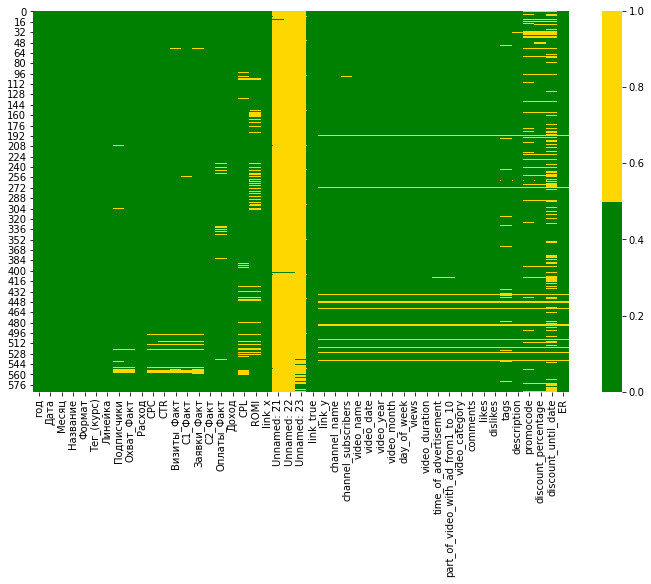

In [17]:
cols = data.columns
fig, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colors))

# –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ –ø—Ä–æ—Ü–µ–Ω—Ç–∞—Ö –ø–æ —Å—Ç–æ–ª–±—Ü–∞–º:
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print(f'{col} - {round(pct_missing*100)}%')

–û—á–µ–Ω—å –±–æ–ª—å—à–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ —Å—Ç–æ–ª–±—Ü–∞—Ö Unnamed: 21,Unnamed: 22,Unnamed: 23. –ü–æ—á—Ç–∏ 100% , –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞ –æ–Ω–∏ –Ω–∞–º –Ω–µ –ø—Ä–∏–≥–æ–¥—è—Ç—Å—è, —É–¥–∞–ª–∏–º –∏—Ö

In [18]:
data = data.drop(['Unnamed: 21','Unnamed: 22','Unnamed: 23'], axis = 1)

## –ê–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö

In [19]:
data.head()

–≥–æ–¥        –î–∞—Ç–∞   –ú–µ—Å—è—Ü     –ù–∞–∑–≤–∞–Ω–∏–µ      –§–æ—Ä–º–∞—Ç –¢–µ–≥_(–∫—É—Ä—Å)       –õ–∏–Ω–µ–π–∫–∞  \
0  2019  15.01.2020  —è–Ω–≤–∞—Ä—å     Flatingo  –ò–Ω—Ç–µ–≥—Ä–∞—Ü–∏—è         GD        –ö–æ–¥–∏–Ω–≥   
1  2020  15.01.2020  —è–Ω–≤–∞—Ä—å    Johe News  –ò–Ω—Ç–µ–≥—Ä–∞—Ü–∏—è        PWS        –ö–æ–¥–∏–Ω–≥   
2  2020  15.01.2020  —è–Ω–≤–∞—Ä—å  PRO —Ä–æ–±–æ—Ç–æ–≤  –ò–Ω—Ç–µ–≥—Ä–∞—Ü–∏—è        DST  Data Science   
3  2020  15.01.2020  —è–Ω–≤–∞—Ä—å     –•–∞—É–¥–∏ –•–æ  –ò–Ω—Ç–µ–≥—Ä–∞—Ü–∏—è        PWS        –ö–æ–¥–∏–Ω–≥   
4  2020  15.01.2020  —è–Ω–≤–∞—Ä—å      Foo52ru  –ò–Ω—Ç–µ–≥—Ä–∞—Ü–∏—è        DST  Data Science   

  –ü–æ–¥–ø–∏—Å—á–∏–∫–∏ –û—Ö–≤–∞—Ç_–§–∞–∫—Ç    –†–∞—Å—Ö–æ–¥   CPC    –°TR –í–∏–∑–∏—Ç—ã_–§–∞–∫—Ç –°1_–§–∞–∫—Ç  \
0     52 027     42¬†225   —Ä.4¬†500  —Ä.15  0,72%         304   11,2%   
1      9¬†000      6¬†389   —Ä.5¬†000  —Ä.40  1,94%         124    4,0%   
2     38¬†000      6¬†900   —Ä.7¬†500  —Ä.46  2,38%         164    7,9%   
3    842¬†000     50¬†000  —Ä.25¬†000  —Ä.15  3,39%        1697    6,5%   
4     35¬†000     22¬†000  —Ä.25¬†000  —Ä.60  1,90%         418    4,3%   

   –ó–∞—è–≤–∫–∏_–§–∞–∫—Ç –°2_–§–∞–∫—Ç –û–ø–ª–∞—Ç—ã_–§–∞–∫—Ç  –î–æ—Ö–æ–¥      CPL   ROMI  \
0     34.00000    0,0%           0      0    —Ä.132  -100%   
1      5.00000    0,0%           0      0  —Ä.1¬†000  -100%   
2     13.00000   23,1%           3      4    —Ä.577  3380%   
3    111.00000    5,4%           6      4    —Ä.225  1044%   
4     18.00000   11,1%           2      3  —Ä.1¬†389   620%   

                                              link_x    link_true  \
0        https://www.youtube.com/watch?v=aqSjawK_QwA  aqSjawK_QwA   
1  https://www.youtube.com/watch?v=o7h1-6U1u1g&t=...  o7h1-6U1u1g   
2  https://www.youtube.com/watch?v=mk8OsCBZ-yw&fe...  mk8OsCBZ-yw   
3                       https://youtu.be/M8fhrtvedHA  M8fhrtvedHA   
4        https://www.youtube.com/watch?v=J9ZgrTAFw60  J9ZgrTAFw60   

                                        link_y                   channel_name  \
0  https://www.youtube.com/watch?v=aqSjawK_QwA      Flatingo. –†–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫ –∏–≥—Ä   
1  https://www.youtube.com/watch?v=o7h1-6U1u1g                      Johe News   
2  https://www.youtube.com/watch?v=mk8OsCBZ-yw                    PRO —Ä–æ–±–æ—Ç–æ–≤   
3  https://www.youtube.com/watch?v=M8fhrtvedHA  –•–∞—É–¥–∏ –•–æ‚Ñ¢ - –ü—Ä–æ—Å—Ç–æ –æ –º–∏—Ä–µ IT!   
4  https://www.youtube.com/watch?v=J9ZgrTAFw60             foo52ru –¢–µ—Ö–Ω–æ–®–∞–º–∞–Ω   

   channel_subscribers                                         video_name  \
0         270000.00000  –ö–∞–∫ —Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫–∏ –¥–µ–ª—è—Ç –∏–≥—Ä—ã / –°–æ–∑–¥–∞–Ω–∏–µ –∏–≥—Ä –∏ –∏...   
1          14600.00000                        Raspberry Pi –ª—É—á—à–∏–µ –ø—Ä–æ–µ–∫—Ç—ã   
2         136000.00000  20+ –°–∞–º—ã—Ö –ù–µ–≤–µ—Ä–æ—è—Ç–Ω—ã—Ö –ò–∑–æ–±—Ä–µ—Ç–µ–Ω–∏–π, –ö–æ—Ç–æ—Ä—ã–µ –ò–∑–º...   
3        1560000.00000                      –ü–∏—à–µ–º TELEGRAM –±–æ—Ç–∞ –Ω–∞ Python   
4          62100.00000  –ù–µ–π—Ä–æ–Ω–Ω–∞—è —Å–µ—Ç—å. –ß–∞—Å—Ç—å 6. –ü—Ä–∏–∫—Ä—É—á–∏–≤–∞—é –Ω–µ–π—Ä–æ—Å–µ—Ç—å...   

            video_date  video_year video_month day_of_week        views  \
0   2019-01-14 4:23:02  2019.00000     January      Monday 107619.00000   
1  2020-01-17 11:58:16  2020.00000     January      Friday  62889.00000   
2  2020-01-23 13:33:38  2020.00000     January    Thursday 112566.00000   
3  2020-01-24 18:33:25  2020.00000     January      Friday 560514.00000   
4   2020-01-24 4:44:31  2020.00000     January      Friday  59620.00000   

  video_duration time_of_advertisement  part_of_video_with_ad_from1_to_10  \
0          3M46S                 00m02                            1.00000   
1         31M41S                 02m42                            2.00000   
2         10M14S                 04m13                            5.00000   
3         12M58S                 06m52                            6.00000   
4          9M23S                 00m43                            2.00000   

       vi

–í –∫–∞—á–µ—Å—Ç–≤–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π —è –≤—ã–±—Ä–∞–ª 'ROMI'-–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –≤–æ–∑—Ä–∞—Ç–∞ –∏–Ω–≤–µ—Å—Ç–∏—Ü–∏–π. –û–Ω –±–æ–ª–µ–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–Ω —á–µ–º –û–ø–ª–∞—Ç—ã –∏–ª–∏ –î–æ—Ö–æ–¥, —Ç–∞–∫ –∫–∞–∫ –æ–Ω —É—á–∏—Ç—ã–≤–∞–µ—Ç –∑–∞—Ç–∞—Ä–∞—á–µ–Ω–Ω—ã–µ –Ω–∞ —Ä–µ–∫–ª–∞–º—É —Å—Ä–µ–¥—Å—Ç–≤–∞ –∏ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç "—á–∏—Å—Ç—ã–π –≤—ã—Ö–ª–æ–ø". 

–ü–æ —É—Å–ª–æ–≤–∏—é —É –Ω–∞—Å –æ—à–∏–±–∫–∏ –≤ —Å—Ç–æ–ª–±—Ü–∞—Ö '–î–∞—Ç–∞'–∏ '–ú–µ—Å—è—Ü' –ø–æ–∫–∞ –æ—Å—Ç–∞–≤–∏–º –∏—Ö –±–µ–∑ —Ä–∞—Å—Å–º–æ—Ç—Ä–µ–Ω–∏—è

–í—ã–¥–µ–ª–∏–º —á–∏—Å–ª–æ–≤—ã–µ —Å—Ç–æ–ª–±—Ü—ã:

In [20]:
#num_cols = ['–ü–æ–¥–ø–∏—Å—á–∏–∫–∏','–û—Ö–≤–∞—Ç_–§–∞–∫—Ç','–†–∞—Å—Ö–æ–¥','CPC', '–°TR', '–í–∏–∑–∏—Ç—ã_–§–∞–∫—Ç',
          #  '–°1_–§–∞–∫—Ç','–°2_–§–∞–∫—Ç','–û–ø–ª–∞—Ç—ã_–§–∞–∫—Ç','–î–æ—Ö–æ–¥','CPL','ROMI',
           # 'channel_subscribers','views','time_of_advertisement',
          # 'comments','likes','dislikes','part_of_video_with_ad_from1_to_10'
         #  'discount_percentage','ER']


–ü—Ä–∏–≤–µ–¥–µ–º —ç—Ç–∏ —Å—Ç–æ–ª–±—Ü—ã –∫ —á–∏—Å–ª–æ–≤–æ–º—É –≤–∏–¥—É, —Ç–∞–∫ –∫–∞–∫ —á–∞—Å—Ç–æ –∏—Ö —Ç–∏–ø —ç—Ç–æ -object

In [21]:
data['–ü–æ–¥–ø–∏—Å—á–∏–∫–∏2'] = data['–ü–æ–¥–ø–∏—Å—á–∏–∫–∏'].replace(r'\s+','',regex=True)
data['–ü–æ–¥–ø–∏—Å—á–∏–∫–∏2'] = data['–ü–æ–¥–ø–∏—Å—á–∏–∫–∏2'].astype(np.float64)

In [22]:
data['–ü–æ–¥–ø–∏—Å—á–∏–∫–∏2'].isna().sum()

12

In [23]:
data['–ü–æ–¥–ø–∏—Å—á–∏–∫–∏2'].describe()

count        575.00000
mean      749422.80522
std      1303927.25059
min         1000.00000
25%       166000.00000
50%       439000.00000
75%       842000.00000
max     18300000.00000
Name: –ü–æ–¥–ø–∏—Å—á–∏–∫–∏2, dtype: float64

In [24]:
#–ó–∞–º–µ–Ω–∏–º –ø—Ä–æ–ø—É—Å–∫–∏ –Ω–∞ –Ω–æ–ª—å, –ø–æ —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏ –∑–∞–∫–∞–∑—á–∏–∫–∞
data['–ü–æ–¥–ø–∏—Å—á–∏–∫–∏2'].fillna(0,inplace=True)

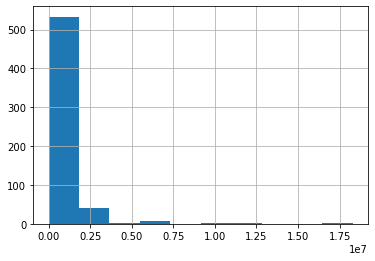

In [25]:
data['–ü–æ–¥–ø–∏—Å—á–∏–∫–∏2'].hist()

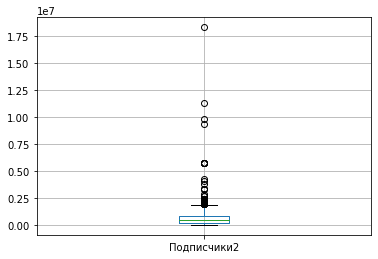

In [26]:
data.boxplot(column=['–ü–æ–¥–ø–∏—Å—á–∏–∫–∏2'])

In [27]:
#–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –≤—ã–±—Ä–æ—Å—ã:
data[data['–ü–æ–¥–ø–∏—Å—á–∏–∫–∏2']>7200000]

–≥–æ–¥        –î–∞—Ç–∞     –ú–µ—Å—è—Ü   –ù–∞–∑–≤–∞–Ω–∏–µ      –§–æ—Ä–º–∞—Ç –¢–µ–≥_(–∫—É—Ä—Å)  \
92   2020  18.06.2020      –∏—é–Ω—å   –†–µ–¥–∞–∫—Ü–∏—è  –ò–Ω—Ç–µ–≥—Ä–∞—Ü–∏—è       DSPR   
117  2020  03.07.2020      –∏—é–ª—å  wylsa.com  –ò–Ω—Ç–µ–≥—Ä–∞—Ü–∏—è        PWS   
180  2020  16.08.2020    –∞–≤–≥—É—Å—Ç   –†–µ–¥–∞–∫—Ü–∏—è  –ò–Ω—Ç–µ–≥—Ä–∞—Ü–∏—è       DAPR   
234  2020  13.09.2020  —Å–µ–Ω—Ç—è–±—Ä—å   –í–∞—Ä–ª–∞–º–æ–≤  –ò–Ω—Ç–µ–≥—Ä–∞—Ü–∏—è        PWS   

          –õ–∏–Ω–µ–π–∫–∞  –ü–æ–¥–ø–∏—Å—á–∏–∫–∏ –û—Ö–≤–∞—Ç_–§–∞–∫—Ç     –†–∞—Å—Ö–æ–¥    CPC    –°TR –í–∏–∑–∏—Ç—ã_–§–∞–∫—Ç  \
92   Data Science    11250000  1¬†700¬†000  —Ä.550¬†000  —Ä.284  0,11%        1934   
117        –ö–æ–¥–∏–Ω–≥   9¬†300¬†000    268¬†000  —Ä.250¬†000  —Ä.207  0,45%        1206   
180     –ê–Ω–∞–ª–∏—Ç–∏–∫–∞   9¬†830¬†000  1¬†486¬†873  —Ä.530¬†000  —Ä.265  0,13%        2000   
234        –ö–æ–¥–∏–Ω–≥  18¬†300¬†000    577¬†287  —Ä.570¬†000  —Ä.748  0,13%         762   

    –°1_–§–∞–∫—Ç  –ó–∞—è–≤–∫–∏_–§–∞–∫—Ç –°2_–§–∞–∫—Ç –û–ø–ª–∞—Ç—ã_–§–∞–∫—Ç  –î–æ—Ö–æ–¥       CPL  ROMI  \
92    4,19%     81.00000   19,8%          16      8   —Ä.6¬†790  208%   
117   3,65%     44.00000    6,8%           3      4   —Ä.5¬†682   -8%   
180   7,00%    140.00000    9,3%          13      8   —Ä.3¬†786   91%   
234   4,72%     36.00000   25,0%           9      7  —Ä.15¬†833    0%   

                                                link_x    link_true  \
92         https://www.youtube.com/watch?v=w5At9uSbc0o  w5At9uSbc0o   
117  https://www.youtube.com/watch?v=l2pcUBxugcY&fe...  l2pcUBxugcY   
180        https://www.youtube.com/watch?v=vAhlHjUKLSA  vAhlHjUKLSA   
234  https://www.youtube.com/watch?v=gaMTD093uEg&t=...  gaMTD093uEg   

                                          link_y channel_name  \
92   https://www.youtube.com/watch?v=w5At9uSbc0o     –†–µ–¥–∞–∫—Ü–∏—è   
117  https://www.youtube.com/watch?v=l2pcUBxugcY     Wylsacom   
180  https://www.youtube.com/watch?v=vAhlHjUKLSA     –†–µ–¥–∞–∫—Ü–∏—è   
234  https://www.youtube.com/watch?v=gaMTD093uEg     varlamov   

     channel_subscribers                                         video_name  \
92         2150000.00000  25 –ª–µ—Ç –æ—Å–≤–æ–±–æ–∂–¥–µ–Ω–∏—é –∑–∞–ª–æ–∂–Ω–∏–∫–æ–≤ –≤ –ë—É–¥—ë–Ω–Ω–æ–≤—Å–∫–µ /...   
117        9860000.00000            iPhone —Å –ê–≤–∏—Ç–æ - –∫–∞–∫ –∫—É–ø–∏—Ç—å –±–µ–∑ –æ–±–º–∞–Ω–∞?   
180        2150000.00000  –†–µ–¥–∞–∫—Ü–∏—è. News: –ø—Ä–æ—Ç–µ—Å—Ç—ã –≤ –ë–µ–ª–∞—Ä—É—Å–∏, –ª–µ–∫–∞—Ä—Å—Ç–≤–æ...   
234        2450000.00000  –ß—ë –ü—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç #26 | –°–∏–º–æ–Ω—å—è–Ω –Ω–∞ –ø–æ–∫–ª–æ–Ω–µ —É –õ—É–∫–∞...   

              video_date  video_year video_month day_of_week         views  \
92   2020-07-02 11:37:26  2020.00000        July    Thursday 3422812.00000   
117  2020-07-25 16:36:55  2020.00000        July    Saturday  309745.00000   
180   2020-08-16 8:39:31  2020.00000      August      Sunday 1501496.00000   
234  2020-09-13 13:39:57  2020.00000   September      Sunday  606076.00000   

    video_duration time_of_advertisement  part_of_video_with_ad_from1_to_10  \
92        1H39M29S                 03m08                            1.00000   
117         12M55S                 01m54                            2.00000   
180          22M5S                 03m14                            2.00000   
234       1H47M31S                 17m33                            3.00000   

         video_category    comments        likes   dislikes  \
92         –õ—é–¥–∏ –∏ –±–ª–æ–≥–∏ 15837.00000 118444.00000 3773.00000   
117  –ù–∞—É–∫–∞ –∏ —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏–∏ 15398.00000  23993.00000 2619.00000   
180        –õ—é–¥–∏ –∏ –±–ª–æ–≥–∏  7969.00000  87836.00000 4493.00000   
234  –ù–æ–≤–æ—Å—Ç–∏ –∏ –ø–æ–ª–∏—Ç–∏–∫–∞  4234.00000  35360.00000 1385.00000   

                                                  tags  \
92   ['—Ä–µ–¥–∞–∫—Ü–∏—è', '–ø–∏–≤–æ–≤–∞—Ä–æ–≤', '–∞–ª–µ–∫—Å–µ–π –ø–∏–≤–æ–≤–∞—Ä–æ–≤',...   
117  ['iPhone', 'Apple', 'wylsa', 'Wylsacom', '–∞–≤–∏—Ç...   
180  ['—Ä–µ–¥–∞–∫—Ü–∏—è', '–ø–∏–≤–æ–≤–∞—Ä–æ–≤', '–∞–ª–µ–∫—Å

In [28]:
# 234 –í–∞—Ä–ª–∞–º–æ–≤ —è–≤–Ω–æ –æ–ø–µ—á–∞—Ç–∫–∞, –µ—Å–ª–∏ –ø—Ä–æ–π—Ç–∏ –ø–æ —Å—Å—ã–ª–∫–µ —Å–µ–π—á–∞—Å –Ω–∞ –∫–∞–Ω–∞–ª–µ 2.5–º–ª–Ω –ø–æ–¥–ø–∏—Å—á–∏–∫–æ–≤, –∑–∞–º–µ–Ω–∏–º –∑–Ω–∞—á–µ–Ω–∏–µ
data['–ü–æ–¥–ø–∏—Å—á–∏–∫–∏2'] = data['–ü–æ–¥–ø–∏—Å—á–∏–∫–∏2'].replace(18300000,1830000)                           

In [29]:
# 92 –†–µ–¥–∞–∫—Ü–∏—è –æ–ø–µ—á–∞—Ç–∫–∞, –Ω–∞ –∫–∞–Ω–∞–ª–µ —Å–µ–π—á–∞—Å 2.18 –º–ª–Ω –ø–æ–¥–ø–∏—Å—á–∏–∫–æ–≤
data['–ü–æ–¥–ø–∏—Å—á–∏–∫–∏2'] = data['–ü–æ–¥–ø–∏—Å—á–∏–∫–∏2'].replace(11250000,1125000)
# 180 –†–µ–¥–∞–∫—Ü–∏—è –æ–ø–µ—á–∞—Ç–∫–∞, –Ω–∞ –∫–∞–Ω–∞–ª–µ —Å–µ–π—á–∞—Å 2.18 –º–ª–Ω –ø–æ–¥–ø–∏—Å—á–∏–∫–æ–≤
data['–ü–æ–¥–ø–∏—Å—á–∏–∫–∏2'] = data['–ü–æ–¥–ø–∏—Å—á–∏–∫–∏2'].replace(9830000,983000)

In [30]:
# 117 wylsa.com, –æ—Å—Ç–∞–≤–∏–º –∑–Ω–∞—á–µ–Ω–∏–µ, –Ω–∞ –∫–∞–Ω–∞–ª–µ —Å–µ–π—á–∞—Å 9.88 –º–ª–Ω –ø–æ–¥–ø–∏—Å—á–∏–∫–æ–≤

In [31]:
data[data['–ü–æ–¥–ø–∏—Å—á–∏–∫–∏2']>7000000]

–≥–æ–¥        –î–∞—Ç–∞ –ú–µ—Å—è—Ü   –ù–∞–∑–≤–∞–Ω–∏–µ      –§–æ—Ä–º–∞—Ç –¢–µ–≥_(–∫—É—Ä—Å) –õ–∏–Ω–µ–π–∫–∞  \
117  2020  03.07.2020  –∏—é–ª—å  wylsa.com  –ò–Ω—Ç–µ–≥—Ä–∞—Ü–∏—è        PWS  –ö–æ–¥–∏–Ω–≥   

    –ü–æ–¥–ø–∏—Å—á–∏–∫–∏ –û—Ö–≤–∞—Ç_–§–∞–∫—Ç     –†–∞—Å—Ö–æ–¥    CPC    –°TR –í–∏–∑–∏—Ç—ã_–§–∞–∫—Ç –°1_–§–∞–∫—Ç  \
117  9¬†300¬†000    268¬†000  —Ä.250¬†000  —Ä.207  0,45%        1206   3,65%   

     –ó–∞—è–≤–∫–∏_–§–∞–∫—Ç –°2_–§–∞–∫—Ç –û–ø–ª–∞—Ç—ã_–§–∞–∫—Ç  –î–æ—Ö–æ–¥      CPL ROMI  \
117     44.00000    6,8%           3      4  —Ä.5¬†682  -8%   

                                                link_x    link_true  \
117  https://www.youtube.com/watch?v=l2pcUBxugcY&fe...  l2pcUBxugcY   

                                          link_y channel_name  \
117  https://www.youtube.com/watch?v=l2pcUBxugcY     Wylsacom   

     channel_subscribers                               video_name  \
117        9860000.00000  iPhone —Å –ê–≤–∏—Ç–æ - –∫–∞–∫ –∫—É–ø–∏—Ç—å –±–µ–∑ –æ–±–º–∞–Ω–∞?   

              video_date  video_year video_month day_of_week        views  \
117  2020-07-25 16:36:55  2020.00000        July    Saturday 309745.00000   

    video_duration time_of_advertisement  part_of_video_with_ad_from1_to_10  \
117         12M55S                 01m54                            2.00000   

         video_category    comments       likes   dislikes  \
117  –ù–∞—É–∫–∞ –∏ —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏–∏ 15398.00000 23993.00000 2619.00000   

                                                  tags  \
117  ['iPhone', 'Apple', 'wylsa', 'Wylsacom', '–∞–≤–∏—Ç...   

                                           description promocode  \
117  –ö—É—Ä—Å ¬´Python –¥–ª—è –≤–µ–±-—Ä–∞–∑—Ä–∞–±–æ—Ç–∫–∏¬ª –≤ SkillFactor...     WYLSA   

    discount_percentage discount_until_date     ER   –ü–æ–¥–ø–∏—Å—á–∏–∫–∏2  
117                  50          10.08.2020  0,43% 9300000.00000

In [32]:
data['–û—Ö–≤–∞—Ç_–§–∞–∫—Ç2'] = data['–û—Ö–≤–∞—Ç_–§–∞–∫—Ç'].replace(r'\D+','',regex=True)
data['–û—Ö–≤–∞—Ç_–§–∞–∫—Ç2'] = data['–û—Ö–≤–∞—Ç_–§–∞–∫—Ç2'].astype(np.float64)

In [33]:
data['–û—Ö–≤–∞—Ç_–§–∞–∫—Ç2'].describe()

count        579.00000
mean      258635.72021
std       542210.44286
min          269.00000
25%        54380.50000
50%       150526.00000
75%       264187.00000
max     10000000.00000
Name: –û—Ö–≤–∞—Ç_–§–∞–∫—Ç2, dtype: float64

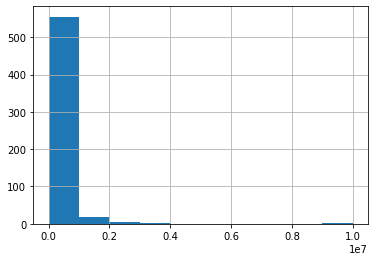

In [34]:
data['–û—Ö–≤–∞—Ç_–§–∞–∫—Ç2'].hist()

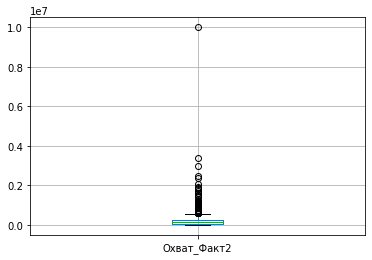

In [35]:
data.boxplot(column=['–û—Ö–≤–∞—Ç_–§–∞–∫—Ç2'])

In [36]:
data[data['–û—Ö–≤–∞—Ç_–§–∞–∫—Ç2']>5000000]

–≥–æ–¥        –î–∞—Ç–∞   –ú–µ—Å—è—Ü  –ù–∞–∑–≤–∞–Ω–∏–µ      –§–æ—Ä–º–∞—Ç –¢–µ–≥_(–∫—É—Ä—Å)       –õ–∏–Ω–µ–π–∫–∞  \
196  2020  25.08.2020  –∞–≤–≥—É—Å—Ç  The –õ—é–¥–∏  –ò–Ω—Ç–µ–≥—Ä–∞—Ü–∏—è       DSPR  Data Science   

    –ü–æ–¥–ø–∏—Å—á–∏–∫–∏  –û—Ö–≤–∞—Ç_–§–∞–∫—Ç     –†–∞—Å—Ö–æ–¥    CPC    –°TR –í–∏–∑–∏—Ç—ã_–§–∞–∫—Ç –°1_–§–∞–∫—Ç  \
196  2¬†230¬†000  10¬†000¬†000  —Ä.860¬†000  —Ä.146  0,06%        5905   3,61%   

     –ó–∞—è–≤–∫–∏_–§–∞–∫—Ç –°2_–§–∞–∫—Ç –û–ø–ª–∞—Ç—ã_–§–∞–∫—Ç  –î–æ—Ö–æ–¥      CPL ROMI  \
196    213.00000    6,1%          13      8  —Ä.4¬†038  53%   

                                                link_x    link_true  \
196  https://www.youtube.com/watch?v=enRlWWHEoiU&t=...  enRlWWHEoiU   

                                          link_y channel_name  \
196  https://www.youtube.com/watch?v=enRlWWHEoiU     The –õ—é–¥–∏   

     channel_subscribers                                         video_name  \
196        3480000.00000  –ú–µ–∫—Å–∏–∫–∞ / –ì–æ—Ä—è—á–∏–µ —Ç–æ—á–∫–∏ –ù–∞—Ä–∫–æ–≤–æ–π–Ω—ã –ú–∞—Ñ–∏–∏ / –ö–∞–∫...   

             video_date  video_year video_month day_of_week          views  \
196  2020-08-25 7:00:54  2020.00000      August     Tuesday 11308890.00000   

    video_duration time_of_advertisement  part_of_video_with_ad_from1_to_10  \
196        1H22M5S                 22m05                            4.00000   

    video_category    comments        likes    dislikes  \
196   –õ—é–¥–∏ –∏ –±–ª–æ–≥–∏ 25833.00000 336394.00000 10746.00000   

                                                  tags  \
196  ['–º–µ–∫—Å–∏–∫–∞', '–º–µ–∫—Å–∏–∫–∞–Ω–µ—Ü', '–Ω–∞—Ä–∫–æ–±–∞—Ä–æ–Ω—ã', '–∫–∞—Ä—Ç...   

                                           description promocode  \
196  –û—Ñ–æ—Ä–º–∏—Ç—å –∫—Ä–µ–¥–∏—Ç–Ω—É—é –∫–∞—Ä—Ç—É "100 –¥–Ω–µ–π –±–µ–∑ –ø—Ä–æ—Ü–µ–Ω—Ç...     –õ—è–¥–æ–≤   

    discount_percentage discount_until_date      ER   –ü–æ–¥–ø–∏—Å—á–∏–∫–∏2  \
196                  45          31.08.2020  10,72% 2230000.00000   

       –û—Ö–≤–∞—Ç_–§–∞–∫—Ç2  
196 10000000.00000

In [37]:
# 196 —è–≤–Ω–∞—è –æ—à–∏–±–∫–∞ —Å—É–¥—è –ø–æ –¥–∞–Ω–Ω—ã–º  –æ—Ö–≤–∞—Ç —Å–æ–∏–∑–º–µ—Ä–∏–º —Å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –ø–æ–¥–ø–∏—Å—á–∏–∫–æ–≤, –∑–∞–º–µ–Ω–∏–º
data['–û—Ö–≤–∞—Ç_–§–∞–∫—Ç2'] = data['–û—Ö–≤–∞—Ç_–§–∞–∫—Ç2'].replace(10000000,1000000)

In [38]:
data['–û—Ö–≤–∞—Ç_–§–∞–∫—Ç2'].isna().sum()

8

In [39]:
#–ó–∞–º–µ–Ω–∏–º –ø—Ä–æ–ø—É—Å–∫–∏ –Ω–∞ –Ω–æ–ª—å
data['–û—Ö–≤–∞—Ç_–§–∞–∫—Ç2'].fillna(0,inplace=True)

In [40]:
data['–†–∞—Å—Ö–æ–¥2'] = data['–†–∞—Å—Ö–æ–¥'].replace(r'\D+','',regex=True)
data['–†–∞—Å—Ö–æ–¥2'] = data['–†–∞—Å—Ö–æ–¥2'].astype(np.float64)

In [41]:
data['–†–∞—Å—Ö–æ–¥2'].describe()

count      587.00000
mean    116597.01022
std     136429.23289
min          0.00000
25%      30000.00000
50%      75600.00000
75%     140000.00000
max     860000.00000
Name: –†–∞—Å—Ö–æ–¥2, dtype: float64

In [42]:
# –í—Å–µ —Ä–∞—Å—Ö–æ–¥—ã –∑–∞–Ω–µ—Å–µ–Ω—ã –≤ —Ç–∞–±–ª–∏—Ü—É —Ç–æ—á–Ω–æ, –ø—É—Å—Ç—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –Ω–µ—Ç
data['–†–∞—Å—Ö–æ–¥2'].isna().sum()

0

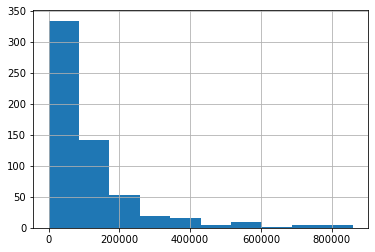

In [43]:
data['–†–∞—Å—Ö–æ–¥2'].hist()

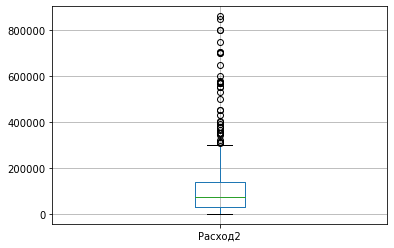

In [44]:
data.boxplot(column=['–†–∞—Å—Ö–æ–¥2'])

In [45]:
data[data['–†–∞—Å—Ö–æ–¥2']>750000]

–≥–æ–¥        –î–∞—Ç–∞   –ú–µ—Å—è—Ü  –ù–∞–∑–≤–∞–Ω–∏–µ      –§–æ—Ä–º–∞—Ç       –¢–µ–≥_(–∫—É—Ä—Å)  \
196  2020  25.08.2020  –∞–≤–≥—É—Å—Ç  The –õ—é–¥–∏  –ò–Ω—Ç–µ–≥—Ä–∞—Ü–∏—è             DSPR   
551  2021  09.04.2021  –∞–ø—Ä–µ–ª—å  The –õ—é–¥–∏  –ò–Ω—Ç–µ–≥—Ä–∞—Ü–∏—è              DST   
568  2021  20.04.2021  –∞–ø—Ä–µ–ª—å  –†–µ–¥–∞–∫—Ü–∏—è  –ò–Ω—Ç–µ–≥—Ä–∞—Ü–∏—è  –ª–∏–Ω–µ–π–∫–∞ –∫–æ–¥–∏–Ω–≥–∞   
586  2021  30.04.2021  –∞–ø—Ä–µ–ª—å  The –õ—é–¥–∏  –ò–Ω—Ç–µ–≥—Ä–∞—Ü–∏—è              FPW   

          –õ–∏–Ω–µ–π–∫–∞ –ü–æ–¥–ø–∏—Å—á–∏–∫–∏  –û—Ö–≤–∞—Ç_–§–∞–∫—Ç     –†–∞—Å—Ö–æ–¥    CPC    –°TR –í–∏–∑–∏—Ç—ã_–§–∞–∫—Ç  \
196  Data Science  2¬†230¬†000  10¬†000¬†000  —Ä.860¬†000  —Ä.146  0,06%        5905   
551  Data science  3¬†310¬†000   2¬†375¬†000  —Ä.800¬†000  —Ä.322  0,10%       2¬†488   
568        –ö–æ–¥–∏–Ω–≥  1¬†940¬†000     1001500  —Ä.850¬†000  —Ä.596  0,14%        1426   
586        –ö–æ–¥–∏–Ω–≥  3¬†310¬†000     3400000  —Ä.800¬†000  —Ä.330  0,07%       2¬†423   

    –°1_–§–∞–∫—Ç  –ó–∞—è–≤–∫–∏_–§–∞–∫—Ç –°2_–§–∞–∫—Ç –û–ø–ª–∞—Ç—ã_–§–∞–∫—Ç  –î–æ—Ö–æ–¥       CPL  ROMI  \
196   3,61%    213.00000    6,1%          13      8   —Ä.4¬†038   53%   
551   3,90%     97.00000    9,3%           9      7   —Ä.8¬†247   10%   
568   2,45%     35.00000   28,6%          10      7  —Ä.24¬†286  -34%   
586  22,37%    542.00000    1,1%           6      5   —Ä.1¬†476  -58%   

                                                link_x    link_true  \
196  https://www.youtube.com/watch?v=enRlWWHEoiU&t=...  enRlWWHEoiU   
551                https://youtu.be/lEAB2zeI5Co?t=1122  lEAB2zeI5Co   
568  https://www.youtube.com/watch?v=Znm9UlsFm5k&t=...  Znm9UlsFm5k   
586  https://www.youtube.com/watch?v=JJblj5OX9fA&t=...  JJblj5OX9fA   

                                          link_y channel_name  \
196  https://www.youtube.com/watch?v=enRlWWHEoiU     The –õ—é–¥–∏   
551  https://www.youtube.com/watch?v=lEAB2zeI5Co     The –õ—é–¥–∏   
568  https://www.youtube.com/watch?v=Znm9UlsFm5k     –†–µ–¥–∞–∫—Ü–∏—è   
586  https://www.youtube.com/watch?v=JJblj5OX9fA     The –õ—é–¥–∏   

     channel_subscribers                                         video_name  \
196        3480000.00000  –ú–µ–∫—Å–∏–∫–∞ / –ì–æ—Ä—è—á–∏–µ —Ç–æ—á–∫–∏ –ù–∞—Ä–∫–æ–≤–æ–π–Ω—ã –ú–∞—Ñ–∏–∏ / –ö–∞–∫...   
551        3480000.00000  –°–°–°–† - –°–®–ê / –°–µ–∫—Ä–µ—Ç–Ω–∞—è –≤–æ–µ–Ω–Ω–∞—è –ë–∞–∑–∞ –Ω–∞ –≥—Ä–∞–Ω–∏—Ü–µ...   
568        2150000.00000  –ß—Ç–æ –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç –≤ –ö—Ä—ã–º—É 7 –ª–µ—Ç —Å–ø—É—Å—Ç—è / –†–µ–¥–∞–∫—Ü–∏—è...   
586        3480000.00000  –°–∞–º—ã–π –ë—Ä–æ—à–µ–Ω–Ω—ã–π –≥–æ—Ä–æ–¥ / –í–æ—Ä–∫—É—Ç–∞ / –ö–∞–∫ –∂–∏–≤—É—Ç –≤ ...   

             video_date  video_year video_month day_of_week          views  \
196  2020-08-25 7:00:54  2020.00000      August     Tuesday 11308890.00000   
551  2021-04-09 7:00:20  2021.00000       April      Friday  2575994.00000   
568  2021-04-20 8:35:56  2021.00000       April     Tuesday  2120581.00000   
586  2021-04-30 8:20:09  2021.00000       April      Friday  3581039.00000   

    video_duration time_of_advertisement  part_of_video_with_ad_from1_to_10  \
196        1H22M5S                 22m05                            4.00000   
551         33M12S                 18m42                            7.00000   
568        1H4M11S                 05m05                            2.00000   
586         46M28S                 04m05                            2.00000   

    video_category    comments        likes    dislikes  \
196   –õ—é–¥–∏ –∏ –±–ª–æ–≥–∏ 25833.00000 336394.00000 10746.00000   
551   –õ—é–¥–∏ –∏ –±–ª–æ–≥–∏  8142.00000 109977.00000  5360.00000   
568   –õ—é–¥–∏ –∏ –±–ª–æ–≥–∏ 16833.00000  65775.00000  6144.00000   
586   –õ—é–¥–∏ –∏ –±–ª–æ–≥–∏ 32302.00000 180605.00000  5243.00000   

                                                  tags  \
196  ['–º–µ–∫—Å–∏–∫–∞', '–º–µ–∫—Å–∏–∫–∞–Ω–µ—Ü', '–Ω–∞—Ä–∫–æ–±–∞—Ä–æ–Ω—ã', '–∫–∞—Ä—Ç...   
551  ['the –ª—é–¥–∏', '–ª—é–¥–∏', '–∫–∞–∫ –∂–∏–≤—É—Ç –ª—é–¥–∏', '–∏–Ω—Ç–µ—Ä–≤...   
568  ['—Ä–µ–¥–∞–∫—Ü–∏—è', '–ø–∏

'CPC2'-–¶–µ–Ω–∞ –æ–¥–Ω–æ–≥–æ –≤–∏–∑–∏—Ç–∞ 

In [46]:
data['CPC2'] = data['CPC'].replace(r'\D+','',regex=True)
data['CPC2'] = data['CPC2'].astype(np.float64)

In [47]:
data['CPC2'].isna().sum()

9

In [48]:
data['CPC2'].describe()

count     578.00000
mean      408.43772
std      1011.47405
min         0.00000
25%       113.00000
50%       233.00000
75%       411.75000
max     16667.00000
Name: CPC2, dtype: float64

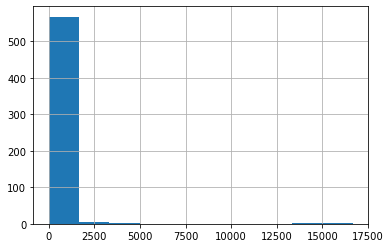

In [49]:
data['CPC2'].hist()

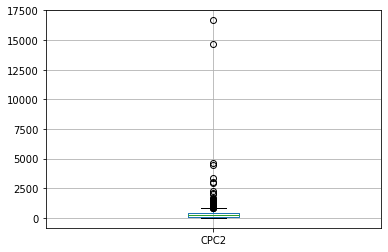

In [50]:
data.boxplot(column=['CPC2'])

In [51]:
data[data['CPC2']>12000]

–≥–æ–¥        –î–∞—Ç–∞    –ú–µ—Å—è—Ü               –ù–∞–∑–≤–∞–Ω–∏–µ      –§–æ—Ä–º–∞—Ç –¢–µ–≥_(–∫—É—Ä—Å)  \
462  2021  10.02.2021  —Ñ–µ–≤—Ä–∞–ª—å          –ê—Å–∞—Ñ—å–µ–≤ –ñ–∏–∑–Ω—å  –ò–Ω—Ç–µ–≥—Ä–∞—Ü–∏—è         GO   
543  2021  03.04.2021   –∞–ø—Ä–µ–ª—å  SeniorSoftwareVlogger  –ò–Ω—Ç–µ–≥—Ä–∞—Ü–∏—è        FPW   

    –õ–∏–Ω–µ–π–∫–∞ –ü–æ–¥–ø–∏—Å—á–∏–∫–∏ –û—Ö–≤–∞—Ç_–§–∞–∫—Ç     –†–∞—Å—Ö–æ–¥       CPC    –°TR –í–∏–∑–∏—Ç—ã_–§–∞–∫—Ç  \
462  –ö–æ–¥–∏–Ω–≥    223¬†000    233¬†796  —Ä.100¬†000  —Ä.16¬†667  0,00%           6   
543  –ö–æ–¥–∏–Ω–≥     86¬†000     17¬†859   —Ä.44¬†000  —Ä.14¬†667  0,02%           3   

     –°1_–§–∞–∫—Ç  –ó–∞—è–≤–∫–∏_–§–∞–∫—Ç –°2_–§–∞–∫—Ç –û–ø–ª–∞—Ç—ã_–§–∞–∫—Ç  –î–æ—Ö–æ–¥       CPL   ROMI  \
462  133,33%      8.00000   37,5%           3      4  —Ä.12¬†500   138%   
543   33,33%      1.00000    0,0%           0      0  —Ä.44¬†000  -100%   

                                          link_x    link_true  \
462                 https://youtu.be/hpcRDhEZNag  hpcRDhEZNag   
543  https://www.youtube.com/watch?v=jz0btfnwBZE  jz0btfnwBZE   

                                          link_y             channel_name  \
462  https://www.youtube.com/watch?v=hpcRDhEZNag           –ê—Å–∞—Ñ—å–µ–≤. –ñ–∏–∑–Ω—å   
543  https://www.youtube.com/watch?v=jz0btfnwBZE  Senior Software Vlogger   

     channel_subscribers                                         video_name  \
462         261000.00000  Faw —É–≥—Ä–æ–∂–∞–µ—Ç Volkswagen | –ü—Ä–æ–±–ª–µ–º—ã Skoda Octav...   
543          93100.00000        –¢—Ä–∏ –≤–∏–¥–∞ –ø—Ä–æ–≥—Ä–∞–º–º–∏—Å—Ç–æ–≤. –°–∫–∞–∑–∫–∞ –ø—Ä–æ —Å—Ç–∞—Ä—Ç–∞–ø—ã   

              video_date  video_year video_month day_of_week        views  \
462  2021-02-09 22:25:25  2021.00000    February     Tuesday 243916.00000   
543  2021-04-05 19:15:21  2021.00000       April      Monday  19306.00000   

    video_duration time_of_advertisement  part_of_video_with_ad_from1_to_10  \
462          38M3S                 08m22                            3.00000   
543          7M42S                 00m45                            2.00000   

    video_category   comments       likes  dislikes  \
462   –õ—é–¥–∏ –∏ –±–ª–æ–≥–∏ 1205.00000 14276.00000 535.00000   
543    –û–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ  148.00000  2485.00000 129.00000   

                                                  tags  \
462  ['–ê—Å–∞—Ñ—å–µ–≤', '–°—Ç–∞—Å', '–ê–≤—Ç–æ–ø—Ä–∞–≥–º–∞—Ç', '–ê–≤—Ç–æ–ø–æ–¥–±–æ—Ä...   
543                                                NaN   

                                           description promocode  \
462  –û—Å–≤–æ–π –ø—Ä–æ—Ñ–µ—Å—Å–∏—é ¬´–†–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫ –Ω–∞ Go¬ª –≤ SkillFac...   –ê—Å–∞—Ñ—å–µ–≤   
543  –ù–∞—É—á–∏—Å—å –ø–∏—Å–∞—Ç—å —Å–∞–π—Ç—ã –∏ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏—è –Ω–∞ Python –≤ ...    SENIOR   

    discount_percentage discount_until_date     ER  –ü–æ–¥–ø–∏—Å—á–∏–∫–∏2  –û—Ö–≤–∞—Ç_–§–∞–∫—Ç2  \
462                  50          17.02.2021  6,14% 223000.00000 233796.00000   
543                  45          15.04.2021  2,97%  86000.00000  17859.00000   

         –†–∞—Å—Ö–æ–¥2        CPC2  
462 100000.00000 16667.00000  
543  44000.00000 14667.00000

In [52]:
# –î–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –µ—Å—Ç—å –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ —Ä–µ—Å—É—Ä—Å—ã —Å –∫–æ—Ç–æ—Ä—ã—Ö –æ—á–µ–Ω—å –º–∞–ª–æ –ø–µ—Ä–µ—Ö–æ–¥–æ–≤

In [53]:
#data[data['–í–∏–∑–∏—Ç—ã_–§–∞–∫—Ç']<3]

In [54]:
#–ó–∞–º–µ–Ω–∏–º –ø—Ä–æ–ø—É—Å–∫–∏ –Ω–∞ –Ω–æ–ª—å
data['CPC2'].fillna(0,inplace=True)

'CTR2' -–ö–æ–Ω–≤–µ—Ä—Å–∏—è –ø—Ä–æ—Å–º–æ—Ç—Ä–æ–≤ –≤ –ø–µ—Ä–µ—Ö–æ–¥


In [55]:
data['CTR2'] = data['–°TR']
data['CTR2'] = data['CTR2'].replace(',','.',regex=True)
data['CTR2'] = data['CTR2'].replace('%','',regex=True)
data['CTR2'] = data['CTR2'].replace('#REF!',np.nan,regex=True)
data['CTR2'] = data['CTR2'].replace('#DIV/0!',np.nan,regex=True)
data['CTR2'] = data['CTR2'].astype(np.float64)
data['CTR2'] = data['CTR2']*0.01

In [56]:
data['CTR2'].isna().sum()

12

In [57]:
#–ó–∞–º–µ–Ω–∏–º –ø—Ä–æ–ø—É—Å–∫–∏ –Ω–∞ –Ω–æ–ª—å
data['CTR2'].fillna(0,inplace=True)

In [58]:
data['–í–∏–∑–∏—Ç—ã_–§–∞–∫—Ç2'] = data['–í–∏–∑–∏—Ç—ã_–§–∞–∫—Ç'].replace(r'\D+','',regex=True)
data['–í–∏–∑–∏—Ç—ã_–§–∞–∫—Ç2'] = data['–í–∏–∑–∏—Ç—ã_–§–∞–∫—Ç2'].astype(np.float64)

In [59]:
data['–í–∏–∑–∏—Ç—ã_–§–∞–∫—Ç2'].describe()

count    575.00000
mean     573.67826
std      768.90846
min        3.00000
25%      154.50000
50%      335.00000
75%      627.50000
max     7000.00000
Name: –í–∏–∑–∏—Ç—ã_–§–∞–∫—Ç2, dtype: float64

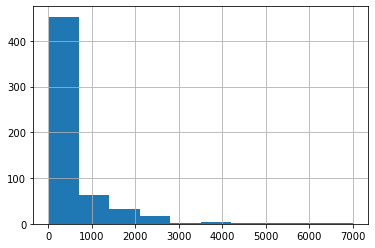

In [60]:
data['–í–∏–∑–∏—Ç—ã_–§–∞–∫—Ç2'].hist()

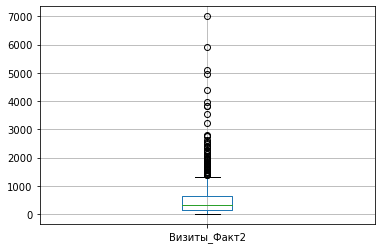

In [61]:
data.boxplot(column=['–í–∏–∑–∏—Ç—ã_–§–∞–∫—Ç2'])

In [62]:
data['–í–∏–∑–∏—Ç—ã_–§–∞–∫—Ç2'].fillna(0,inplace=True)

In [63]:
data['–í–∏–∑–∏—Ç—ã_–§–∞–∫—Ç2'].isna().sum()

0

In [64]:
# –î–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –µ—Å—Ç—å —Ä–µ—Å—É—Ä—Å—ã —Å –∫–æ—Ç–æ—Ä—ã—Ö –æ—á–µ–Ω—å –º–∞–ª–æ –≤–∏–∑–∏—Ç–æ–≤:
data['–ù–∞–∑–≤–∞–Ω–∏–µ'][data['–í–∏–∑–∏—Ç—ã_–§–∞–∫—Ç2']<6]
# –ù–∞ —ç—Ç–∏—Ö —Ä–µ—Å—É—Ä—Å–∞—Ö –ª—É—á—à–µ –±—ã –±–æ–ª—å—à–µ –Ω–µ —Ä–∞–∑–º–µ—â–∞—Ç—å

58                  CG Speak
499            –ö–∞—Å–µ –ì–∞—Å–∞–Ω–æ–≤ 
510      –ú–∞—Ä–∏—è –î—Ä–æ–±—É—à–µ–≤—Å–∫–∞—è 
514                    Geexy
520          –¢–µ—Ä—Ä–∏—Ç–æ—Ä–∏—è –î–æ–º–∞
522                     –¢–æ—Ä–∏
543    SeniorSoftwareVlogger
549        –î–∏–∑–∞–π–Ω –ò–Ω—Ç–µ—Ä—å–µ—Ä–æ–≤
550            –ê–ù—è –ö–æ–Ω—Å–µ—Ä–≤—ã 
553          –û–ª—å–≥–∞ –ö–∞—á–∞–Ω–æ–≤–∞ 
555        –ö—Å–µ–Ω–∏—è –í–æ—Å—Ç—Ä–∏–∫–æ–≤–∞
556          –ê–Ω–∞—Å—Ç–∞—Å–∏—è –ë—É–ª–ª–∞
558         Nellifornication
Name: –ù–∞–∑–≤–∞–Ω–∏–µ, dtype: object

In [65]:
# –†–µ—Å—É—Ä—Å—ã —Å —Å–∞–º—ã–º –±–æ–ª—å—à–∏–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –≤–∏–∑–∏—Ç—Ç–æ–≤
data[data['–í–∏–∑–∏—Ç—ã_–§–∞–∫—Ç2']>5000]

–≥–æ–¥        –î–∞—Ç–∞     –ú–µ—Å—è—Ü       –ù–∞–∑–≤–∞–Ω–∏–µ      –§–æ—Ä–º–∞—Ç     –¢–µ–≥_(–∫—É—Ä—Å)  \
196  2020  25.08.2020    –∞–≤–≥—É—Å—Ç       The –õ—é–¥–∏  –ò–Ω—Ç–µ–≥—Ä–∞—Ü–∏—è           DSPR   
248  2020  22.09.2020  —Å–µ–Ω—Ç—è–±—Ä—å         –£—Å–∞—á–µ–≤  –ò–Ω—Ç–µ–≥—Ä–∞—Ü–∏—è  MOTION  MEDIA   
358  2020  25.11.2020    –Ω–æ—è–±—Ä—å  –†—É—Å–ª–∞–Ω –£—Å–∞—á–µ–≤  –ò–Ω—Ç–µ–≥—Ä–∞—Ü–∏—è         MOTION   

          –õ–∏–Ω–µ–π–∫–∞ –ü–æ–¥–ø–∏—Å—á–∏–∫–∏  –û—Ö–≤–∞—Ç_–§–∞–∫—Ç     –†–∞—Å—Ö–æ–¥    CPC    –°TR –í–∏–∑–∏—Ç—ã_–§–∞–∫—Ç  \
196  Data Science  2¬†230¬†000  10¬†000¬†000  —Ä.860¬†000  —Ä.146  0,06%        5905   
248        –î–∏–∑–∞–π–Ω  2¬†390¬†000   1¬†290¬†000  —Ä.350¬†000   —Ä.50  0,54%        7000   
358        –î–∏–∑–∞–π–Ω  2¬†440¬†000   1¬†053¬†000  —Ä.550¬†000  —Ä.108  0,48%       5¬†100   

    –°1_–§–∞–∫—Ç  –ó–∞—è–≤–∫–∏_–§–∞–∫—Ç –°2_–§–∞–∫—Ç –û–ø–ª–∞—Ç—ã_–§–∞–∫—Ç  –î–æ—Ö–æ–¥      CPL  ROMI  \
196   3,61%    213.00000    6,1%          13      8  —Ä.4¬†038   53%   
248   1,79%    125.00000   32,0%          40      9  —Ä.2¬†800  801%   
358   1,53%     78.00000   34,6%          27      8  —Ä.7¬†051  233%   

                                                link_x    link_true  \
196  https://www.youtube.com/watch?v=enRlWWHEoiU&t=...  enRlWWHEoiU   
248        https://www.youtube.com/watch?v=AwqWnG2ZofY  AwqWnG2ZofY   
358                 https://youtu.be/03a8X2B1D_k?t=228  03a8X2B1D_k   

                                          link_y   channel_name  \
196  https://www.youtube.com/watch?v=enRlWWHEoiU       The –õ—é–¥–∏   
248  https://www.youtube.com/watch?v=AwqWnG2ZofY  –†—É—Å–ª–∞–Ω –£—Å–∞—á–µ–≤   
358  https://www.youtube.com/watch?v=03a8X2B1D_k  –†—É—Å–ª–∞–Ω –£—Å–∞—á–µ–≤   

     channel_subscribers                                         video_name  \
196        3480000.00000  –ú–µ–∫—Å–∏–∫–∞ / –ì–æ—Ä—è—á–∏–µ —Ç–æ—á–∫–∏ –ù–∞—Ä–∫–æ–≤–æ–π–Ω—ã –ú–∞—Ñ–∏–∏ / –ö–∞–∫...   
248        2540000.00000  –¢–∞–π–Ω–∞ –ª–µ–∫–∞—Ä—Å—Ç–≤–∞ –æ—Ç COVID-19 // –°–ë–ï–† ‚Äì –ù–ï –ë–ê–ù–ö/...   
358        2540000.00000  –õ–ï–î–Ø–ù–û–ô –®–¢–û–†–ú –Ω–∞ –í–æ—Å—Ç–æ–∫–µ –†–æ—Å—Å–∏–∏ //–¢–ê–ô–ù–ê–Ø –î–û–ß–¨ ...   

              video_date  video_year video_month day_of_week          views  \
196   2020-08-25 7:00:54  2020.00000      August     Tuesday 11308890.00000   
248  2020-09-22 18:41:16  2020.00000   September     Tuesday  1301604.00000   
358  2020-11-25 16:07:55  2020.00000    November   Wednesday  1104440.00000   

    video_duration time_of_advertisement  part_of_video_with_ad_from1_to_10  \
196        1H22M5S                 22m05                            4.00000   
248         21M52S                 05m10                            3.00000   
358         21M53S                 03m48                            3.00000   

         video_category    comments        likes    dislikes  \
196        –õ—é–¥–∏ –∏ –±–ª–æ–≥–∏ 25833.00000 336394.00000 10746.00000   
248  –ù–æ–≤–æ—Å—Ç–∏ –∏ –ø–æ–ª–∏—Ç–∏–∫–∞  2973.00000 127607.00000  1999.00000   
358  –ù–æ–≤–æ—Å—Ç–∏ –∏ –ø–æ–ª–∏—Ç–∏–∫–∞  3934.00000 116706.00000  1995.00000   

                                                  tags  \
196  ['–º–µ–∫—Å–∏–∫–∞', '–º–µ–∫—Å–∏–∫–∞–Ω–µ—Ü', '–Ω–∞—Ä–∫–æ–±–∞—Ä–æ–Ω—ã', '–∫–∞—Ä—Ç...   
248  ['–†—É—Å–ª–∞–Ω –£—Å–∞—á–µ–≤', 'usachevshow', '–†—É—Å–ª–∞–Ω', '–£—Å...   
358  ['–†—É—Å–ª–∞–Ω –£—Å–∞—á–µ–≤', 'usachevshow', '–†—É—Å–ª–∞–Ω', '–£—Å...   

                                           description promocode  \
196  –û—Ñ–æ—Ä–º–∏—Ç—å –∫—Ä–µ–¥–∏—Ç–Ω—É—é –∫–∞—Ä—Ç—É "100 –¥–Ω–µ–π –±–µ–∑ –ø—Ä–æ—Ü–µ–Ω—Ç...     –õ—è–¥–æ–≤   
248  üî•–ü—Ä–æ—Ñ–µ—Å—Å–∏—è –ú–æ—É—à–Ω –∏ –ú–µ–¥–∏–∞ - –¥–∏–∑–∞–π–Ω–µ—Ä \n–≤ –æ–Ω–ª–∞–π–Ω...   USACHEV   
358  üî• –ß–µ—Ä–Ω–∞—è –ø—è—Ç–Ω–∏—Ü–∞ –≤ Online-—à–∫–æ–ª–µ Contented: htt...   USACHEV   

    discount_percentage discount_until_date      ER   –ü–æ–¥–ø–∏—Å—á–∏–∫–∏2  \
196                  45          31.08.2020  10,72% 2230000.00000   
248                  45                 NaN   5,22% 2390000.00000   
358                  55          30.11

'–°1_–§–∞–∫—Ç' —ç—Ç–æ –Ω–∞ —Å–∞–º–æ–º –¥–µ–ª–µ –æ—Ç–Ω–æ—à–µ–Ω–∏–µ –ó–∞—è–≤–∫–∏_–§–∞–∫—Ç/–í–∏–∑–∏—Ç—ã_–§–∞–∫—Ç

In [66]:
data['–°1_–§–∞–∫—Ç2'] = data['–°1_–§–∞–∫—Ç'].replace(',','.',regex=True)
data['–°1_–§–∞–∫—Ç2'] = data['–°1_–§–∞–∫—Ç2'].replace('%','',regex=True)
#data['CTR2'] = data['CTR2'].replace('#REF!',np.nan,regex=True)
data['–°1_–§–∞–∫—Ç2'] = data['–°1_–§–∞–∫—Ç2'].replace('#DIV/0!',np.nan,regex=True)
data['–°1_–§–∞–∫—Ç2'] = data['–°1_–§–∞–∫—Ç2'].astype(np.float64)
data['–°1_–§–∞–∫—Ç2'] = data['–°1_–§–∞–∫—Ç2']*0.01

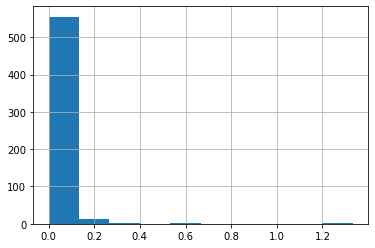

In [67]:
data['–°1_–§–∞–∫—Ç2'].hist()

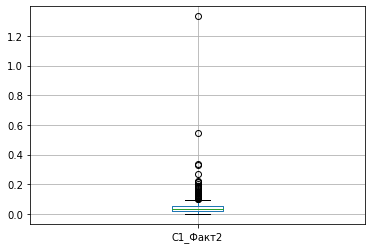

In [68]:
data.boxplot(column=['–°1_–§–∞–∫—Ç2'])

In [69]:
data[data['–°1_–§–∞–∫—Ç2']>1.2]

–≥–æ–¥        –î–∞—Ç–∞    –ú–µ—Å—è—Ü       –ù–∞–∑–≤–∞–Ω–∏–µ      –§–æ—Ä–º–∞—Ç –¢–µ–≥_(–∫—É—Ä—Å) –õ–∏–Ω–µ–π–∫–∞  \
462  2021  10.02.2021  —Ñ–µ–≤—Ä–∞–ª—å  –ê—Å–∞—Ñ—å–µ–≤ –ñ–∏–∑–Ω—å  –ò–Ω—Ç–µ–≥—Ä–∞—Ü–∏—è         GO  –ö–æ–¥–∏–Ω–≥   

    –ü–æ–¥–ø–∏—Å—á–∏–∫–∏ –û—Ö–≤–∞—Ç_–§–∞–∫—Ç     –†–∞—Å—Ö–æ–¥       CPC    –°TR –í–∏–∑–∏—Ç—ã_–§–∞–∫—Ç  –°1_–§–∞–∫—Ç  \
462    223¬†000    233¬†796  —Ä.100¬†000  —Ä.16¬†667  0,00%           6  133,33%   

     –ó–∞—è–≤–∫–∏_–§–∞–∫—Ç –°2_–§–∞–∫—Ç –û–ø–ª–∞—Ç—ã_–§–∞–∫—Ç  –î–æ—Ö–æ–¥       CPL  ROMI  \
462      8.00000   37,5%           3      4  —Ä.12¬†500  138%   

                           link_x    link_true  \
462  https://youtu.be/hpcRDhEZNag  hpcRDhEZNag   

                                          link_y    channel_name  \
462  https://www.youtube.com/watch?v=hpcRDhEZNag  –ê—Å–∞—Ñ—å–µ–≤. –ñ–∏–∑–Ω—å   

     channel_subscribers                                         video_name  \
462         261000.00000  Faw —É–≥—Ä–æ–∂–∞–µ—Ç Volkswagen | –ü—Ä–æ–±–ª–µ–º—ã Skoda Octav...   

              video_date  video_year video_month day_of_week        views  \
462  2021-02-09 22:25:25  2021.00000    February     Tuesday 243916.00000   

    video_duration time_of_advertisement  part_of_video_with_ad_from1_to_10  \
462          38M3S                 08m22                            3.00000   

    video_category   comments       likes  dislikes  \
462   –õ—é–¥–∏ –∏ –±–ª–æ–≥–∏ 1205.00000 14276.00000 535.00000   

                                                  tags  \
462  ['–ê—Å–∞—Ñ—å–µ–≤', '–°—Ç–∞—Å', '–ê–≤—Ç–æ–ø—Ä–∞–≥–º–∞—Ç', '–ê–≤—Ç–æ–ø–æ–¥–±–æ—Ä...   

                                           description promocode  \
462  –û—Å–≤–æ–π –ø—Ä–æ—Ñ–µ—Å—Å–∏—é ¬´–†–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫ –Ω–∞ Go¬ª –≤ SkillFac...   –ê—Å–∞—Ñ—å–µ–≤   

    discount_percentage discount_until_date     ER  –ü–æ–¥–ø–∏—Å—á–∏–∫–∏2  –û—Ö–≤–∞—Ç_–§–∞–∫—Ç2  \
462                  50          17.02.2021  6,14% 223000.00000 233796.00000   

         –†–∞—Å—Ö–æ–¥2        CPC2    CTR2  –í–∏–∑–∏—Ç—ã_–§–∞–∫—Ç2  –°1_–§–∞–∫—Ç2  
462 100000.00000 16667.00000 0.00000       6.00000   1.33330

–ù–µ–ø–æ–Ω—è—Ç–Ω–æ, –∫–∞–∫ –∑–∞—è–≤–æ–∫ –æ–∫–∞–∑–∞–ª–æ—Å—å –±–æ–ª—å—à–µ —á–µ–º –≤–∏–∑–∏—Ç–æ–≤ –∑–∞–º–µ–Ω–∏–º –∑–Ω–∞—á–µ–Ω–∏–µ –Ω–∞ 1, –∫–∞–∫ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ –≤–æ–∑–º–æ–∂–Ω—É—é


In [70]:
data['–°1_–§–∞–∫—Ç2'] = data['–°1_–§–∞–∫—Ç2'].replace(1.3333,1)

In [71]:
data['–°1_–§–∞–∫—Ç2'].isna().sum()

13

In [72]:
data['–°1_–§–∞–∫—Ç2'].fillna(0,inplace=True)

In [73]:
data['–ó–∞—è–≤–∫–∏_–§–∞–∫—Ç2'] = data['–ó–∞—è–≤–∫–∏_–§–∞–∫—Ç']

In [74]:
data['–ó–∞—è–≤–∫–∏_–§–∞–∫—Ç2'].describe()

count   569.00000
mean     26.16696
std      53.08651
min       0.00000
25%       5.00000
50%      11.00000
75%      26.00000
max     700.00000
Name: –ó–∞—è–≤–∫–∏_–§–∞–∫—Ç2, dtype: float64

In [75]:
data['–ó–∞—è–≤–∫–∏_–§–∞–∫—Ç2'].fillna(0
                            ,inplace=True)

'–°2_–§–∞–∫—Ç' - –ö–æ–Ω–≤–µ—Ä—Å–∏—è –∑–∞—è–≤–∫–∏ –≤ –ø—Ä–æ–¥–∞–∂—É  —ç—Ç–æ –æ—Ç–Ω–æ—à–µ–Ω–∏–µ  = –û–ø–ª–∞—Ç—ã_—Ñ–∞–∫—Ç/–ó–∞—è–≤–∫–∏_—Ñ–∞–∫—Ç

In [76]:
data['–°2_–§–∞–∫—Ç2'] = data['–°2_–§–∞–∫—Ç'].replace(',','.',regex=True)
data['–°2_–§–∞–∫—Ç2'] = data['–°2_–§–∞–∫—Ç2'].replace('%','',regex=True)
data['–°2_–§–∞–∫—Ç2'] = data['–°2_–§–∞–∫—Ç2'].replace('#VALUE!',np.nan,regex=True)
data['–°2_–§–∞–∫—Ç2'] = data['–°2_–§–∞–∫—Ç2'].replace('#DIV/0!',np.nan,regex=True)
data['–°2_–§–∞–∫—Ç2'] = data['–°2_–§–∞–∫—Ç2'].astype(np.float64)
data['–°2_–§–∞–∫—Ç2'] = data['–°2_–§–∞–∫—Ç2']*0.01

In [77]:
data['–°2_–§–∞–∫—Ç2'].describe()

count   541.00000
mean      0.13364
std       0.37271
min       0.00000
25%       0.00000
50%       0.07400
75%       0.18200
max       8.00000
Name: –°2_–§–∞–∫—Ç2, dtype: float64

In [78]:
data['–°2_–§–∞–∫—Ç2'].isna().sum()

46

In [79]:
data['–°2_–§–∞–∫—Ç2'].fillna(0,inplace=True)

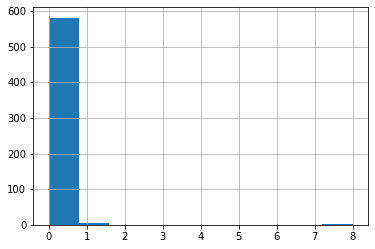

In [80]:
data['–°2_–§–∞–∫—Ç2'].hist()

In [81]:
data[data['–°2_–§–∞–∫—Ç2']>1]

–≥–æ–¥        –î–∞—Ç–∞ –ú–µ—Å—è—Ü     –ù–∞–∑–≤–∞–Ω–∏–µ      –§–æ—Ä–º–∞—Ç –¢–µ–≥_(–∫—É—Ä—Å)       –õ–∏–Ω–µ–π–∫–∞  \
47  2020  22.05.2020   –º–∞–π  PRO —Ä–æ–±–æ—Ç–æ–≤  –ò–Ω—Ç–µ–≥—Ä–∞—Ü–∏—è       DSPR  Data Science   

   –ü–æ–¥–ø–∏—Å—á–∏–∫–∏ –û—Ö–≤–∞—Ç_–§–∞–∫—Ç   –†–∞—Å—Ö–æ–¥    CPC    –°TR –í–∏–∑–∏—Ç—ã_–§–∞–∫—Ç –°1_–§–∞–∫—Ç  \
47     38¬†000      6¬†900  —Ä.7¬†500  —Ä.156  0,70%          48   2,08%   

    –ó–∞—è–≤–∫–∏_–§–∞–∫—Ç –°2_–§–∞–∫—Ç –û–ø–ª–∞—Ç—ã_–§–∞–∫—Ç  –î–æ—Ö–æ–¥      CPL   ROMI  \
47      1.00000  800,0%           8      0  —Ä.7¬†500  -100%   

                                               link_x    link_true  \
47  https://www.youtube.com/watch?v=b1xRVq7NDTY&fe...  b1xRVq7NDTY   

                                         link_y channel_name  \
47  https://www.youtube.com/watch?v=b1xRVq7NDTY  PRO —Ä–æ–±–æ—Ç–æ–≤   

    channel_subscribers                                         video_name  \
47         136000.00000  –¢–û–ü 5 –∏–∑–æ–±—Ä–µ—Ç–∞—Ç–µ–ª–µ–π 2020 –∏ –∏—Ö –Ω–µ–≤–µ—Ä–æ—è—Ç–Ω—ã–µ –∏–∑–æ–±...   

             video_date  video_year video_month day_of_week       views  \
47  2020-05-22 11:59:55  2020.00000         May      Friday 32504.00000   

   video_duration time_of_advertisement  part_of_video_with_ad_from1_to_10  \
47          7M50S                 03m05                            5.00000   

        video_category  comments      likes  dislikes  \
47  –ù–∞—É–∫–∞ –∏ —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏–∏ 101.00000 1457.00000  44.00000   

                                                 tags  \
47  ['–Ω–µ–≤–µ—Ä–æ—è—Ç–Ω—ã–µ –∏–∑–æ–±—Ä–µ—Ç–µ–Ω–∏—è', '–Ω–µ–≤–µ—Ä–æ—è—Ç–Ω—ã–µ –∏–∑–æ–±—Ä...   

                                          description    promocode  \
47  ¬´–ü—Ä–æ—Ñ–µ—Å—Å–∏—è Data Scientist¬ª –≤ SkillFactory: htt...  PRO —Ä–æ–±–æ—Ç–æ–≤   

   discount_percentage discount_until_date     ER  –ü–æ–¥–ø–∏—Å—á–∏–∫–∏2  –û—Ö–≤–∞—Ç_–§–∞–∫—Ç2  \
47                  35          30.05.2020  1,18%  38000.00000   6900.00000   

      –†–∞—Å—Ö–æ–¥2      CPC2    CTR2  –í–∏–∑–∏—Ç—ã_–§–∞–∫—Ç2  –°1_–§–∞–∫—Ç2  –ó–∞—è–≤–∫–∏_–§–∞–∫—Ç2  \
47 7500.00000 156.00000 0.00700      48.00000   0.02080       1.00000   

    –°2_–§–∞–∫—Ç2  
47   8.00000

In [82]:
data['–û–ø–ª–∞—Ç—ã_–§–∞–∫—Ç']

0       0
1       0
2       3
3       6
4       2
       ..
582     0
583     0
584    10
585     5
586     6
Name: –û–ø–ª–∞—Ç—ã_–§–∞–∫—Ç, Length: 587, dtype: object

In [83]:
data['–û–ø–ª–∞—Ç—ã_–§–∞–∫—Ç2'] = data['–û–ø–ª–∞—Ç—ã_–§–∞–∫—Ç'].replace('-',np.nan,regex=True)
data['–û–ø–ª–∞—Ç—ã_–§–∞–∫—Ç2'] = data['–û–ø–ª–∞—Ç—ã_–§–∞–∫—Ç2'].astype(np.float64)

In [84]:
data['–û–ø–ª–∞—Ç—ã_–§–∞–∫—Ç2'].isna().sum()

16

In [85]:
data['–û–ø–ª–∞—Ç—ã_–§–∞–∫—Ç2'].describe()

count   571.00000
mean      2.46935
std       4.03324
min       0.00000
25%       0.00000
50%       1.00000
75%       3.00000
max      40.00000
Name: –û–ø–ª–∞—Ç—ã_–§–∞–∫—Ç2, dtype: float64

In [86]:
data['–û–ø–ª–∞—Ç—ã_–§–∞–∫—Ç2'].fillna(0,inplace=True)

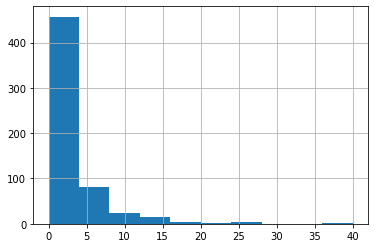

In [87]:
data['–û–ø–ª–∞—Ç—ã_–§–∞–∫—Ç2'].hist()

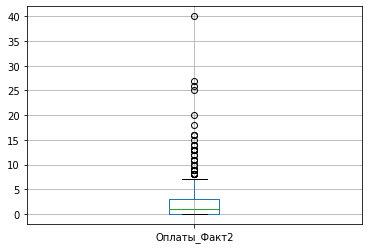

In [88]:
data.boxplot(column=['–û–ø–ª–∞—Ç—ã_–§–∞–∫—Ç2'])

In [89]:
data[data['–û–ø–ª–∞—Ç—ã_–§–∞–∫—Ç2']>30]

–≥–æ–¥        –î–∞—Ç–∞     –ú–µ—Å—è—Ü –ù–∞–∑–≤–∞–Ω–∏–µ      –§–æ—Ä–º–∞—Ç     –¢–µ–≥_(–∫—É—Ä—Å) –õ–∏–Ω–µ–π–∫–∞  \
248  2020  22.09.2020  —Å–µ–Ω—Ç—è–±—Ä—å   –£—Å–∞—á–µ–≤  –ò–Ω—Ç–µ–≥—Ä–∞—Ü–∏—è  MOTION  MEDIA  –î–∏–∑–∞–π–Ω   

    –ü–æ–¥–ø–∏—Å—á–∏–∫–∏ –û—Ö–≤–∞—Ç_–§–∞–∫—Ç     –†–∞—Å—Ö–æ–¥   CPC    –°TR –í–∏–∑–∏—Ç—ã_–§–∞–∫—Ç –°1_–§–∞–∫—Ç  \
248  2¬†390¬†000  1¬†290¬†000  —Ä.350¬†000  —Ä.50  0,54%        7000   1,79%   

     –ó–∞—è–≤–∫–∏_–§–∞–∫—Ç –°2_–§–∞–∫—Ç –û–ø–ª–∞—Ç—ã_–§–∞–∫—Ç  –î–æ—Ö–æ–¥      CPL  ROMI  \
248    125.00000   32,0%          40      9  —Ä.2¬†800  801%   

                                          link_x    link_true  \
248  https://www.youtube.com/watch?v=AwqWnG2ZofY  AwqWnG2ZofY   

                                          link_y   channel_name  \
248  https://www.youtube.com/watch?v=AwqWnG2ZofY  –†—É—Å–ª–∞–Ω –£—Å–∞—á–µ–≤   

     channel_subscribers                                         video_name  \
248        2540000.00000  –¢–∞–π–Ω–∞ –ª–µ–∫–∞—Ä—Å—Ç–≤–∞ –æ—Ç COVID-19 // –°–ë–ï–† ‚Äì –ù–ï –ë–ê–ù–ö/...   

              video_date  video_year video_month day_of_week         views  \
248  2020-09-22 18:41:16  2020.00000   September     Tuesday 1301604.00000   

    video_duration time_of_advertisement  part_of_video_with_ad_from1_to_10  \
248         21M52S                 05m10                            3.00000   

         video_category   comments        likes   dislikes  \
248  –ù–æ–≤–æ—Å—Ç–∏ –∏ –ø–æ–ª–∏—Ç–∏–∫–∞ 2973.00000 127607.00000 1999.00000   

                                                  tags  \
248  ['–†—É—Å–ª–∞–Ω –£—Å–∞—á–µ–≤', 'usachevshow', '–†—É—Å–ª–∞–Ω', '–£—Å...   

                                           description promocode  \
248  üî•–ü—Ä–æ—Ñ–µ—Å—Å–∏—è –ú–æ—É—à–Ω –∏ –ú–µ–¥–∏–∞ - –¥–∏–∑–∞–π–Ω–µ—Ä \n–≤ –æ–Ω–ª–∞–π–Ω...   USACHEV   

    discount_percentage discount_until_date     ER   –ü–æ–¥–ø–∏—Å—á–∏–∫–∏2  \
248                  45                 NaN  5,22% 2390000.00000   

      –û—Ö–≤–∞—Ç_–§–∞–∫—Ç2      –†–∞—Å—Ö–æ–¥2     CPC2    CTR2  –í–∏–∑–∏—Ç—ã_–§–∞–∫—Ç2  –°1_–§–∞–∫—Ç2  \
248 1290000.00000 350000.00000 50.00000 0.00540    7000.00000   0.01790   

     –ó–∞—è–≤–∫–∏_–§–∞–∫—Ç2  –°2_–§–∞–∫—Ç2  –û–ø–ª–∞—Ç—ã_–§–∞–∫—Ç2  
248     125.00000   0.32000      40.00000

–ù–µ –≤—ã–±—Ä–æ—Å—ã, —Ç–∞–∫ –∫–∞–∫ –æ—Å—Ç–∞–ª—å–Ω—ã–µ —Å—Ç–æ–ª–±—Ü—ã –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞—é—Ç –≤–µ—Ä–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è ROMI = 801%

In [90]:
data['–î–æ—Ö–æ–¥2'] = data['–î–æ—Ö–æ–¥']

In [91]:
data['–î–æ—Ö–æ–¥2'].describe()

count   587.00000
mean      2.14821
std       2.33028
min       0.00000
25%       0.00000
50%       2.00000
75%       3.00000
max       9.00000
Name: –î–æ—Ö–æ–¥2, dtype: float64

In [92]:
data['–î–æ—Ö–æ–¥2'].value_counts()

0    242
3     90
2     82
4     56
7     33
1     28
5     26
8     14
6     14
9      2
Name: –î–æ—Ö–æ–¥2, dtype: int64

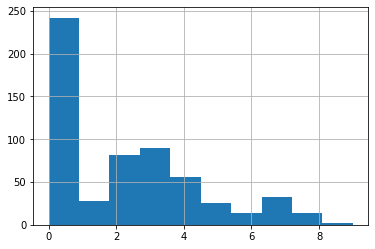

In [93]:
data['–î–æ—Ö–æ–¥2'].hist()

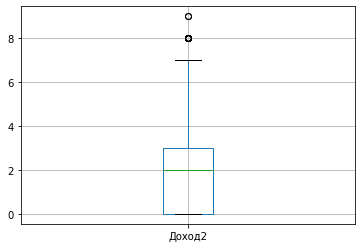

In [94]:
data.boxplot(column=['–î–æ—Ö–æ–¥2'])

In [95]:
data['CPL2'] = data['CPL'].replace(r'\D+','',regex=True)
data['CPL2'] = data['CPL2'].astype(np.float64)

In [96]:
data['CPL2'].isna().sum()

41

In [97]:
data['CPL2'].fillna(0,inplace=True)

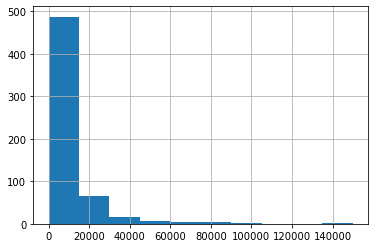

In [98]:
data['CPL2'].hist()

In [99]:
data['CPL2'].describe()

count      587.00000
mean      9329.38160
std      14452.44030
min          0.00000
25%       1452.50000
50%       5000.00000
75%      11526.50000
max     150000.00000
Name: CPL2, dtype: float64

–ù–∞—à–∞ —Ü–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è ROMI

In [100]:
data['ROMI2'] = data['ROMI'].replace('#DIV/0!',np.nan,regex=True)
data['ROMI2'] = data['ROMI2'].replace('%','',regex=True)
data['ROMI2'] = data['ROMI2'].astype(np.float64)
data['ROMI2'] = data['ROMI2']*0.01


In [101]:
data['ROMI2'].describe()

count    510.00000
mean      20.90220
std      442.72411
min       -1.00000
25%       -1.00000
50%        0.00500
75%        1.75500
max     9999.00000
Name: ROMI2, dtype: float64

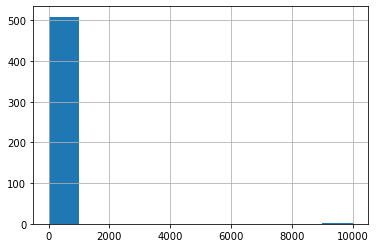

In [102]:
data['ROMI2'].hist()

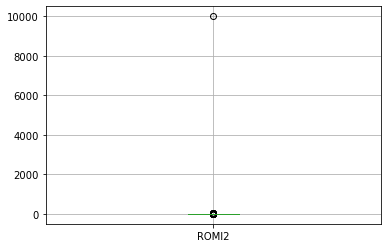

In [103]:
data.boxplot(column=['ROMI2'])

In [104]:
data[data['ROMI2']>8000]

–≥–æ–¥        –î–∞—Ç–∞    –ú–µ—Å—è—Ü  –ù–∞–∑–≤–∞–Ω–∏–µ      –§–æ—Ä–º–∞—Ç –¢–µ–≥_(–∫—É—Ä—Å) –õ–∏–Ω–µ–π–∫–∞  \
372  2020  01.12.2020  –¥–µ–∫–∞–±—Ä—å  –•–∞—É–¥–∏ –•–æ  –ò–Ω—Ç–µ–≥—Ä–∞—Ü–∏—è      ADMIN  –ö–æ–¥–∏–Ω–≥   

    –ü–æ–¥–ø–∏—Å—á–∏–∫–∏ –û—Ö–≤–∞—Ç_–§–∞–∫—Ç –†–∞—Å—Ö–æ–¥  CPC    –°TR –í–∏–∑–∏—Ç—ã_–§–∞–∫—Ç –°1_–§–∞–∫—Ç  –ó–∞—è–≤–∫–∏_–§–∞–∫—Ç  \
372  1¬†270¬†000     69¬†700    —Ä.6  —Ä.0  0,28%         197   7,11%     14.00000   

    –°2_–§–∞–∫—Ç –û–ø–ª–∞—Ç—ã_–§–∞–∫—Ç  –î–æ—Ö–æ–¥  CPL     ROMI  \
372    7,1%           1      2  —Ä.0  999900%   

                                          link_x    link_true  \
372  https://www.youtube.com/watch?v=lEAjwY5TAsE  lEAjwY5TAsE   

                                          link_y  \
372  https://www.youtube.com/watch?v=lEAjwY5TAsE   

                      channel_name  channel_subscribers  \
372  –•–∞—É–¥–∏ –•–æ‚Ñ¢ - –ü—Ä–æ—Å—Ç–æ –æ –º–∏—Ä–µ IT!        1560000.00000   

                                        video_name           video_date  \
372  ‚ö° –£–°–ö–û–†–Ø–ï–ú PYTHON –≤ 20 –†–ê–ó! | –ù–æ–≤—ã–π —Å–ø–æ—Å–æ–± :3  2020-12-01 17:52:30   

     video_year video_month day_of_week       views video_duration  \
372  2020.00000    December     Tuesday 93113.00000         10M36S   

    time_of_advertisement  part_of_video_with_ad_from1_to_10  \
372                 02m34                            3.00000   

         video_category   comments      likes  dislikes  \
372  –ù–∞—É–∫–∞ –∏ —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏–∏ 1282.00000 8241.00000 257.00000   

                                                  tags  \
372  ['python', '–ø–∞–π—Ç–æ–Ω', '—É—Ä–æ–∫–∏ –¥–ª—è –Ω–æ–≤–∏—á–∫–æ–≤', '—É—Å...   

                                           description promocode  \
372  –†–∞–±–æ—á–∏–π —Å–ø–æ—Å–æ–± –∫–∞–∫ —É—Å–∫–æ—Ä–∏—Ç—å –ª—é–±–æ–π Python –∫–æ–¥ –≤...  –•–∞—É–¥–∏ –•–æ   

    discount_percentage discount_until_date     ER   –ü–æ–¥–ø–∏—Å—á–∏–∫–∏2  –û—Ö–≤–∞—Ç_–§–∞–∫—Ç2  \
372                  50          10.12.2020  0,63% 1270000.00000  69700.00000   

     –†–∞—Å—Ö–æ–¥2    CPC2    CTR2  –í–∏–∑–∏—Ç—ã_–§–∞–∫—Ç2  –°1_–§–∞–∫—Ç2  –ó–∞—è–≤–∫–∏_–§–∞–∫—Ç2  –°2_–§–∞–∫—Ç2  \
372  6.00000 0.00000 0.00280     197.00000   0.07110      14.00000   0.07100   

     –û–ø–ª–∞—Ç—ã_–§–∞–∫—Ç2  –î–æ—Ö–æ–¥2    CPL2      ROMI2  
372       1.00000       2 0.00000 9999.00000

In [105]:
#372 —è–≤–Ω—ã–π –≤—ã–±—Ä–æ—Å –∏ –æ—à–∏–±–∫–∞ –∑–∞–ø–æ–ª–Ω–µ–Ω–∏—è –Ω–µ –∑–Ω–∞—é —á–µ–º –∑–∞–º–µ–Ω–∏—Ç—å, –Ω–∞–≤–µ—Ä–Ω–æ–µ —Å—Ç–æ–∏—Ç —É–¥–∞–ª–∏—Ç—å —ç—Ç—É —Å—Ç—Ä–æ–∫—É
data = data.drop(372)

In [106]:
data['ROMI2'].isna().sum()

77

–ó–∞–ø–æ–º–Ω–∏–º , —á—Ç–æ —É –Ω–∞—Å –µ—Å—Ç—å –ø—É—Å—Ç—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π, –Ω–æ –Ω–µ –±—É–¥–µ–º –∏—Ö –∑–∞–ø–æ–ª–Ω—è—Ç—å, –ø–æ–∑–∂–µ —É–¥–∞–ª–∏–º.

In [107]:
data.head()

–≥–æ–¥        –î–∞—Ç–∞   –ú–µ—Å—è—Ü     –ù–∞–∑–≤–∞–Ω–∏–µ      –§–æ—Ä–º–∞—Ç –¢–µ–≥_(–∫—É—Ä—Å)       –õ–∏–Ω–µ–π–∫–∞  \
0  2019  15.01.2020  —è–Ω–≤–∞—Ä—å     Flatingo  –ò–Ω—Ç–µ–≥—Ä–∞—Ü–∏—è         GD        –ö–æ–¥–∏–Ω–≥   
1  2020  15.01.2020  —è–Ω–≤–∞—Ä—å    Johe News  –ò–Ω—Ç–µ–≥—Ä–∞—Ü–∏—è        PWS        –ö–æ–¥–∏–Ω–≥   
2  2020  15.01.2020  —è–Ω–≤–∞—Ä—å  PRO —Ä–æ–±–æ—Ç–æ–≤  –ò–Ω—Ç–µ–≥—Ä–∞—Ü–∏—è        DST  Data Science   
3  2020  15.01.2020  —è–Ω–≤–∞—Ä—å     –•–∞—É–¥–∏ –•–æ  –ò–Ω—Ç–µ–≥—Ä–∞—Ü–∏—è        PWS        –ö–æ–¥–∏–Ω–≥   
4  2020  15.01.2020  —è–Ω–≤–∞—Ä—å      Foo52ru  –ò–Ω—Ç–µ–≥—Ä–∞—Ü–∏—è        DST  Data Science   

  –ü–æ–¥–ø–∏—Å—á–∏–∫–∏ –û—Ö–≤–∞—Ç_–§–∞–∫—Ç    –†–∞—Å—Ö–æ–¥   CPC    –°TR –í–∏–∑–∏—Ç—ã_–§–∞–∫—Ç –°1_–§–∞–∫—Ç  \
0     52 027     42¬†225   —Ä.4¬†500  —Ä.15  0,72%         304   11,2%   
1      9¬†000      6¬†389   —Ä.5¬†000  —Ä.40  1,94%         124    4,0%   
2     38¬†000      6¬†900   —Ä.7¬†500  —Ä.46  2,38%         164    7,9%   
3    842¬†000     50¬†000  —Ä.25¬†000  —Ä.15  3,39%        1697    6,5%   
4     35¬†000     22¬†000  —Ä.25¬†000  —Ä.60  1,90%         418    4,3%   

   –ó–∞—è–≤–∫–∏_–§–∞–∫—Ç –°2_–§–∞–∫—Ç –û–ø–ª–∞—Ç—ã_–§–∞–∫—Ç  –î–æ—Ö–æ–¥      CPL   ROMI  \
0     34.00000    0,0%           0      0    —Ä.132  -100%   
1      5.00000    0,0%           0      0  —Ä.1¬†000  -100%   
2     13.00000   23,1%           3      4    —Ä.577  3380%   
3    111.00000    5,4%           6      4    —Ä.225  1044%   
4     18.00000   11,1%           2      3  —Ä.1¬†389   620%   

                                              link_x    link_true  \
0        https://www.youtube.com/watch?v=aqSjawK_QwA  aqSjawK_QwA   
1  https://www.youtube.com/watch?v=o7h1-6U1u1g&t=...  o7h1-6U1u1g   
2  https://www.youtube.com/watch?v=mk8OsCBZ-yw&fe...  mk8OsCBZ-yw   
3                       https://youtu.be/M8fhrtvedHA  M8fhrtvedHA   
4        https://www.youtube.com/watch?v=J9ZgrTAFw60  J9ZgrTAFw60   

                                        link_y                   channel_name  \
0  https://www.youtube.com/watch?v=aqSjawK_QwA      Flatingo. –†–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫ –∏–≥—Ä   
1  https://www.youtube.com/watch?v=o7h1-6U1u1g                      Johe News   
2  https://www.youtube.com/watch?v=mk8OsCBZ-yw                    PRO —Ä–æ–±–æ—Ç–æ–≤   
3  https://www.youtube.com/watch?v=M8fhrtvedHA  –•–∞—É–¥–∏ –•–æ‚Ñ¢ - –ü—Ä–æ—Å—Ç–æ –æ –º–∏—Ä–µ IT!   
4  https://www.youtube.com/watch?v=J9ZgrTAFw60             foo52ru –¢–µ—Ö–Ω–æ–®–∞–º–∞–Ω   

   channel_subscribers                                         video_name  \
0         270000.00000  –ö–∞–∫ —Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫–∏ –¥–µ–ª—è—Ç –∏–≥—Ä—ã / –°–æ–∑–¥–∞–Ω–∏–µ –∏–≥—Ä –∏ –∏...   
1          14600.00000                        Raspberry Pi –ª—É—á—à–∏–µ –ø—Ä–æ–µ–∫—Ç—ã   
2         136000.00000  20+ –°–∞–º—ã—Ö –ù–µ–≤–µ—Ä–æ—è—Ç–Ω—ã—Ö –ò–∑–æ–±—Ä–µ—Ç–µ–Ω–∏–π, –ö–æ—Ç–æ—Ä—ã–µ –ò–∑–º...   
3        1560000.00000                      –ü–∏—à–µ–º TELEGRAM –±–æ—Ç–∞ –Ω–∞ Python   
4          62100.00000  –ù–µ–π—Ä–æ–Ω–Ω–∞—è —Å–µ—Ç—å. –ß–∞—Å—Ç—å 6. –ü—Ä–∏–∫—Ä—É—á–∏–≤–∞—é –Ω–µ–π—Ä–æ—Å–µ—Ç—å...   

            video_date  video_year video_month day_of_week        views  \
0   2019-01-14 4:23:02  2019.00000     January      Monday 107619.00000   
1  2020-01-17 11:58:16  2020.00000     January      Friday  62889.00000   
2  2020-01-23 13:33:38  2020.00000     January    Thursday 112566.00000   
3  2020-01-24 18:33:25  2020.00000     January      Friday 560514.00000   
4   2020-01-24 4:44:31  2020.00000     January      Friday  59620.00000   

  video_duration time_of_advertisement  part_of_video_with_ad_from1_to_10  \
0          3M46S                 00m02                            1.00000   
1         31M41S                 02m42                            2.00000   
2         10M14S                 04m13                            5.00000   
3         12M58S                 06m52                            6.00000   
4          9M23S                 00m43                            2.00000   

       vi

In [108]:
data['channel_subscribers'].describe()

count       568.00000
mean     809101.60387
std     1034419.79553
min          15.00000
25%      228500.00000
50%      528000.00000
75%     1000000.00000
max     9860000.00000
Name: channel_subscribers, dtype: float64

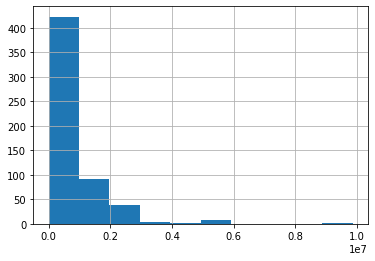

In [109]:
data['channel_subscribers'].hist()

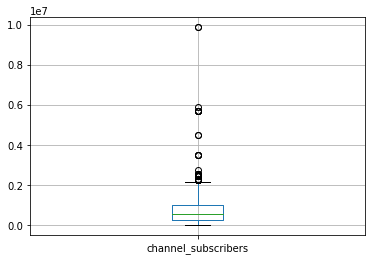

In [110]:
data.boxplot(column=['channel_subscribers'])

In [111]:
data[data['channel_subscribers']>8000000]

–≥–æ–¥        –î–∞—Ç–∞   –ú–µ—Å—è—Ü   –ù–∞–∑–≤–∞–Ω–∏–µ      –§–æ—Ä–º–∞—Ç –¢–µ–≥_(–∫—É—Ä—Å)       –õ–∏–Ω–µ–π–∫–∞  \
117  2020  03.07.2020    –∏—é–ª—å  wylsa.com  –ò–Ω—Ç–µ–≥—Ä–∞—Ü–∏—è        PWS        –ö–æ–¥–∏–Ω–≥   
178  2020  15.08.2020  –∞–≤–≥—É—Å—Ç      Wylsa  –ò–Ω—Ç–µ–≥—Ä–∞—Ü–∏—è       DSPR  Data Science   

    –ü–æ–¥–ø–∏—Å—á–∏–∫–∏ –û—Ö–≤–∞—Ç_–§–∞–∫—Ç     –†–∞—Å—Ö–æ–¥    CPC    –°TR –í–∏–∑–∏—Ç—ã_–§–∞–∫—Ç –°1_–§–∞–∫—Ç  \
117  9¬†300¬†000    268¬†000  —Ä.250¬†000  —Ä.207  0,45%        1206   3,65%   
178  1¬†410¬†000    452¬†778  —Ä.250¬†000  —Ä.427  0,13%         585   4,44%   

     –ó–∞—è–≤–∫–∏_–§–∞–∫—Ç –°2_–§–∞–∫—Ç –û–ø–ª–∞—Ç—ã_–§–∞–∫—Ç  –î–æ—Ö–æ–¥      CPL ROMI  \
117     44.00000    6,8%           3      4  —Ä.5¬†682  -8%   
178     26.00000    0,0%           0      0  —Ä.9¬†615  NaN   

                                                link_x    link_true  \
117  https://www.youtube.com/watch?v=l2pcUBxugcY&fe...  l2pcUBxugcY   
178  https://www.youtube.com/watch?v=q8ojg-NqACE&t=60s  q8ojg-NqACE   

                                          link_y channel_name  \
117  https://www.youtube.com/watch?v=l2pcUBxugcY     Wylsacom   
178  https://www.youtube.com/watch?v=q8ojg-NqACE     Wylsacom   

     channel_subscribers                                         video_name  \
117        9860000.00000            iPhone —Å –ê–≤–∏—Ç–æ - –∫–∞–∫ –∫—É–ø–∏—Ç—å –±–µ–∑ –æ–±–º–∞–Ω–∞?   
178        9860000.00000  Apple iBook G3 - –ø–µ—Ä–≤—ã–π –≤ –º–∏—Ä–µ –Ω–æ—É—Ç–±—É–∫ —Å –±–µ—Å–ø—Ä...   

              video_date  video_year video_month day_of_week        views  \
117  2020-07-25 16:36:55  2020.00000        July    Saturday 309745.00000   
178  2020-08-14 18:12:44  2020.00000      August      Friday 484904.00000   

    video_duration time_of_advertisement  part_of_video_with_ad_from1_to_10  \
117         12M55S                 01m54                            2.00000   
178         13M19S                 01m00                            2.00000   

         video_category    comments       likes   dislikes  \
117  –ù–∞—É–∫–∞ –∏ —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏–∏ 15398.00000 23993.00000 2619.00000   
178  –ù–∞—É–∫–∞ –∏ —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏–∏  1298.00000 23191.00000 3367.00000   

                                                  tags  \
117  ['iPhone', 'Apple', 'wylsa', 'Wylsacom', '–∞–≤–∏—Ç...   
178  ['iPhone', 'Apple', 'wylsa', 'Wylsacom', 'iboo...   

                                           description promocode  \
117  –ö—É—Ä—Å ¬´Python –¥–ª—è –≤–µ–±-—Ä–∞–∑—Ä–∞–±–æ—Ç–∫–∏¬ª –≤ SkillFactor...     WYLSA   
178  –ü—Ä–æ—Ñ–µ—Å—Å–∏—è Data Scientist –≤ –°–∫–∏–ª—Ñ—ç–∫—Ç–æ—Ä–∏\n50% —Å–∫...     Wylsa   

    discount_percentage discount_until_date     ER   –ü–æ–¥–ø–∏—Å—á–∏–∫–∏2  –û—Ö–≤–∞—Ç_–§–∞–∫—Ç2  \
117                  50          10.08.2020  0,43% 9300000.00000 268000.00000   
178                  50          01.09.2020  0,28% 1410000.00000 452778.00000   

         –†–∞—Å—Ö–æ–¥2      CPC2    CTR2  –í–∏–∑–∏—Ç—ã_–§–∞–∫—Ç2  –°1_–§–∞–∫—Ç2  –ó–∞—è–≤–∫–∏_–§–∞–∫—Ç2  \
117 250000.00000 207.00000 0.00450    1206.00000   0.03650      44.00000   
178 250000.00000 427.00000 0.00130     585.00000   0.04440      26.00000   

     –°2_–§–∞–∫—Ç2  –û–ø–ª–∞—Ç—ã_–§–∞–∫—Ç2  –î–æ—Ö–æ–¥2       CPL2    ROMI2  
117   0.06800       3.00000       4 5682.00000 -0.08000  
178   0.00000       0.00000       0 9615.00000      nan

–î–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –µ—Å–ª–∏ –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –Ω–∞ —é—Ç—É–±–µ 9.8 –º–ª–Ω –ø–æ–¥–ø–∏—Å—á–∏–∫–æ–≤

In [112]:
data['channel_subscribers'].isna().sum()

18

In [113]:
data['channel_subscribers'].fillna(0,inplace=True)

In [114]:
data['views'].describe()

count        569.00000
mean      351946.39367
std       674757.83277
min            6.00000
25%        80968.00000
50%       196729.00000
75%       375979.00000
max     11308890.00000
Name: views, dtype: float64

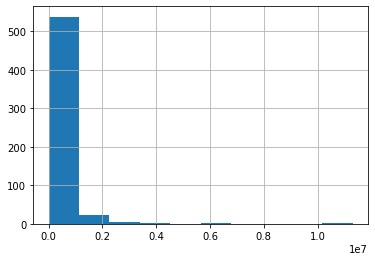

In [115]:
data['views'].hist()

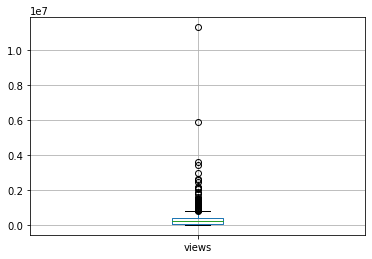

In [116]:
data.boxplot(column=['views'])

In [117]:
data[data['views']>10000000]

–≥–æ–¥        –î–∞—Ç–∞   –ú–µ—Å—è—Ü  –ù–∞–∑–≤–∞–Ω–∏–µ      –§–æ—Ä–º–∞—Ç –¢–µ–≥_(–∫—É—Ä—Å)       –õ–∏–Ω–µ–π–∫–∞  \
196  2020  25.08.2020  –∞–≤–≥—É—Å—Ç  The –õ—é–¥–∏  –ò–Ω—Ç–µ–≥—Ä–∞—Ü–∏—è       DSPR  Data Science   

    –ü–æ–¥–ø–∏—Å—á–∏–∫–∏  –û—Ö–≤–∞—Ç_–§–∞–∫—Ç     –†–∞—Å—Ö–æ–¥    CPC    –°TR –í–∏–∑–∏—Ç—ã_–§–∞–∫—Ç –°1_–§–∞–∫—Ç  \
196  2¬†230¬†000  10¬†000¬†000  —Ä.860¬†000  —Ä.146  0,06%        5905   3,61%   

     –ó–∞—è–≤–∫–∏_–§–∞–∫—Ç –°2_–§–∞–∫—Ç –û–ø–ª–∞—Ç—ã_–§–∞–∫—Ç  –î–æ—Ö–æ–¥      CPL ROMI  \
196    213.00000    6,1%          13      8  —Ä.4¬†038  53%   

                                                link_x    link_true  \
196  https://www.youtube.com/watch?v=enRlWWHEoiU&t=...  enRlWWHEoiU   

                                          link_y channel_name  \
196  https://www.youtube.com/watch?v=enRlWWHEoiU     The –õ—é–¥–∏   

     channel_subscribers                                         video_name  \
196        3480000.00000  –ú–µ–∫—Å–∏–∫–∞ / –ì–æ—Ä—è—á–∏–µ —Ç–æ—á–∫–∏ –ù–∞—Ä–∫–æ–≤–æ–π–Ω—ã –ú–∞—Ñ–∏–∏ / –ö–∞–∫...   

             video_date  video_year video_month day_of_week          views  \
196  2020-08-25 7:00:54  2020.00000      August     Tuesday 11308890.00000   

    video_duration time_of_advertisement  part_of_video_with_ad_from1_to_10  \
196        1H22M5S                 22m05                            4.00000   

    video_category    comments        likes    dislikes  \
196   –õ—é–¥–∏ –∏ –±–ª–æ–≥–∏ 25833.00000 336394.00000 10746.00000   

                                                  tags  \
196  ['–º–µ–∫—Å–∏–∫–∞', '–º–µ–∫—Å–∏–∫–∞–Ω–µ—Ü', '–Ω–∞—Ä–∫–æ–±–∞—Ä–æ–Ω—ã', '–∫–∞—Ä—Ç...   

                                           description promocode  \
196  –û—Ñ–æ—Ä–º–∏—Ç—å –∫—Ä–µ–¥–∏—Ç–Ω—É—é –∫–∞—Ä—Ç—É "100 –¥–Ω–µ–π –±–µ–∑ –ø—Ä–æ—Ü–µ–Ω—Ç...     –õ—è–¥–æ–≤   

    discount_percentage discount_until_date      ER   –ü–æ–¥–ø–∏—Å—á–∏–∫–∏2  \
196                  45          31.08.2020  10,72% 2230000.00000   

      –û—Ö–≤–∞—Ç_–§–∞–∫—Ç2      –†–∞—Å—Ö–æ–¥2      CPC2    CTR2  –í–∏–∑–∏—Ç—ã_–§–∞–∫—Ç2  –°1_–§–∞–∫—Ç2  \
196 1000000.00000 860000.00000 146.00000 0.00060    5905.00000   0.03610   

     –ó–∞—è–≤–∫–∏_–§–∞–∫—Ç2  –°2_–§–∞–∫—Ç2  –û–ø–ª–∞—Ç—ã_–§–∞–∫—Ç2  –î–æ—Ö–æ–¥2       CPL2   ROMI2  
196     213.00000   0.06100      13.00000       8 4038.00000 0.53000

In [118]:
# –î–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –Ω–∞ –∫–∞–Ω–∞–ª–µ –±–æ–ª–µ–µ 11 –º–ª–Ω –ø—Ä–æ—Å–º–æ—Ç—Ä–æ–≤

In [119]:
data['views'].isna().sum()

17

In [120]:
data['views'].fillna(0,inplace=True)

In [121]:
#'video_duration' - –Ω–µ —Ö–≤–∞—Ç–∏–ª–æ –≤—Ä–µ–º–µ–Ω–∏ –æ–±—Ä–∞–±–æ—Ç–∞—Ç—å

In [122]:
data['time_of_advertisement3'] = data['time_of_advertisement'].str.split('m').str[0]
data['time_of_advertisement4'] = data['time_of_advertisement'].str.split('m').str[1]
data[["time_of_advertisement3", "time_of_advertisement4"]] = data[["time_of_advertisement3", "time_of_advertisement4"]].apply(pd.to_numeric)
data['time_of_advertisement5'] = data['time_of_advertisement3']*60+data['time_of_advertisement4']

In [123]:
data['time_of_advertisement5'].describe()

count    568.00000
mean     278.88556
std      348.40377
min        1.00000
25%       70.75000
50%      186.50000
75%      347.75000
max     2683.00000
Name: time_of_advertisement5, dtype: float64

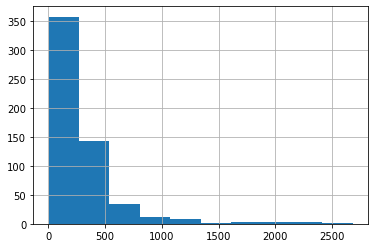

In [124]:
data['time_of_advertisement5'].hist()

In [125]:
data[data['time_of_advertisement5']==2683]

–≥–æ–¥        –î–∞—Ç–∞   –ú–µ—Å—è—Ü            –ù–∞–∑–≤–∞–Ω–∏–µ      –§–æ—Ä–º–∞—Ç –¢–µ–≥_(–∫—É—Ä—Å)  \
585  2021  29.04.2021  –∞–ø—Ä–µ–ª—å  –ï–∫–∞—Ç–µ—Ä–∏–Ω–∞ —à—É–ª—å–º–∞–Ω   –ò–Ω—Ç–µ–≥—Ä–∞—Ü–∏—è        DST   

          –õ–∏–Ω–µ–π–∫–∞ –ü–æ–¥–ø–∏—Å—á–∏–∫–∏ –û—Ö–≤–∞—Ç_–§–∞–∫—Ç     –†–∞—Å—Ö–æ–¥    CPC    –°TR –í–∏–∑–∏—Ç—ã_–§–∞–∫—Ç  \
585  Data science     455000     210000  —Ä.140¬†000  —Ä.411  0,16%         341   

    –°1_–§–∞–∫—Ç  –ó–∞—è–≤–∫–∏_–§–∞–∫—Ç –°2_–§–∞–∫—Ç –û–ø–ª–∞—Ç—ã_–§–∞–∫—Ç  –î–æ—Ö–æ–¥      CPL  ROMI  \
585   4,69%     16.00000   31,3%           5      5  —Ä.8¬†750  176%   

                                  link_x    link_true  \
585  https://youtu.be/xfn5jg0_8Q0?t=2521  xfn5jg0_8Q0   

                                          link_y       channel_name  \
585  https://www.youtube.com/watch?v=xfn5jg0_8Q0  –ï–∫–∞—Ç–µ—Ä–∏–Ω–∞ –®—É–ª—å–º–∞–Ω   

     channel_subscribers                                         video_name  \
585         459000.00000  –¢—ã –±—ã–ª –Ω–µ —Ü–∞—Ä—å, –∞ –ª–∏—Ü–µ–¥–µ–π. (–ü—Ä–µ–º—å–µ—Ä–∞ —Ñ–∏–ª—å–º–∞). ...   

             video_date  video_year video_month day_of_week        views  \
585  2021-04-29 8:51:05  2021.00000       April    Thursday 238759.00000   

    video_duration time_of_advertisement  part_of_video_with_ad_from1_to_10  \
585         53M33S                 44m43                            9.00000   

    video_category   comments       likes  dislikes  \
585    –û–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ 1821.00000 19222.00000 356.00000   

                                                  tags  \
585  ['–ù–∏–∫–æ–ª–∞–π I', '–†–æ—Å—Å–∏—è', '–∏—Å—Ç–æ—Ä–∏—è –†–æ—Å—Å–∏–∏', '–¥–µ–∫...   

                                           description promocode  \
585  –ü–æ–∫—É–ø–∞–π—Ç–µ –∫–≤–∞—Ä—Ç–∏—Ä—ã –Ω–∞ Avito:\n\nhttps://clc.to...   –®–£–õ–¨–ú–ê–ù   

    discount_percentage discount_until_date     ER  –ü–æ–¥–ø–∏—Å—á–∏–∫–∏2  –û—Ö–≤–∞—Ç_–§–∞–∫—Ç2  \
585                  55                 NaN  4,66% 455000.00000 210000.00000   

         –†–∞—Å—Ö–æ–¥2      CPC2    CTR2  –í–∏–∑–∏—Ç—ã_–§–∞–∫—Ç2  –°1_–§–∞–∫—Ç2  –ó–∞—è–≤–∫–∏_–§–∞–∫—Ç2  \
585 140000.00000 411.00000 0.00160     341.00000   0.04690      16.00000   

     –°2_–§–∞–∫—Ç2  –û–ø–ª–∞—Ç—ã_–§–∞–∫—Ç2  –î–æ—Ö–æ–¥2       CPL2   ROMI2  \
585   0.31300       5.00000       5 8750.00000 1.76000   

     time_of_advertisement3  time_of_advertisement4  time_of_advertisement5  
585                44.00000                43.00000              2683.00000

In [126]:
data['time_of_advertisement5'].isna().sum()

18

In [127]:
data['time_of_advertisement5'].fillna(0,inplace=True)

In [128]:
data['comments'].describe()

count     569.00000
mean     1912.79965
std      3507.18633
min         0.00000
25%       456.00000
50%      1020.00000
75%      1871.00000
max     32302.00000
Name: comments, dtype: float64

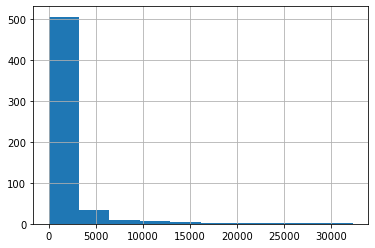

In [129]:
data['comments'].hist()

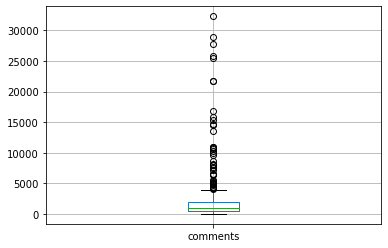

In [130]:
data.boxplot(column=['comments'])

In [131]:
data[data['comments']>30000]

–≥–æ–¥        –î–∞—Ç–∞   –ú–µ—Å—è—Ü  –ù–∞–∑–≤–∞–Ω–∏–µ      –§–æ—Ä–º–∞—Ç –¢–µ–≥_(–∫—É—Ä—Å) –õ–∏–Ω–µ–π–∫–∞  \
586  2021  30.04.2021  –∞–ø—Ä–µ–ª—å  The –õ—é–¥–∏  –ò–Ω—Ç–µ–≥—Ä–∞—Ü–∏—è        FPW  –ö–æ–¥–∏–Ω–≥   

    –ü–æ–¥–ø–∏—Å—á–∏–∫–∏ –û—Ö–≤–∞—Ç_–§–∞–∫—Ç     –†–∞—Å—Ö–æ–¥    CPC    –°TR –í–∏–∑–∏—Ç—ã_–§–∞–∫—Ç –°1_–§–∞–∫—Ç  \
586  3¬†310¬†000    3400000  —Ä.800¬†000  —Ä.330  0,07%       2¬†423  22,37%   

     –ó–∞—è–≤–∫–∏_–§–∞–∫—Ç –°2_–§–∞–∫—Ç –û–ø–ª–∞—Ç—ã_–§–∞–∫—Ç  –î–æ—Ö–æ–¥      CPL  ROMI  \
586    542.00000    1,1%           6      5  —Ä.1¬†476  -58%   

                                                link_x    link_true  \
586  https://www.youtube.com/watch?v=JJblj5OX9fA&t=...  JJblj5OX9fA   

                                          link_y channel_name  \
586  https://www.youtube.com/watch?v=JJblj5OX9fA     The –õ—é–¥–∏   

     channel_subscribers                                         video_name  \
586        3480000.00000  –°–∞–º—ã–π –ë—Ä–æ—à–µ–Ω–Ω—ã–π –≥–æ—Ä–æ–¥ / –í–æ—Ä–∫—É—Ç–∞ / –ö–∞–∫ –∂–∏–≤—É—Ç –≤ ...   

             video_date  video_year video_month day_of_week         views  \
586  2021-04-30 8:20:09  2021.00000       April      Friday 3581039.00000   

    video_duration time_of_advertisement  part_of_video_with_ad_from1_to_10  \
586         46M28S                 04m05                            2.00000   

    video_category    comments        likes   dislikes  \
586   –õ—é–¥–∏ –∏ –±–ª–æ–≥–∏ 32302.00000 180605.00000 5243.00000   

                                                  tags  \
586  ['the –ª—é–¥–∏', '–ª—é–¥–∏', '–∫–∞–∫ –∂–∏–≤—É—Ç –ª—é–¥–∏', '–∏–Ω—Ç–µ—Ä–≤...   

                                           description promocode  \
586  ‚ÄéÔ∏è‚Äçüî• –ü–æ–ª—É—á–∏ 90 —Ç—ã—Å –Ω–∞ –æ–±—É—á–µ–Ω–∏–µ –ø—Ä–æ—Ñ–µ—Å—Å–∏–∏ Fulls...       NaN   

    discount_percentage discount_until_date     ER   –ü–æ–¥–ø–∏—Å—á–∏–∫–∏2  \
586                 NaN                 NaN  6,27% 3310000.00000   

      –û—Ö–≤–∞—Ç_–§–∞–∫—Ç2      –†–∞—Å—Ö–æ–¥2      CPC2    CTR2  –í–∏–∑–∏—Ç—ã_–§–∞–∫—Ç2  –°1_–§–∞–∫—Ç2  \
586 3400000.00000 800000.00000 330.00000 0.00070    2423.00000   0.22370   

     –ó–∞—è–≤–∫–∏_–§–∞–∫—Ç2  –°2_–§–∞–∫—Ç2  –û–ø–ª–∞—Ç—ã_–§–∞–∫—Ç2  –î–æ—Ö–æ–¥2       CPL2    ROMI2  \
586     542.00000   0.01100       6.00000       5 1476.00000 -0.58000   

     time_of_advertisement3  time_of_advertisement4  time_of_advertisement5  
586                 4.00000                 5.00000               245.00000

In [132]:
# –î–∞ –ø—Ä–æ–≤–µ—Ä–∫–∞ –ø–æ–∫–∞–∑–∞–ª–∞, —á—Ç–æ –µ—Å—Ç—å —Ç–∞–∫–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤ —É –≤–∏–¥–µ–æ

In [133]:
data['comments'].isna().sum()

17

In [134]:
data['comments'].fillna(0,inplace=True)

In [135]:
#'channel_subscribers','video_year','views','video_duration','time_of_advertisement',
#           'part_of_video_with_ad_from1_to_10','comments','likes','dislikes',
 #          'discount_percentage','ER']

In [136]:
data['likes'].describe()

count      569.00000
mean     21511.30931
std      29396.00933
min          0.00000
25%       5774.00000
50%      13972.00000
75%      25295.00000
max     336394.00000
Name: likes, dtype: float64

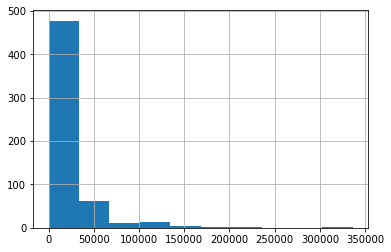

In [137]:
data['likes'].hist()

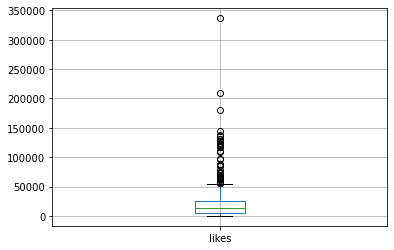

In [138]:
data.boxplot(column=['likes'])

In [139]:
data[data['likes']>300000]

–≥–æ–¥        –î–∞—Ç–∞   –ú–µ—Å—è—Ü  –ù–∞–∑–≤–∞–Ω–∏–µ      –§–æ—Ä–º–∞—Ç –¢–µ–≥_(–∫—É—Ä—Å)       –õ–∏–Ω–µ–π–∫–∞  \
196  2020  25.08.2020  –∞–≤–≥—É—Å—Ç  The –õ—é–¥–∏  –ò–Ω—Ç–µ–≥—Ä–∞—Ü–∏—è       DSPR  Data Science   

    –ü–æ–¥–ø–∏—Å—á–∏–∫–∏  –û—Ö–≤–∞—Ç_–§–∞–∫—Ç     –†–∞—Å—Ö–æ–¥    CPC    –°TR –í–∏–∑–∏—Ç—ã_–§–∞–∫—Ç –°1_–§–∞–∫—Ç  \
196  2¬†230¬†000  10¬†000¬†000  —Ä.860¬†000  —Ä.146  0,06%        5905   3,61%   

     –ó–∞—è–≤–∫–∏_–§–∞–∫—Ç –°2_–§–∞–∫—Ç –û–ø–ª–∞—Ç—ã_–§–∞–∫—Ç  –î–æ—Ö–æ–¥      CPL ROMI  \
196    213.00000    6,1%          13      8  —Ä.4¬†038  53%   

                                                link_x    link_true  \
196  https://www.youtube.com/watch?v=enRlWWHEoiU&t=...  enRlWWHEoiU   

                                          link_y channel_name  \
196  https://www.youtube.com/watch?v=enRlWWHEoiU     The –õ—é–¥–∏   

     channel_subscribers                                         video_name  \
196        3480000.00000  –ú–µ–∫—Å–∏–∫–∞ / –ì–æ—Ä—è—á–∏–µ —Ç–æ—á–∫–∏ –ù–∞—Ä–∫–æ–≤–æ–π–Ω—ã –ú–∞—Ñ–∏–∏ / –ö–∞–∫...   

             video_date  video_year video_month day_of_week          views  \
196  2020-08-25 7:00:54  2020.00000      August     Tuesday 11308890.00000   

    video_duration time_of_advertisement  part_of_video_with_ad_from1_to_10  \
196        1H22M5S                 22m05                            4.00000   

    video_category    comments        likes    dislikes  \
196   –õ—é–¥–∏ –∏ –±–ª–æ–≥–∏ 25833.00000 336394.00000 10746.00000   

                                                  tags  \
196  ['–º–µ–∫—Å–∏–∫–∞', '–º–µ–∫—Å–∏–∫–∞–Ω–µ—Ü', '–Ω–∞—Ä–∫–æ–±–∞—Ä–æ–Ω—ã', '–∫–∞—Ä—Ç...   

                                           description promocode  \
196  –û—Ñ–æ—Ä–º–∏—Ç—å –∫—Ä–µ–¥–∏—Ç–Ω—É—é –∫–∞—Ä—Ç—É "100 –¥–Ω–µ–π –±–µ–∑ –ø—Ä–æ—Ü–µ–Ω—Ç...     –õ—è–¥–æ–≤   

    discount_percentage discount_until_date      ER   –ü–æ–¥–ø–∏—Å—á–∏–∫–∏2  \
196                  45          31.08.2020  10,72% 2230000.00000   

      –û—Ö–≤–∞—Ç_–§–∞–∫—Ç2      –†–∞—Å—Ö–æ–¥2      CPC2    CTR2  –í–∏–∑–∏—Ç—ã_–§–∞–∫—Ç2  –°1_–§–∞–∫—Ç2  \
196 1000000.00000 860000.00000 146.00000 0.00060    5905.00000   0.03610   

     –ó–∞—è–≤–∫–∏_–§–∞–∫—Ç2  –°2_–§–∞–∫—Ç2  –û–ø–ª–∞—Ç—ã_–§–∞–∫—Ç2  –î–æ—Ö–æ–¥2       CPL2   ROMI2  \
196     213.00000   0.06100      13.00000       8 4038.00000 0.53000   

     time_of_advertisement3  time_of_advertisement4  time_of_advertisement5  
196                22.00000                 5.00000              1325.00000

In [140]:
# 196 –î–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –Ω–∞ —é—Ç—É–±–µ —Å–µ–≥–æ–¥–Ω—è –æ–∫–æ–ª–æ 335 —Ç—ã—Å –ª–∞–π–∫–æ–≤ —ç—Ç–æ–≥–æ –≤–∏–¥–µ–æ

In [141]:
data['likes'].isna().sum()

17

In [142]:
data['likes'].fillna(0,inplace=True)

In [143]:
data['dislikes'].describe()

count     569.00000
mean      737.75044
std      1349.30168
min         0.00000
25%       142.00000
50%       354.00000
75%       678.00000
max     12632.00000
Name: dislikes, dtype: float64

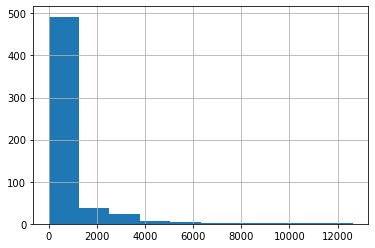

In [144]:
data['dislikes'].hist()

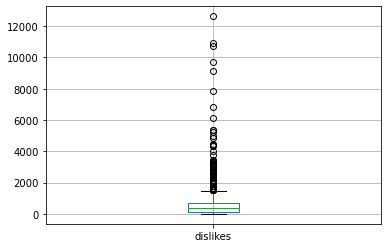

In [145]:
data.boxplot(column=['dislikes'])

In [146]:
data[data['dislikes']>12000]

–≥–æ–¥        –î–∞—Ç–∞    –ú–µ—Å—è—Ü      –ù–∞–∑–≤–∞–Ω–∏–µ      –§–æ—Ä–º–∞—Ç –¢–µ–≥_(–∫—É—Ä—Å)  \
302  2020  22.10.2020  –æ–∫—Ç—è–±—Ä—å  –ê –ø–æ–≥–æ–≤–æ—Ä–∏—Ç—å  –ò–Ω—Ç–µ–≥—Ä–∞—Ü–∏—è       DSPR   

          –õ–∏–Ω–µ–π–∫–∞ –ü–æ–¥–ø–∏—Å—á–∏–∫–∏ –û—Ö–≤–∞—Ç_–§–∞–∫—Ç     –†–∞—Å—Ö–æ–¥    CPC    –°TR –í–∏–∑–∏—Ç—ã_–§–∞–∫—Ç  \
302  Data Science  1¬†370¬†000  2¬†500¬†000  —Ä.700¬†000  —Ä.176  0,16%        3981   

    –°1_–§–∞–∫—Ç  –ó–∞—è–≤–∫–∏_–§–∞–∫—Ç –°2_–§–∞–∫—Ç –û–ø–ª–∞—Ç—ã_–§–∞–∫—Ç  –î–æ—Ö–æ–¥      CPL  ROMI  \
302   4,22%    168.00000    7,7%          13      8  —Ä.4¬†167  103%   

                                                link_x    link_true  \
302  https://www.youtube.com/watch?v=xYMvz4uVLlc&fe...  xYMvz4uVLlc   

                                          link_y   channel_name  \
302  https://www.youtube.com/watch?v=xYMvz4uVLlc  –ê –ø–æ–≥–æ–≤–æ—Ä–∏—Ç—å?   

     channel_subscribers                                         video_name  \
302        1730000.00000  –°–≤–µ—Ç–ª–∞–Ω–∞ –¢–∏—Ö–∞–Ω–æ–≤—Å–∫–∞—è: —Ä–∞–∑–≥–æ–≤–æ—Ä –≤ –¶–ò–ö–µ, –∂–∏–∑–Ω—å –≤...   

             video_date  video_year video_month day_of_week         views  \
302  2020-10-22 8:04:05  2020.00000     October    Thursday 2631003.00000   

    video_duration time_of_advertisement  part_of_video_with_ad_from1_to_10  \
302       1H24M17S                 09m17                            2.00000   

    video_category    comments        likes    dislikes  \
302   –õ—é–¥–∏ –∏ –±–ª–æ–≥–∏ 27735.00000 131384.00000 12632.00000   

                                                  tags  \
302  ['–∞ –ø–æ–≥–æ–≤–æ—Ä–∏—Ç—å', '—ç–∫—Å–∫–ª—é–∑–∏–≤', '–∏–Ω—Ç–µ—Ä–≤—å—é', '—à–∏—Ö...   

                                           description     promocode  \
302  –ü—Ä–æ—Ñ–µ—Å—Å–∏—è Data Scientist –≤ SkillFactory: https...  –ê –ø–æ–≥–æ–≤–æ—Ä–∏—Ç—å   

    discount_percentage discount_until_date     ER   –ü–æ–¥–ø–∏—Å—á–∏–∫–∏2  \
302                  45          30.11.2020  9,93% 1370000.00000   

      –û—Ö–≤–∞—Ç_–§–∞–∫—Ç2      –†–∞—Å—Ö–æ–¥2      CPC2    CTR2  –í–∏–∑–∏—Ç—ã_–§–∞–∫—Ç2  –°1_–§–∞–∫—Ç2  \
302 2500000.00000 700000.00000 176.00000 0.00160    3981.00000   0.04220   

     –ó–∞—è–≤–∫–∏_–§–∞–∫—Ç2  –°2_–§–∞–∫—Ç2  –û–ø–ª–∞—Ç—ã_–§–∞–∫—Ç2  –î–æ—Ö–æ–¥2       CPL2   ROMI2  \
302     168.00000   0.07700      13.00000       8 4167.00000 1.03000   

     time_of_advertisement3  time_of_advertisement4  time_of_advertisement5  
302                 9.00000                17.00000               557.00000

In [147]:
# 302 –î–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –Ω–∞ —é—Ç—É–±–µ —Å–µ–≥–æ–¥–Ω—è –æ–∫–æ–ª–æ 13 —Ç—ã—Å –¥–∏–∑–ª–∞–π–∫–æ–≤ —ç—Ç–æ–≥–æ –≤–∏–¥–µ–æ

In [148]:
data['dislikes'].isna().sum()

17

In [149]:
data['dislikes'].fillna(0,inplace=True)

In [150]:
# –ó–∞–º–µ—Ç–∏–º, —á—Ç–æ –≤ —Å—Ç–æ–ª–±—Ü–µ –µ—Å—Ç—å –æ–¥–Ω–æ –≤—ã–±–∏–≤–∞—é—â–µ–µ—Å—è –∑–Ω–∞—á–µ–Ω–∏–µ 5000rub, –∑–∞–º–µ–Ω–∏–º –µ–≥–æ –Ω–∞ 5% (–ø–æ—Ö–æ–∂–µ –Ω–∞ —Ç–æ)
data['discount_percentage'].value_counts()

45          216
50          162
55           84
35           23
60            8
40            8
10            5
25            5
15            3
20            2
5000 rub      2
Name: discount_percentage, dtype: int64

In [151]:
data['discount_percentage']  = data['discount_percentage'].replace('5000 rub','5',regex=True)

In [152]:
data['discount_percentage'] = data['discount_percentage'].astype(np.float64)

In [153]:
data['discount_percentage'].describe()

count   518.00000
mean     46.94015
std       7.62709
min       5.00000
25%      45.00000
50%      45.00000
75%      50.00000
max      60.00000
Name: discount_percentage, dtype: float64

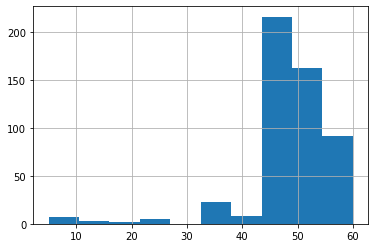

In [154]:
data['discount_percentage'].hist()

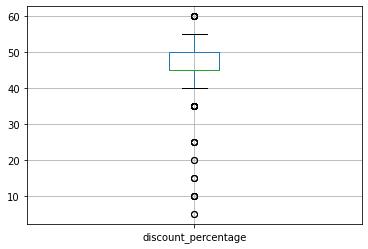

In [155]:
data.boxplot(column=['discount_percentage'])

In [156]:
data['discount_percentage'].isna().sum()

68

In [157]:
data['discount_percentage'].fillna(0,inplace=True)

In [158]:
data['ER'].value_counts()

0,94%     7
0,92%     5
1,17%     5
0,64%     4
1,04%     4
         ..
15,37%    1
5,17%     1
5,28%     1
6,02%     1
0,46%     1
Name: ER, Length: 408, dtype: int64

In [159]:
# –ü—Ä–∏–≤–µ–¥–µ–º —Å—Ç–æ–ª–±–µ—Ü ER –∫ —á–∏—Å–ª–æ–≤–æ–º—É –≤–∏–¥—É:
data['ER'] = data['ER'].replace(',','.',regex=True)
data['ER'] = data['ER'].replace('%','',regex=True)
data['ER'] = data['ER'].replace('#DIV/0!','0',regex=True)
data['ER'] = data['ER'].astype(np.float64)
data['ER'] = data['ER']*0.01

In [160]:
data['ER'].describe()

count   569.00000
mean      0.04372
std       0.04895
min       0.00000
25%       0.01450
50%       0.02920
75%       0.05580
max       0.61500
Name: ER, dtype: float64

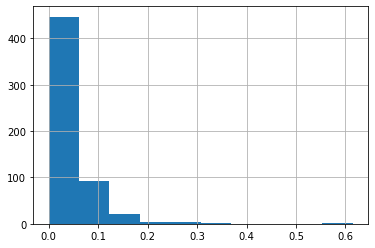

In [161]:
data['ER'].hist()

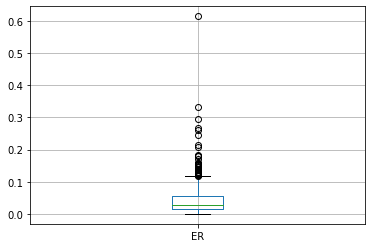

In [162]:
data.boxplot(column=['ER'])

In [163]:
data[data['ER']>0.6]

–≥–æ–¥        –î–∞—Ç–∞   –ú–µ—Å—è—Ü      –ù–∞–∑–≤–∞–Ω–∏–µ      –§–æ—Ä–º–∞—Ç –¢–µ–≥_(–∫—É—Ä—Å) –õ–∏–Ω–µ–π–∫–∞  \
573  2021  22.04.2021  –∞–ø—Ä–µ–ª—å  –ü–æ—Å–ª–µ_Zavtra  –ò–Ω—Ç–µ–≥—Ä–∞—Ü–∏—è     HACKER  –ö–æ–¥–∏–Ω–≥   

    –ü–æ–¥–ø–∏—Å—á–∏–∫–∏ –û—Ö–≤–∞—Ç_–§–∞–∫—Ç     –†–∞—Å—Ö–æ–¥    CPC    –°TR –í–∏–∑–∏—Ç—ã_–§–∞–∫—Ç –°1_–§–∞–∫—Ç  \
573      21000     217013  —Ä.150¬†000  —Ä.586  0,12%         256   5,08%   

     –ó–∞—è–≤–∫–∏_–§–∞–∫—Ç –°2_–§–∞–∫—Ç –û–ø–ª–∞—Ç—ã_–§–∞–∫—Ç  –î–æ—Ö–æ–¥       CPL  ROMI  \
573     13.00000    7,7%           1      2  —Ä.11¬†538  -51%   

                                                link_x    link_true  \
573  https://www.youtube.com/watch?v=KAGwqu4yLWI#t=...  KAGwqu4yLWI   

                                          link_y  channel_name  \
573  https://www.youtube.com/watch?v=KAGwqu4yLWI  –ü–æ—Å–ª–µ_Z–∞–≤—Ç—Ä–∞   

     channel_subscribers                                         video_name  \
573          21800.00000  –ï–¥–∞ –±—É–¥—É—â–µ–≥–æ. –ò–Ω—Ç–µ—Ä–µ—Å–Ω—ã–µ —Ñ–∞–∫—Ç—ã –ø—Ä–æ —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏–∏ ...   

              video_date  video_year video_month day_of_week        views  \
573  2021-04-22 13:02:59  2021.00000       April    Thursday 245415.00000   

    video_duration time_of_advertisement  part_of_video_with_ad_from1_to_10  \
573          17M1S                 00m50                            1.00000   

    video_category   comments       likes  dislikes  \
573    –†–∞–∑–≤–ª–µ—á–µ–Ω–∏—è 1099.00000 11784.00000 525.00000   

                                                  tags  \
573  ['greenwise', 'ifarm', 'twins garden', '–±—É–¥—É—â–µ...   

                                           description promocode  \
573  –ù–∞—É—á–∏—Å—å —ç—Ç–∏—á–Ω–æ–º—É —Ö–∞–∫–∏–Ω–≥—É –≤ SkillFactory: https...    ZAVTRA   

     discount_percentage discount_until_date      ER  –ü–æ–¥–ø–∏—Å—á–∏–∫–∏2  \
573             45.00000          30.04.2021 0.61500  21000.00000   

     –û—Ö–≤–∞—Ç_–§–∞–∫—Ç2      –†–∞—Å—Ö–æ–¥2      CPC2    CTR2  –í–∏–∑–∏—Ç—ã_–§–∞–∫—Ç2  –°1_–§–∞–∫—Ç2  \
573 217013.00000 150000.00000 586.00000 0.00120     256.00000   0.05080   

     –ó–∞—è–≤–∫–∏_–§–∞–∫—Ç2  –°2_–§–∞–∫—Ç2  –û–ø–ª–∞—Ç—ã_–§–∞–∫—Ç2  –î–æ—Ö–æ–¥2        CPL2    ROMI2  \
573      13.00000   0.07700       1.00000       2 11538.00000 -0.51000   

     time_of_advertisement3  time_of_advertisement4  time_of_advertisement5  
573                 0.00000                50.00000                50.00000

In [164]:
data['ER'].isna().sum()

17

In [165]:
data['ER'].fillna(0,inplace=True)

In [166]:
data['discount_percentage'].fillna(0,inplace=True)

In [167]:
num_cols = ['–ü–æ–¥–ø–∏—Å—á–∏–∫–∏2','–û—Ö–≤–∞—Ç_–§–∞–∫—Ç2','–†–∞—Å—Ö–æ–¥2','CPC2','CTR2','–í–∏–∑–∏—Ç—ã_–§–∞–∫—Ç2','–°1_–§–∞–∫—Ç2',
'–ó–∞—è–≤–∫–∏_–§–∞–∫—Ç2','–°2_–§–∞–∫—Ç2','–û–ø–ª–∞—Ç—ã_–§–∞–∫—Ç2','–î–æ—Ö–æ–¥2','CPL2','ROMI2','channel_subscribers',
'views','time_of_advertisement5','comments','likes','dislikes','discount_percentage',
'ER']

In [168]:
data[num_cols].head()

–ü–æ–¥–ø–∏—Å—á–∏–∫–∏2  –û—Ö–≤–∞—Ç_–§–∞–∫—Ç2     –†–∞—Å—Ö–æ–¥2     CPC2    CTR2  –í–∏–∑–∏—Ç—ã_–§–∞–∫—Ç2  \
0  52027.00000  42225.00000  4500.00000 15.00000 0.00720     304.00000   
1   9000.00000   6389.00000  5000.00000 40.00000 0.01940     124.00000   
2  38000.00000   6900.00000  7500.00000 46.00000 0.02380     164.00000   
3 842000.00000  50000.00000 25000.00000 15.00000 0.03390    1697.00000   
4  35000.00000  22000.00000 25000.00000 60.00000 0.01900     418.00000   

   –°1_–§–∞–∫—Ç2  –ó–∞—è–≤–∫–∏_–§–∞–∫—Ç2  –°2_–§–∞–∫—Ç2  –û–ø–ª–∞—Ç—ã_–§–∞–∫—Ç2  –î–æ—Ö–æ–¥2       CPL2    ROMI2  \
0   0.11200      34.00000   0.00000       0.00000       0  132.00000 -1.00000   
1   0.04000       5.00000   0.00000       0.00000       0 1000.00000 -1.00000   
2   0.07900      13.00000   0.23100       3.00000       4  577.00000 33.80000   
3   0.06500     111.00000   0.05400       6.00000       4  225.00000 10.44000   
4   0.04300      18.00000   0.11100       2.00000       3 1389.00000  6.20000   

   channel_subscribers        views  time_of_advertisement5   comments  \
0         270000.00000 107619.00000                 2.00000  405.00000   
1          14600.00000  62889.00000               162.00000  366.00000   
2         136000.00000 112566.00000               253.00000  493.00000   
3        1560000.00000 560514.00000               412.00000 2404.00000   
4          62100.00000  59620.00000                43.00000  264.00000   

        likes  dislikes  discount_percentage      ER  
0  3548.00000 320.00000              0.00000 0.01580  
1  1955.00000 700.00000              0.00000 0.20690  
2  2866.00000 210.00000             25.00000 0.02620  
3 22013.00000 668.00000             40.00000 0.01610  
4  4422.00000  68.00000             25.00000 0.07660

In [169]:
data[num_cols].isna().sum()

–ü–æ–¥–ø–∏—Å—á–∏–∫–∏2                0
–û—Ö–≤–∞—Ç_–§–∞–∫—Ç2                0
–†–∞—Å—Ö–æ–¥2                    0
CPC2                       0
CTR2                       0
–í–∏–∑–∏—Ç—ã_–§–∞–∫—Ç2               0
–°1_–§–∞–∫—Ç2                   0
–ó–∞—è–≤–∫–∏_–§–∞–∫—Ç2               0
–°2_–§–∞–∫—Ç2                   0
–û–ø–ª–∞—Ç—ã_–§–∞–∫—Ç2               0
–î–æ—Ö–æ–¥2                     0
CPL2                       0
ROMI2                     77
channel_subscribers        0
views                      0
time_of_advertisement5     0
comments                   0
likes                      0
dislikes                   0
discount_percentage        0
ER                         0
dtype: int64

In [170]:
data = data.dropna(axis='index', how='any', subset=['ROMI2'])

In [171]:
len(num_cols)

21

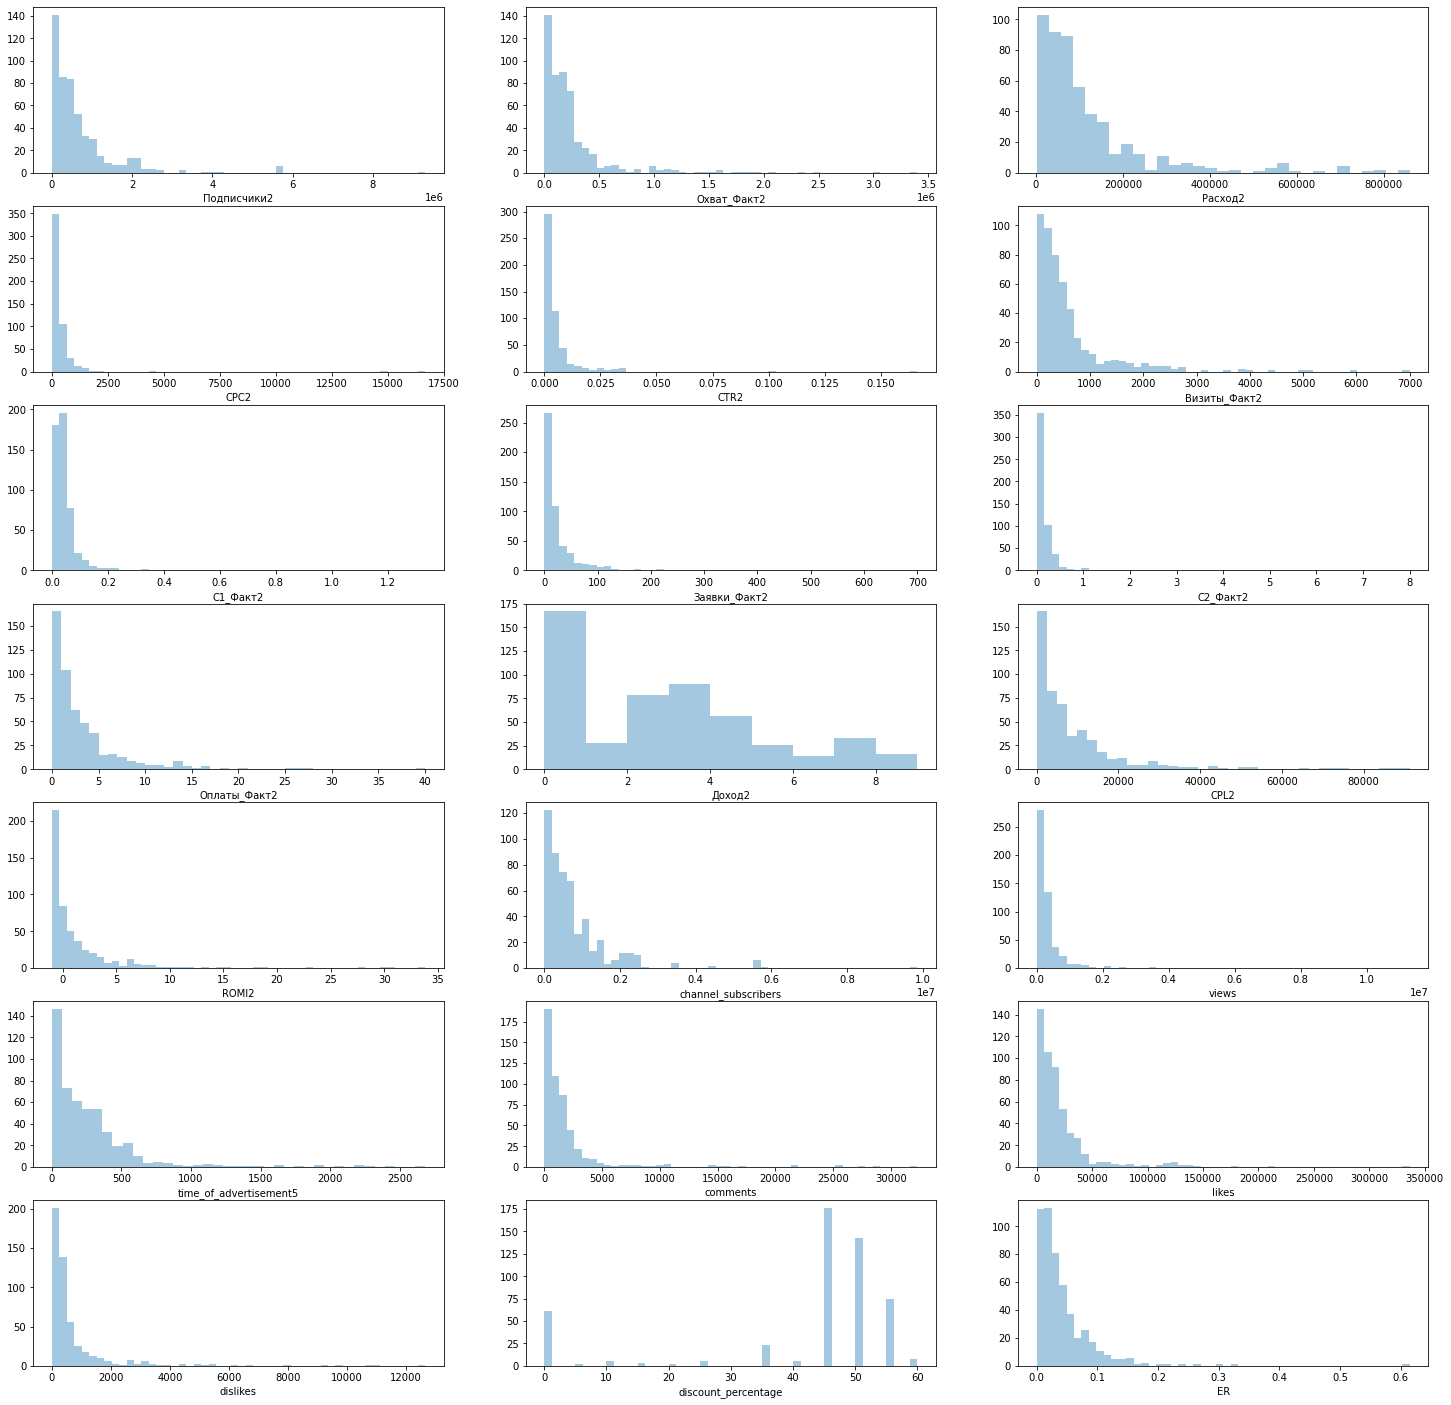

In [172]:
fig, axes = plt.subplots(7,3, figsize=(25,25))

for i,col in enumerate(num_cols):
    sns.distplot(data[col], kde=False, ax=axes.flat[i])

–ü–æ —á–∏—Å–ª–æ–≤—ã–º –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º. –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –Ω–µ –Ω–æ—Ä–º–∞–ª—å–Ω—ã–µ —Å —Å–∏–ª—å–Ω—ã–º —Å–º–µ—â–µ–Ω–∏–µ–º –∏ –±–æ–ª—å—à–∏–º –ø—Ä–∞–≤—ã–º —Ö–≤–æ—Å—Ç–æ–º.

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –º–µ–∂–¥—É –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏:

–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –Ω–∞—à–µ–π —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –æ—Ç –º–µ—Å—è—Ü–∞:

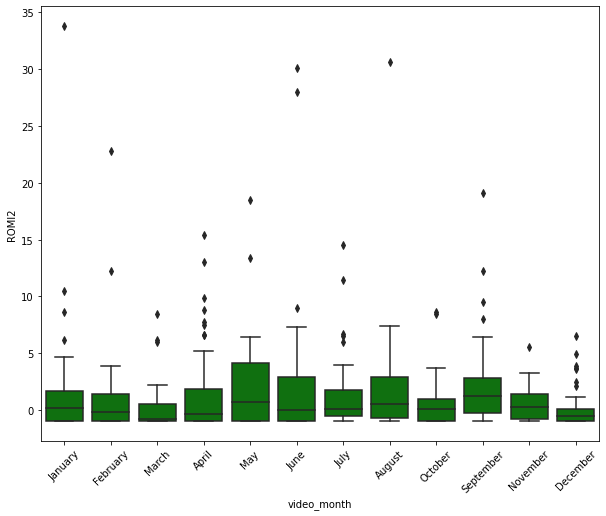

In [173]:
plt.figure(figsize=(10, 8))
g1 = sns.boxplot(y='ROMI2', x='video_month', 
                  data=data, color='green')
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
plt.show()

–õ—É—á—à–∏–µ –º–µ—Å—è—Ü—ã - –º–∞–π, –∏—é–Ω—å –∏ –∞–≤–≥—É—Å—Ç, —Ö—É–¥—à–∏–µ - –¥–µ–∫–∞–±—Ä—å –∏ –º–∞—Ä—Ç

–ó–∞–≤–∏—Å–∏–º–æ—Ç—å –¥–æ—Ö–æ–¥–∞ –ø–æ –º–µ—Å—è—Ü–∞–º:

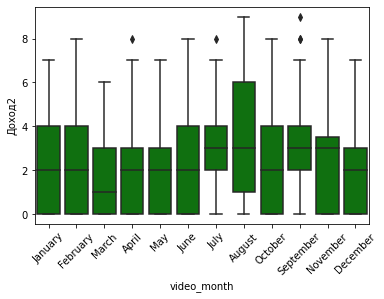

In [174]:
g1 = sns.boxplot(y='–î–æ—Ö–æ–¥2', x='video_month', 
                  data=data, color='green')
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
plt.show()

–°–∞–º—ã–π –≤—ã—Å–æ–∫–∏–π –¥–æ—Ö–æ–¥ —Å–ª—É—á–∞–µ—Ç—Å—è –≤ –∞–≤–≥—É—Å—Ç–µ, –≤—ã—Å–æ–∫–∏–µ –º–µ–¥–∏–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –¥–æ—Ö–æ–¥–∞ –≤ –∏—é–ª–µ, –∞–≤–≥—É—Å—Ç–µ –∏ —Å–µ–Ω—Ç—è–±—Ä–µ

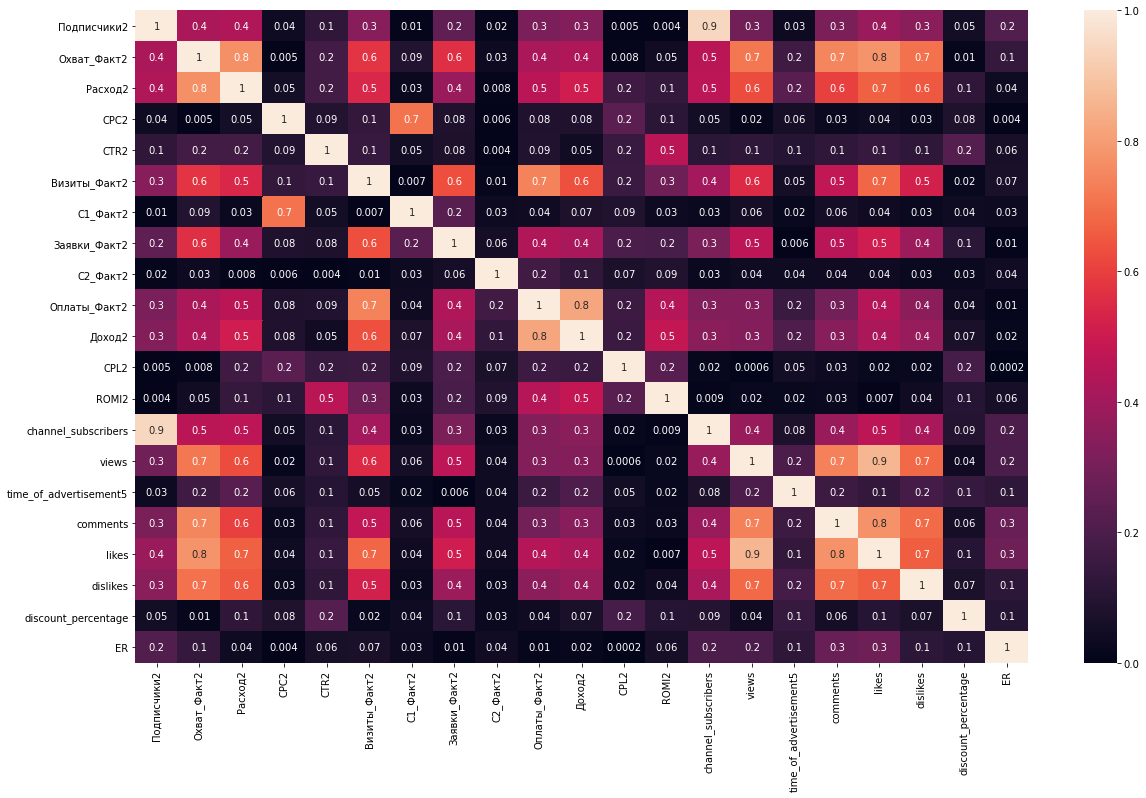

In [175]:
plt.figure(figsize=(20, 12))
sns.heatmap(data[num_cols].corr().abs(),annot=True,vmin=0,vmax=1,fmt=".1g")

–í—ã–≤–æ–¥—ã –ø–æ –≥—Ä–∞—Ñ–∏–∫—É –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏:
    -–ö–æ—ç—Ñ.–∫–æ—Ä—Ä 0.9 –º–µ–∂–¥—É '–ü–æ–¥–ø–∏—Å—á–∏–∫–∏2' –∏ 'channel_subscribers'. –¢–∞–∫ –∫–∞–∫ –≤—Ç–æ—Ä–æ–π –ø—Ä–∏–∑–Ω–∞–∫ —ç—Ç–æ –ø—Ä–æ—Å—Ç–æ –ø—Ä–∏—Ä–æ—Å—Ç –ø–µ—Ä–≤–æ–≥–æ —Å–æ –≤—Ä–µ–º–µ–Ω–µ–º.
    -–ö–æ—ç—Ñ.–∫–æ—Ä—Ä 0.9 –º–µ–∂–¥—É   'views'–∏ 'likes'. –¢–∞–∫ –∫–∞ –≤—ã–±—Ä–∞–Ω—ã –∫–∞–Ω–∞–ª—ã –∫–æ—Ç–æ—Ä—ã–µ –Ω—Ä–∞–≤—è—Ç—Å—è –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è–º.
    -–ö–æ—ç—Ñ.–∫–æ—Ä—Ä 0.8 –º–µ–∂–¥—É    '–û–ø–ª–∞—Ç—ã_–§–∞–∫—Ç2'–∏ '–î–æ—Ö–æ–¥2'. –õ–æ–≥–∏—á–Ω–æ, —á—Ç–æ –¥–æ—Ö–æ–¥ –∑–∞–≤–∏—Å–∏—Ç –æ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–∞ –æ–ø–ª–∞—Ç.
    -–ö–æ—ç—Ñ.–∫–æ—Ä—Ä 0.8 –º–µ–∂–¥—É '–û—Ö–≤–∞—Ç_–§–∞–∫—Ç2' –∏ 'views'. –í—Ç–æ—Ä–æ–π –ø—Ä–∏–∑–Ω–∞–∫  - —ç—Ç–æ —Ç–∞–∫ –∂–µ –ø—Ä–∏—Ä–æ—Å—Ç –ø–µ—Ä–≤–æ–≥–æ —Å–æ –≤—Ä–µ–º–µ–Ω–µ–º.
    -–ö–æ—ç—Ñ.–∫–æ—Ä—Ä –≤—ã—à–µ –º–µ–∂–¥—É 'views'–∏ 'likes' —á–µ–º –º–µ–∂–¥—É 'views'–∏ 'dislikes'. –í–∏–¥–µ–æ –±–æ–ª—å—à–µ –Ω—Ä–∞–≤—è—Ç—Å—è –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è–º.
    
–¶–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è 'ROMI2':
    -–ö–æ—ç—Ñ.–∫–æ—Ä—Ä 0.5 –º–µ–∂–¥—É 'ROMI2' –∏ '–î–æ—Ö–æ–¥2' –¢–∞–∫ –∫–∞–∫ —ç—Ç –¥–æ—Ö–æ–¥–Ω—ã–µ —Å—Ç–∞—Ç—å–∏ –æ–Ω–∏ –≤–∑–∞–∏–º–æ—Å–≤—è–∑–∞–Ω—ã
    -–ö–æ—ç—Ñ.–∫–æ—Ä—Ä 0.5 –º–µ–∂–¥—É 'ROMI2' –∏  'CTR2'(–ö–æ–Ω–≤–µ—Ä—Å–∏—è –ø—Ä–æ—Å–º–æ—Ç—Ä–æ–≤ –≤ –ø–µ—Ä–µ—Ö–æ–¥ ). –ì–æ–≤–æ—Ä–∏—Ç –æ —Ç–æ–º, —á—Ç–æ –∫–ª–∏–µ–Ω—Ç—ã –ø–µ—Ä–µ—à–µ–¥—à–∏ –ø–æ —Å—Å—ã–ª–∫–µ –≤ –∏—Ç–æ–≥–µ —á–∞—Å—Ç–æ —Å–æ–≤–µ—Ä—à–∞—é—Ç –æ–ø–ª–∞—Ç—É.
    -–ö–æ—ç—Ñ.–∫–æ—Ä—Ä 0.4 –º–µ–∂–¥—É 'ROMI2' –∏ '–û–ø–ª–∞—Ç—ã_–§–∞–∫—Ç2' –Ω–µ –±–ª–∏–∑–∫–∞ –∫ 1 —Ç–æ–ª—å–∫–æ –ø–æ—Ç–æ–º—É, —á—Ç–æ –∏–Ω–æ–≥–¥–∞ –±–æ–ª—å—à–µ –∑–∞—Ç—Ä–∞—Ç –∏ –æ–Ω–∏ —Å–Ω–∏–∂–∞—é—Ç –ø—Ä–∏–±—ã–ª—å.

–ü–æ—Å–º–æ—Ç—Ä–∏–º –∫–∞–∫–æ–π –ø—Ä–∏–∑–Ω–∞–∫ –≤–∞–∂–Ω–µ–µ –¥–ª—è –Ω–∞—à–µ–≥–æ —Ç–∞—Ä–≥–µ—Ç–∞:

E:\Anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


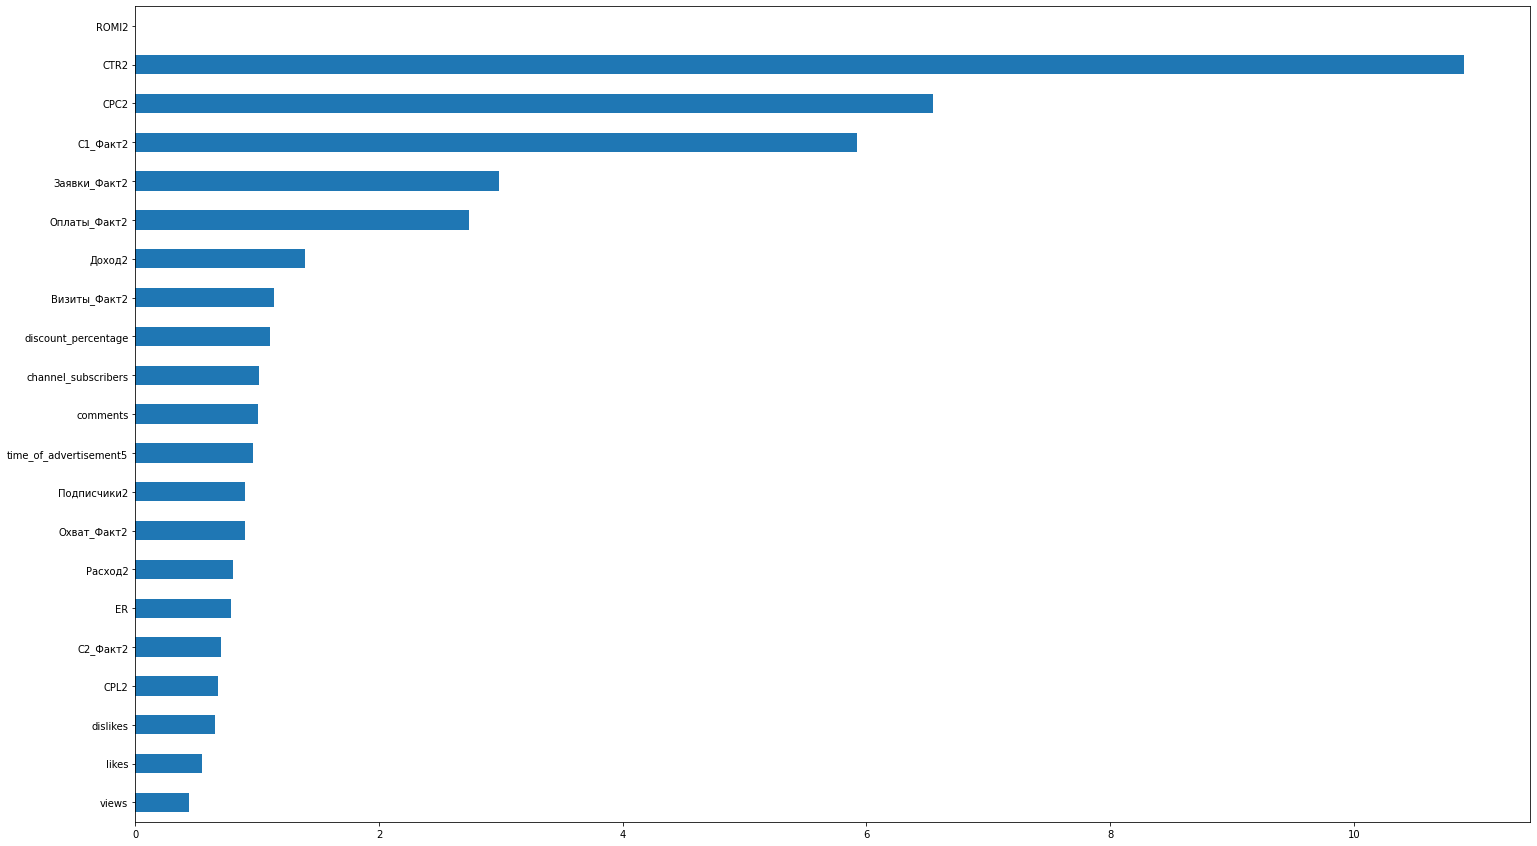

In [176]:
from sklearn.feature_selection import f_classif, mutual_info_classif


df_temp = data.loc[data['ROMI2']>-1]
imp_num = pd.Series(f_classif(df_temp[num_cols], df_temp['ROMI2'])[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh',figsize=(25,15))


## –ö–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ + –Ω–æ–≤—ã–µ —Ñ–∏—á–∏

In [177]:
cat_cols = ['–õ–∏–Ω–µ–π–∫–∞_nums','–º–µ—Å—è—Ü_nums','–≥–æ–¥_nums']
new_cols  = ['–õ–∏–Ω–µ–π–∫–∞3_romi','–ú–µ—Å—è—Ü_romi','–≥–æ–¥_romi','days_romi','time_of_advertisement6_romi']

In [178]:
data.head()

–≥–æ–¥        –î–∞—Ç–∞   –ú–µ—Å—è—Ü     –ù–∞–∑–≤–∞–Ω–∏–µ      –§–æ—Ä–º–∞—Ç –¢–µ–≥_(–∫—É—Ä—Å)       –õ–∏–Ω–µ–π–∫–∞  \
0  2019  15.01.2020  —è–Ω–≤–∞—Ä—å     Flatingo  –ò–Ω—Ç–µ–≥—Ä–∞—Ü–∏—è         GD        –ö–æ–¥–∏–Ω–≥   
1  2020  15.01.2020  —è–Ω–≤–∞—Ä—å    Johe News  –ò–Ω—Ç–µ–≥—Ä–∞—Ü–∏—è        PWS        –ö–æ–¥–∏–Ω–≥   
2  2020  15.01.2020  —è–Ω–≤–∞—Ä—å  PRO —Ä–æ–±–æ—Ç–æ–≤  –ò–Ω—Ç–µ–≥—Ä–∞—Ü–∏—è        DST  Data Science   
3  2020  15.01.2020  —è–Ω–≤–∞—Ä—å     –•–∞—É–¥–∏ –•–æ  –ò–Ω—Ç–µ–≥—Ä–∞—Ü–∏—è        PWS        –ö–æ–¥–∏–Ω–≥   
4  2020  15.01.2020  —è–Ω–≤–∞—Ä—å      Foo52ru  –ò–Ω—Ç–µ–≥—Ä–∞—Ü–∏—è        DST  Data Science   

  –ü–æ–¥–ø–∏—Å—á–∏–∫–∏ –û—Ö–≤–∞—Ç_–§–∞–∫—Ç    –†–∞—Å—Ö–æ–¥   CPC    –°TR –í–∏–∑–∏—Ç—ã_–§–∞–∫—Ç –°1_–§–∞–∫—Ç  \
0     52 027     42¬†225   —Ä.4¬†500  —Ä.15  0,72%         304   11,2%   
1      9¬†000      6¬†389   —Ä.5¬†000  —Ä.40  1,94%         124    4,0%   
2     38¬†000      6¬†900   —Ä.7¬†500  —Ä.46  2,38%         164    7,9%   
3    842¬†000     50¬†000  —Ä.25¬†000  —Ä.15  3,39%        1697    6,5%   
4     35¬†000     22¬†000  —Ä.25¬†000  —Ä.60  1,90%         418    4,3%   

   –ó–∞—è–≤–∫–∏_–§–∞–∫—Ç –°2_–§–∞–∫—Ç –û–ø–ª–∞—Ç—ã_–§–∞–∫—Ç  –î–æ—Ö–æ–¥      CPL   ROMI  \
0     34.00000    0,0%           0      0    —Ä.132  -100%   
1      5.00000    0,0%           0      0  —Ä.1¬†000  -100%   
2     13.00000   23,1%           3      4    —Ä.577  3380%   
3    111.00000    5,4%           6      4    —Ä.225  1044%   
4     18.00000   11,1%           2      3  —Ä.1¬†389   620%   

                                              link_x    link_true  \
0        https://www.youtube.com/watch?v=aqSjawK_QwA  aqSjawK_QwA   
1  https://www.youtube.com/watch?v=o7h1-6U1u1g&t=...  o7h1-6U1u1g   
2  https://www.youtube.com/watch?v=mk8OsCBZ-yw&fe...  mk8OsCBZ-yw   
3                       https://youtu.be/M8fhrtvedHA  M8fhrtvedHA   
4        https://www.youtube.com/watch?v=J9ZgrTAFw60  J9ZgrTAFw60   

                                        link_y                   channel_name  \
0  https://www.youtube.com/watch?v=aqSjawK_QwA      Flatingo. –†–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫ –∏–≥—Ä   
1  https://www.youtube.com/watch?v=o7h1-6U1u1g                      Johe News   
2  https://www.youtube.com/watch?v=mk8OsCBZ-yw                    PRO —Ä–æ–±–æ—Ç–æ–≤   
3  https://www.youtube.com/watch?v=M8fhrtvedHA  –•–∞—É–¥–∏ –•–æ‚Ñ¢ - –ü—Ä–æ—Å—Ç–æ –æ –º–∏—Ä–µ IT!   
4  https://www.youtube.com/watch?v=J9ZgrTAFw60             foo52ru –¢–µ—Ö–Ω–æ–®–∞–º–∞–Ω   

   channel_subscribers                                         video_name  \
0         270000.00000  –ö–∞–∫ —Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫–∏ –¥–µ–ª—è—Ç –∏–≥—Ä—ã / –°–æ–∑–¥–∞–Ω–∏–µ –∏–≥—Ä –∏ –∏...   
1          14600.00000                        Raspberry Pi –ª—É—á—à–∏–µ –ø—Ä–æ–µ–∫—Ç—ã   
2         136000.00000  20+ –°–∞–º—ã—Ö –ù–µ–≤–µ—Ä–æ—è—Ç–Ω—ã—Ö –ò–∑–æ–±—Ä–µ—Ç–µ–Ω–∏–π, –ö–æ—Ç–æ—Ä—ã–µ –ò–∑–º...   
3        1560000.00000                      –ü–∏—à–µ–º TELEGRAM –±–æ—Ç–∞ –Ω–∞ Python   
4          62100.00000  –ù–µ–π—Ä–æ–Ω–Ω–∞—è —Å–µ—Ç—å. –ß–∞—Å—Ç—å 6. –ü—Ä–∏–∫—Ä—É—á–∏–≤–∞—é –Ω–µ–π—Ä–æ—Å–µ—Ç—å...   

            video_date  video_year video_month day_of_week        views  \
0   2019-01-14 4:23:02  2019.00000     January      Monday 107619.00000   
1  2020-01-17 11:58:16  2020.00000     January      Friday  62889.00000   
2  2020-01-23 13:33:38  2020.00000     January    Thursday 112566.00000   
3  2020-01-24 18:33:25  2020.00000     January      Friday 560514.00000   
4   2020-01-24 4:44:31  2020.00000     January      Friday  59620.00000   

  video_duration time_of_advertisement  part_of_video_with_ad_from1_to_10  \
0          3M46S                 00m02                            1.00000   
1         31M41S                 02m42                            2.00000   
2         10M14S                 04m13                            5.00000   
3         12M58S                 06m52                            6.00000   
4          9M23S                 00m43                            2.00000   

       vi

–†–∞—Å—Å–º–æ—Ç—Ä–∏–º –ø—Ä–∏–∑–Ω–∞–∫ '–õ–∏–Ω–µ–π–∫–∞':

In [179]:
data['–õ–∏–Ω–µ–π–∫–∞2'] = data['–õ–∏–Ω–µ–π–∫–∞'].str.lower()
data['–õ–∏–Ω–µ–π–∫–∞2'] = data['–õ–∏–Ω–µ–π–∫–∞2'].replace(r'\s+','',regex=True)
data['–õ–∏–Ω–µ–π–∫–∞2'] = data['–õ–∏–Ω–µ–π–∫–∞2'].replace('analytics','–∞–Ω–∞–ª–∏—Ç–∏–∫–∞',regex=True)
data['–õ–∏–Ω–µ–π–∫–∞2'] = data['–õ–∏–Ω–µ–π–∫–∞2'].replace('datascience–∞–Ω–∞–ª–∏—Ç–∏–∫–∞','datascience',regex=True)

In [180]:
data['–õ–∏–Ω–µ–π–∫–∞2'].value_counts()

–∫–æ–¥–∏–Ω–≥         254
–¥–∏–∑–∞–π–Ω          73
–∞–Ω–∞–ª–∏—Ç–∏–∫–∞       72
datascience     71
–º–µ–Ω–µ–¥–∂–º–µ–Ω—Ç      28
sf              10
–º–∞—Ä–∫–µ—Ç–∏–Ω–≥        1
Name: –õ–∏–Ω–µ–π–∫–∞2, dtype: int64

In [181]:
# –ó–∞–∫–æ–¥–∏—Ä—É–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫ —Å –ø–æ–º–æ—â—å—é —Å–ª–æ–≤–∞—Ä—è
–õ–∏–Ω–µ–π–∫–∞_nums = {'datascience': 1,
 'sf': 2,
 '–∞–Ω–∞–ª–∏—Ç–∏–∫–∞': 3,
 '–¥–∏–∑–∞–π–Ω': 4,
 '–∫–æ–¥–∏–Ω–≥': 5,
 '–º–∞—Ä–∫–µ—Ç–∏–Ω–≥': 6,
 '–º–µ–Ω–µ–¥–∂–º–µ–Ω—Ç': 7}
data['–õ–∏–Ω–µ–π–∫–∞_nums'] = data['–õ–∏–Ω–µ–π–∫–∞2']
data['–õ–∏–Ω–µ–π–∫–∞_nums'] = data['–õ–∏–Ω–µ–π–∫–∞_nums'].replace(–õ–∏–Ω–µ–π–∫–∞_nums)

In [182]:
# –°–æ–∑–¥–∞–¥–∏–º –Ω–æ–≤—ã–π –ø—Ä–∏–∑–Ω–∞–∫ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å ROMI2 –æ—Ç –õ–∏–Ω–µ–π–∫–∞2
lineyka = data.groupby(by = '–õ–∏–Ω–µ–π–∫–∞2')['ROMI2'].agg(['mean','min','max'])

Text(0.5, 1.0, '–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å ROMI –æ—Ç –ª–∏–Ω–µ–π–∫–∏ –∫—É—Ä—Å–æ–≤')

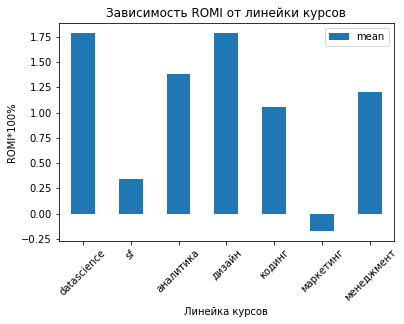

In [183]:
# –í—ã–±–µ—Ä–µ–º –¥–ª—è –Ω–∞—à–µ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ —Å—Ä–µ–¥–Ω–µ–µ, —Ç.–∫. –æ–Ω–æ –Ω–∞–∏–º–µ–Ω–µ–µ —á—É–≤—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –∫ –≤—ã–±—Ä–æ—Å–∞–º

lineyka.plot( y = 'mean', kind = 'bar', rot=45,)
plt.ylabel('ROMI*100%')
plt.xlabel('–õ–∏–Ω–µ–π–∫–∞ –∫—É—Ä—Å–æ–≤')
plt.title("–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å ROMI –æ—Ç –ª–∏–Ω–µ–π–∫–∏ –∫—É—Ä—Å–æ–≤")

In [184]:
lineyka_slov = data.groupby(by = '–õ–∏–Ω–µ–π–∫–∞2')['ROMI2'].agg('mean')
slov = lineyka_slov.to_dict()
slov

{'datascience': 1.7854929577464784,
 'sf': 0.3430000000000001,
 '–∞–Ω–∞–ª–∏—Ç–∏–∫–∞': 1.3826388888888888,
 '–¥–∏–∑–∞–π–Ω': 1.7883561643835617,
 '–∫–æ–¥–∏–Ω–≥': 1.05251968503937,
 '–º–∞—Ä–∫–µ—Ç–∏–Ω–≥': -0.17,
 '–º–µ–Ω–µ–¥–∂–º–µ–Ω—Ç': 1.2017857142857142}

In [185]:
# –ù–æ–≤—ã–π –ø—Ä–∏–∑–Ω–∞–∫ —Å—Ä–µ–¥–Ω–µ–µ Romi –æ—Ç –ª–∏–Ω–µ–π–∫–∏ –∫—É—Ä—Å–æ–≤
data['–õ–∏–Ω–µ–π–∫–∞3_romi'] = data['–õ–∏–Ω–µ–π–∫–∞2']
data['–õ–∏–Ω–µ–π–∫–∞3_romi'] = data['–õ–∏–Ω–µ–π–∫–∞3_romi'].replace(slov)


–ü—Ä–∏–∑–Ω–∞–∫ 'video_month':

In [186]:
data['video_month'].value_counts()

April        63
June         48
December     47
November     43
July         43
October      42
September    40
August       39
March        39
February     38
January      29
May          24
Name: video_month, dtype: int64

In [187]:
data['video_month'].fillna(0,inplace=True)

In [188]:
# –ó–∞–∫–æ–¥–∏—Ä—É–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫
–º–µ—Å—è—Ü_nums = {'August': 8,
 'April': 4,
 'December': 12,
 'July': 7,
 'June': 6,
 'May': 5,
 'March': 3,
 'November': 11,
 'October': 10,
 'September': 9,
 'Zero' :13,            
 'February': 2,
 'January': 1}
data['–º–µ—Å—è—Ü_nums'] = data['video_month']
data['–º–µ—Å—è—Ü_nums'] = data['–º–µ—Å—è—Ü_nums'].replace(–º–µ—Å—è—Ü_nums)

–°–æ–∑–¥–∞–¥–∏–º –Ω–æ–≤—ã–π –ø—Ä–∏–∑–Ω–∞–∫  - –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å ROMI2 –æ—Ç –º–µ—Å—è—Ü–∞

In [189]:
months = data.groupby(by = 'video_month')['ROMI2'].agg('mean')

Text(0.5, 1.0, '–°—Ä–µ–¥–Ω–∏–π ROMI –Ω–∞ —Ä–æ–ª–∏–∫ –ø–æ –º–µ—Å—è—Ü–∞–º')

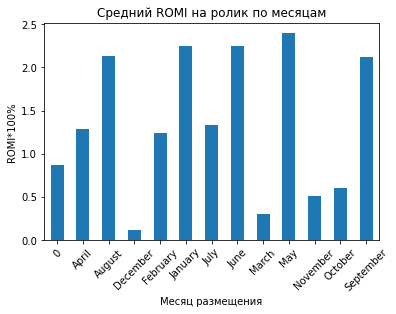

In [190]:
months.plot( y = 'mean', kind = 'bar', rot=45,)
plt.ylabel('ROMI*100%')
plt.xlabel('–ú–µ—Å—è—Ü —Ä–∞–∑–º–µ—â–µ–Ω–∏—è')
plt.title("–°—Ä–µ–¥–Ω–∏–π ROMI –Ω–∞ —Ä–æ–ª–∏–∫ –ø–æ –º–µ—Å—è—Ü–∞–º")

In [191]:
slov_months = months.to_dict()

In [192]:
slov_months

{0: 0.8671428571428571,
 'April': 1.2917460317460319,
 'August': 2.1302564102564103,
 'December': 0.11872340425531915,
 'February': 1.239473684210526,
 'January': 2.2503448275862072,
 'July': 1.3327906976744186,
 'June': 2.248333333333333,
 'March': 0.2971794871794873,
 'May': 2.3995833333333336,
 'November': 0.5113953488372093,
 'October': 0.5983333333333333,
 'September': 2.1262499999999998}

In [193]:
# –ù–æ–≤—ã–π –ø—Ä–∏–∑–Ω–∞–∫ —Å—Ä–µ–¥–Ω–µ–µ Romi –æ—Ç –º–µ—Å—è—Ü–∞
data['–ú–µ—Å—è—Ü_romi'] = data['video_month']
data['–ú–µ—Å—è—Ü_romi'] = data['–ú–µ—Å—è—Ü_romi'].replace(slov_months)

In [194]:
# –ü–æ—Å–º–æ—Ç—Ä–∏ –ø—Ä–∏–∑–Ω–∞–∫ –≥–æ–¥:
data['–≥–æ–¥'].value_counts()

2020    358
2021    145
2019      6
Name: –≥–æ–¥, dtype: int64

In [195]:
# –ó–∞–∫–æ–¥–∏—Ä—É–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫
data['–≥–æ–¥'] = data['–≥–æ–¥'].astype(str)
–≥–æ–¥_nums = {
    '2020' :1,
    '2021' :2,
    '2019' :3,
}
data['–≥–æ–¥_nums'] = data['–≥–æ–¥']
data['–≥–æ–¥_nums'] = data['–≥–æ–¥_nums'].replace(–≥–æ–¥_nums)

In [196]:
# –°–æ–∑–¥–∞–¥–∏–º –Ω–æ–≤—ã –ø—Ä–∏–∑–Ω–∞–∫ - –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å ROMI2  –æ—Ç –≥–æ–¥–∞:


Text(0.5, 1.0, '–°—Ä–µ–¥–Ω–∏–π ROMI –Ω–∞ —Ä–æ–ª–∏–∫ –ø–æ –≥–æ–¥–∞–º')

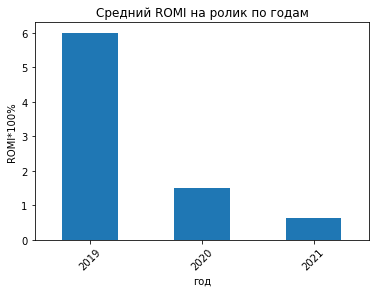

In [197]:
years = data.groupby(by = '–≥–æ–¥')['ROMI2'].agg('mean')
years.plot( y = 'mean', kind = 'bar', rot=45)
plt.ylabel('ROMI*100%')
plt.title("–°—Ä–µ–¥–Ω–∏–π ROMI –Ω–∞ —Ä–æ–ª–∏–∫ –ø–æ –≥–æ–¥–∞–º")
# –û–±—Ä–∞—Ç–∏–º –≤–Ω–∏–º–∞–Ω–∏–µ, —á—Ç–æ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –≤–æ–∑–≤—Ä–∞—Ç–∞ –∏–Ω–≤–µ—Å—Ç–∏—Ü–∏–π –≥–æ–¥ –æ—Ç –≥–æ–¥–∞ —Å–Ω–∏–∂–∞–µ—Ç—Å—è

In [198]:
years

–≥–æ–¥
2019   6.00000
2020   1.48567
2021   0.64310
Name: ROMI2, dtype: float64

Text(0.5, 1.0, '–°—Ä–µ–¥–Ω–∏–π —Ä–∞—Å—Ö–æ–¥ –Ω–∞ —Ä–æ–ª–∏–∫ –ø–æ –≥–æ–¥–∞–º')

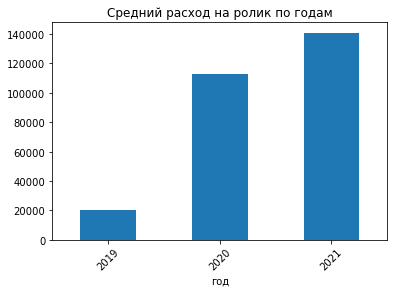

In [199]:
years_rashod = data.groupby(by = '–≥–æ–¥')['–†–∞—Å—Ö–æ–¥2'].agg('mean')
years_rashod.plot( y = 'mean', kind = 'bar', rot=45,)
plt.title("–°—Ä–µ–¥–Ω–∏–π —Ä–∞—Å—Ö–æ–¥ –Ω–∞ —Ä–æ–ª–∏–∫ –ø–æ –≥–æ–¥–∞–º")
# –†–∞—Å—Ö–æ–¥ –¥–µ–Ω–µ–≥ –Ω–∞ —Ä–µ–∫–ª–∞–º—É —Ä–∞—Å—Ç–µ—Ç

Text(0.5, 1.0, '–°—Ä–µ–¥–Ω–∏–π –¥–æ—Ö–æ–¥ –Ω–∞ —Ä–æ–ª–∏–∫ –ø–æ –≥–æ–¥–∞–º')

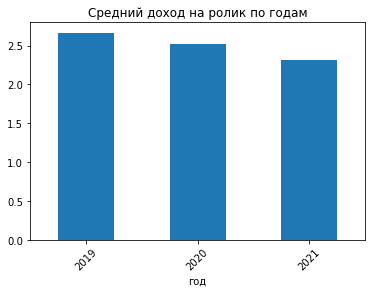

In [200]:
years_rashod = data.groupby(by = '–≥–æ–¥')['–î–æ—Ö–æ–¥2'].agg('mean')
years_rashod.plot( y = 'mean', kind = 'bar', rot=45,)
plt.title("–°—Ä–µ–¥–Ω–∏–π –¥–æ—Ö–æ–¥ –Ω–∞ —Ä–æ–ª–∏–∫ –ø–æ –≥–æ–¥–∞–º")
# –î–æ—Ö–æ–¥ –ø–æ—Ç–∏—Ö–æ–Ω—å–∫—É —É–º–µ–Ω—å—à–∞–µ—Ç—Å—è, –∑–Ω–∞—á–∏—Ç —ç—Ñ—Ñ–µ–∫—Ç–∞ –æ—Ç —Ä–µ–∫–ª–∞–º—ã –º–µ–Ω—å—à–µ

In [201]:
slov_years =years.to_dict()
slov_years

{'2019': 6.0, '2020': 1.4856703910614542, '2021': 0.6431034482758621}

In [202]:
data['–≥–æ–¥_romi'] = data['–≥–æ–¥']
data['–≥–æ–¥_romi'] = data['–≥–æ–¥_romi'].replace(slov_years)

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –ø—Ä–∏–∑–Ω–∞–∫ 'day_of_week':

In [203]:
data['day_of_week'].value_counts()

Thursday     92
Tuesday      87
Wednesday    73
Saturday     71
Friday       64
Sunday       58
Monday       50
Name: day_of_week, dtype: int64

In [204]:
data['day_of_week'].isna().sum()

14

In [205]:
data['day_of_week'].fillna(0,inplace=True)

In [206]:
days = data.groupby(by = 'day_of_week')['ROMI2'].agg('mean')

Text(0.5, 1.0, '–°—Ä–µ–¥–Ω–∏–π ROMI –Ω–∞ —Ä–æ–ª–∏–∫ –ø–æ –¥–Ω—è–º –Ω–µ–¥–µ–ª–∏')

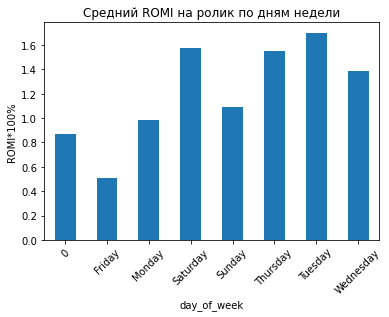

In [207]:
days.plot( y = 'mean', kind = 'bar', rot=45,)
plt.ylabel('ROMI*100%')
plt.title("–°—Ä–µ–¥–Ω–∏–π ROMI –Ω–∞ —Ä–æ–ª–∏–∫ –ø–æ –¥–Ω—è–º –Ω–µ–¥–µ–ª–∏")

In [208]:
slov_days =days.to_dict()
slov_days

{0: 0.8671428571428571,
 'Friday': 0.5092187499999998,
 'Monday': 0.9873999999999999,
 'Saturday': 1.5756338028169012,
 'Sunday': 1.0953448275862068,
 'Thursday': 1.5503260869565216,
 'Tuesday': 1.7006896551724133,
 'Wednesday': 1.3839726027397259}

In [209]:
# –ù–æ–≤—ã–π –ø—Ä–∏–∑–Ω–∞–∫ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å ROMI –æ—Ç –¥–Ω—è –Ω–µ–¥–µ–ª–∏
data['days_romi'] = data['day_of_week']
data['days_romi'] = data['days_romi'].replace(slov_days)

In [210]:
# –ó–∞–∫–æ–¥–∏—Ä—É–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫ day_of_week:
#days_nums = {
#    {'0': 1,
# 'Friday':2,
# 'Monday': 3,
# 'Saturday': 4,
# 'Sunday': 5,
# 'Thursday': 6,
# 'Tuesday': 7,
# 'Wednesday': 8}
#}
#data['days_nums'] = data['day_of_week']
#data['days_nums'] = data['days_nums'].replace(–≥–æ–¥_nums)

In [211]:
# –ü–æ—Ä–∞–±–æ—Ç–∞–µ–º —Å –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å—é —Ä–æ–ª–∏–∫–∞ –∏ –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å—é —Ä–µ–∫–ª–∞–º—ã:
# –í –∏—Ç–æ–≥–µ —É –º–µ–Ω—è –ø–æ–ª—É—á–∏–ª—Å—è —á–∏—Å–ª–æ–≤–æ–π —Å—Ç–æ–ª–±–µ—Ü, –¥–æ–±–∞–≤–∏–º –µ–≥–æ –∫ num_cols
data['time_of_advertisement3'] = data['time_of_advertisement'].str.split('m').str[0]
data['time_of_advertisement4'] = data['time_of_advertisement'].str.split('m').str[1]
data[["time_of_advertisement3", "time_of_advertisement4"]] = data[["time_of_advertisement3", "time_of_advertisement4"]].apply(pd.to_numeric)
data['time_of_advertisement5'] = data['time_of_advertisement3']*60+data['time_of_advertisement4']
data['time_of_advertisement5'].describe()

count    494.00000
mean     288.02632
std      365.17164
min        1.00000
25%       67.00000
50%      195.00000
75%      359.75000
max     2683.00000
Name: time_of_advertisement5, dtype: float64

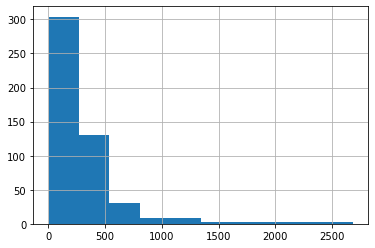

In [212]:
data['time_of_advertisement5'].hist()

In [213]:
data['time_of_advertisement5'].isna().sum()

15

In [214]:
data['time_of_advertisement5'].fillna(0,inplace=True)

In [215]:
# –°–æ–¥–∞–¥–∏–º –Ω–æ–≤—ã–π –ø—Ä–∏–∑–Ω–∞–∫  - –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å ROMI –æ—Ç –¥–ª–∏–Ω–Ω—ã –æ–±—ä—è–≤–ª–µ–Ω–∏—è data['time_of_advertisement5']
def choose(x):
    ''' –§—É–Ω–∫—Ü–∏—è –ø–æ–∑–≤–æ–ª—è–µ—Ç —Ä–∞–∑–¥–µ–ª–∏—Ç—å —á–∏—Å–ª–æ–≤–æ–π —Å—Ç–æ–ª–±–µ—Ü –Ω–∞ –ø—Ä–æ–º–µ–∂—É—Ç–∫–∏ –ø–æ –¥–ª–∏–Ω–Ω–µ —Ä–æ–ª–∏–∫–∞'''
    if x<300:
        return '–¥–æ 5 –º–∏–Ω'
    if  300<=x<600:
        return '–æ—Ç 5 –º–∏–Ω –¥–æ 10 –º–∏–Ω'
    if 600<=x<1200:
        return '–æ—Ç 10 –º–∏–Ω –¥–æ 20 –º–∏–Ω'
    if x>=1200:
        return ' –±–æ–ª–µ–µ 20 –º–∏–Ω'

In [216]:
data['time_of_advertisement6'] = data['time_of_advertisement5'].apply(lambda x: choose(x) )

In [217]:
data['time_of_advertisement6']

0                –¥–æ 5 –º–∏–Ω
1                –¥–æ 5 –º–∏–Ω
2                –¥–æ 5 –º–∏–Ω
3      –æ—Ç 5 –º–∏–Ω –¥–æ 10 –º–∏–Ω
4                –¥–æ 5 –º–∏–Ω
              ...        
582              –¥–æ 5 –º–∏–Ω
583              –¥–æ 5 –º–∏–Ω
584              –¥–æ 5 –º–∏–Ω
585          –±–æ–ª–µ–µ 20 –º–∏–Ω
586              –¥–æ 5 –º–∏–Ω
Name: time_of_advertisement6, Length: 509, dtype: object

In [218]:
time_of_advert = data.groupby(by = 'time_of_advertisement6')['ROMI2'].agg('mean')

Text(0, 0.5, 'ROMI*100%')

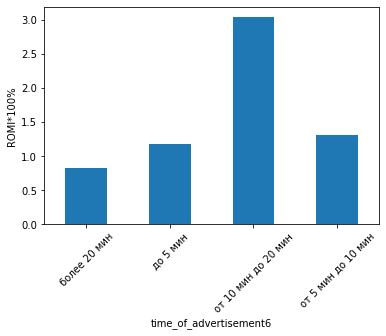

In [219]:
# –°–∞–º—ã–µ –≤—ã–≥–æ–¥–Ω—ã–µ —Ä–æ–ª–∏–∫–∏ –¥–ª–∏–Ω–æ–π –æ—Ç 10 –¥–æ 20 –º–∏–Ω
time_of_advert.plot( y = 'mean', kind = 'bar', rot=45)
plt.ylabel('ROMI*100%')


In [220]:
time_of_advert_slov =time_of_advert.to_dict()

In [221]:
time_of_advert_slov

{' –±–æ–ª–µ–µ 20 –º–∏–Ω': 0.8324999999999998,
 '–¥–æ 5 –º–∏–Ω': 1.1725368731563421,
 '–æ—Ç 10 –º–∏–Ω –¥–æ 20 –º–∏–Ω': 3.039285714285714,
 '–æ—Ç 5 –º–∏–Ω –¥–æ 10 –º–∏–Ω': 1.3111904761904765}

In [222]:
data['time_of_advertisement6_romi'] = data['time_of_advertisement6']
data['time_of_advertisement6_romi'] = data['time_of_advertisement6_romi'].replace(time_of_advert_slov)

In [223]:
# –°–æ–∑–¥–∞–¥–∏–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é –¥–ª—è likes
data['likes'].describe()

count      509.00000
mean     21713.57957
std      30618.82665
min          0.00000
25%       5462.00000
50%      13814.00000
75%      25295.00000
max     336394.00000
Name: likes, dtype: float64

In [224]:
def choose_likes(x):
    ''' –§—É–Ω–∫—Ü–∏—è –ø–æ–∑–≤–æ–ª—è–µ—Ç —Ä–∞–∑–¥–µ–ª–∏—Ç—å —á–∏—Å–ª–æ–≤–æ–π —Å—Ç–æ–ª–±–µ—Ü –Ω–∞ –ø—Ä–æ–º–µ–∂—É—Ç–∫–∏ –ø–æ –¥–ª–∏–Ω–Ω–µ —Ä–æ–ª–∏–∫–∞'''
    if x<5462:
        return '–ª–∞–π–∫–æ–≤ –º–µ–Ω—å—à–µ 5462'
    if  5462<=x<13814:
        return '–ª–∞–π–∫–æ–≤ –æ—Ç 5462 –¥–æ 13814'
    if 13814<=x<25295:
        return '–ª–∞–π–∫–æ–≤ –æ—Ç 13814 –¥–æ 25295'
    if x>=25295:
        return ' –ª–∞–π–∫–æ–≤ –±–æ–ª—å—à–µ 25295'

In [225]:
data['likes2'] = data['likes'].apply(lambda x: choose_likes(x) )

In [226]:
data['likes2']

0            –ª–∞–π–∫–æ–≤ –º–µ–Ω—å—à–µ 5462
1            –ª–∞–π–∫–æ–≤ –º–µ–Ω—å—à–µ 5462
2            –ª–∞–π–∫–æ–≤ –º–µ–Ω—å—à–µ 5462
3      –ª–∞–π–∫–æ–≤ –æ—Ç 13814 –¥–æ 25295
4            –ª–∞–π–∫–æ–≤ –º–µ–Ω—å—à–µ 5462
                 ...           
582          –ª–∞–π–∫–æ–≤ –º–µ–Ω—å—à–µ 5462
583    –ª–∞–π–∫–æ–≤ –æ—Ç 13814 –¥–æ 25295
584         –ª–∞–π–∫–æ–≤ –±–æ–ª—å—à–µ 25295
585    –ª–∞–π–∫–æ–≤ –æ—Ç 13814 –¥–æ 25295
586         –ª–∞–π–∫–æ–≤ –±–æ–ª—å—à–µ 25295
Name: likes2, Length: 509, dtype: object

Text(0.5, 1.0, '–°—Ä–µ–¥–Ω–∏–π ROMI –æ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –ª–∞–π–∫–æ–≤')

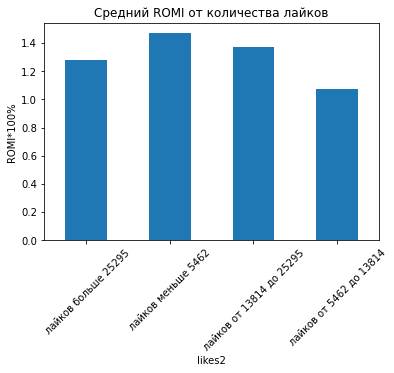

In [227]:
likes_to_ROMI = data.groupby(by = 'likes2')['ROMI2'].agg('mean')
likes_to_ROMI.plot( y = 'mean', kind = 'bar', rot=45)
plt.ylabel('ROMI*100%')
plt.title("–°—Ä–µ–¥–Ω–∏–π ROMI –æ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –ª–∞–π–∫–æ–≤")

Text(0.5, 1.0, '–°—Ä–µ–¥–Ω–∏–π –î–æ—Ö–æ–¥ –æ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –ª–∞–π–∫–æ–≤')

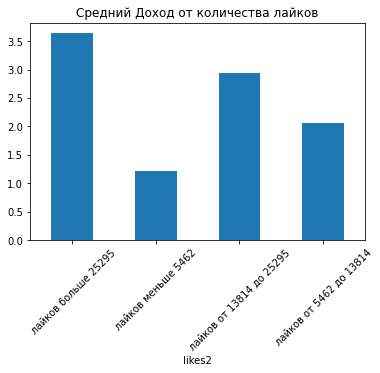

In [228]:
likes_to_ROMI = data.groupby(by = 'likes2')['–î–æ—Ö–æ–¥2'].agg('mean')
likes_to_ROMI.plot( y = 'mean', kind = 'bar', rot=45)
plt.ylabel('')
plt.title("–°—Ä–µ–¥–Ω–∏–π –î–æ—Ö–æ–¥ –æ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –ª–∞–π–∫–æ–≤")

In [229]:
data['–ù–∞–∑–≤–∞–Ω–∏–µ'][data['–î–æ—Ö–æ–¥2']>=8].drop_duplicates()

63        InvestFuture
84            –í–∞—Ä–ª–∞–º–æ–≤
92            –†–µ–¥–∞–∫—Ü–∏—è
173     Dmitry Puchkov
195             –£—Å–∞—á–µ–≤
196           The –õ—é–¥–∏
205          –ê—Å–∞—Ñ—å–µ–≤ 2
249    –ê—Ä—Ç–µ–º–∏–π –õ–µ–±–µ–¥–µ–≤
302       –ê –ø–æ–≥–æ–≤–æ—Ä–∏—Ç—å
358      –†—É—Å–ª–∞–Ω –£—Å–∞—á–µ–≤
Name: –ù–∞–∑–≤–∞–Ω–∏–µ, dtype: object

In [230]:
data['–ù–∞–∑–≤–∞–Ω–∏–µ'][data['ROMI2']>=10].drop_duplicates()

2             PRO —Ä–æ–±–æ—Ç–æ–≤
3                –•–∞—É–¥–∏ –•–æ
13     Web Developer Blog
33              Johe News
36                  MyGap
45            –ê–π–¢–∏ –ë–æ—Ä–æ–¥–∞
59          Anna Lomakina
60             –î–∞—à–∞ –°–Ω–µ–π–ª
114        –õ–∞–Ω–∞ –ì–ª—É—à–∞–∫–æ–≤–∞
173        Dmitry Puchkov
228              litobzor
471             Pingvinus
Name: –ù–∞–∑–≤–∞–Ω–∏–µ, dtype: object

In [231]:
data['–î–æ—Ö–æ–¥2'].describe()

count   509.00000
mean      2.46562
std       2.34128
min       0.00000
25%       0.00000
50%       2.00000
75%       4.00000
max       9.00000
Name: –î–æ—Ö–æ–¥2, dtype: float64

In [232]:
data['ROMI2'].describe()

count   509.00000
mean      1.29886
std       4.04749
min      -1.00000
25%      -1.00000
50%       0.00000
75%       1.74000
max      33.80000
Name: ROMI2, dtype: float64

#### Dummy –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ:

In [233]:
data[cat_cols].head()

–õ–∏–Ω–µ–π–∫–∞_nums  –º–µ—Å—è—Ü_nums  –≥–æ–¥_nums
0             5           1         3
1             5           1         1
2             1           1         1
3             5           1         1
4             1           1         1

In [234]:
data = pd.get_dummies(data,prefix=cat_cols, columns=cat_cols)

In [235]:
data.head()

–≥–æ–¥        –î–∞—Ç–∞   –ú–µ—Å—è—Ü     –ù–∞–∑–≤–∞–Ω–∏–µ      –§–æ—Ä–º–∞—Ç –¢–µ–≥_(–∫—É—Ä—Å)       –õ–∏–Ω–µ–π–∫–∞  \
0  2019  15.01.2020  —è–Ω–≤–∞—Ä—å     Flatingo  –ò–Ω—Ç–µ–≥—Ä–∞—Ü–∏—è         GD        –ö–æ–¥–∏–Ω–≥   
1  2020  15.01.2020  —è–Ω–≤–∞—Ä—å    Johe News  –ò–Ω—Ç–µ–≥—Ä–∞—Ü–∏—è        PWS        –ö–æ–¥–∏–Ω–≥   
2  2020  15.01.2020  —è–Ω–≤–∞—Ä—å  PRO —Ä–æ–±–æ—Ç–æ–≤  –ò–Ω—Ç–µ–≥—Ä–∞—Ü–∏—è        DST  Data Science   
3  2020  15.01.2020  —è–Ω–≤–∞—Ä—å     –•–∞—É–¥–∏ –•–æ  –ò–Ω—Ç–µ–≥—Ä–∞—Ü–∏—è        PWS        –ö–æ–¥–∏–Ω–≥   
4  2020  15.01.2020  —è–Ω–≤–∞—Ä—å      Foo52ru  –ò–Ω—Ç–µ–≥—Ä–∞—Ü–∏—è        DST  Data Science   

  –ü–æ–¥–ø–∏—Å—á–∏–∫–∏ –û—Ö–≤–∞—Ç_–§–∞–∫—Ç    –†–∞—Å—Ö–æ–¥   CPC    –°TR –í–∏–∑–∏—Ç—ã_–§–∞–∫—Ç –°1_–§–∞–∫—Ç  \
0     52 027     42¬†225   —Ä.4¬†500  —Ä.15  0,72%         304   11,2%   
1      9¬†000      6¬†389   —Ä.5¬†000  —Ä.40  1,94%         124    4,0%   
2     38¬†000      6¬†900   —Ä.7¬†500  —Ä.46  2,38%         164    7,9%   
3    842¬†000     50¬†000  —Ä.25¬†000  —Ä.15  3,39%        1697    6,5%   
4     35¬†000     22¬†000  —Ä.25¬†000  —Ä.60  1,90%         418    4,3%   

   –ó–∞—è–≤–∫–∏_–§–∞–∫—Ç –°2_–§–∞–∫—Ç –û–ø–ª–∞—Ç—ã_–§–∞–∫—Ç  –î–æ—Ö–æ–¥      CPL   ROMI  \
0     34.00000    0,0%           0      0    —Ä.132  -100%   
1      5.00000    0,0%           0      0  —Ä.1¬†000  -100%   
2     13.00000   23,1%           3      4    —Ä.577  3380%   
3    111.00000    5,4%           6      4    —Ä.225  1044%   
4     18.00000   11,1%           2      3  —Ä.1¬†389   620%   

                                              link_x    link_true  \
0        https://www.youtube.com/watch?v=aqSjawK_QwA  aqSjawK_QwA   
1  https://www.youtube.com/watch?v=o7h1-6U1u1g&t=...  o7h1-6U1u1g   
2  https://www.youtube.com/watch?v=mk8OsCBZ-yw&fe...  mk8OsCBZ-yw   
3                       https://youtu.be/M8fhrtvedHA  M8fhrtvedHA   
4        https://www.youtube.com/watch?v=J9ZgrTAFw60  J9ZgrTAFw60   

                                        link_y                   channel_name  \
0  https://www.youtube.com/watch?v=aqSjawK_QwA      Flatingo. –†–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫ –∏–≥—Ä   
1  https://www.youtube.com/watch?v=o7h1-6U1u1g                      Johe News   
2  https://www.youtube.com/watch?v=mk8OsCBZ-yw                    PRO —Ä–æ–±–æ—Ç–æ–≤   
3  https://www.youtube.com/watch?v=M8fhrtvedHA  –•–∞—É–¥–∏ –•–æ‚Ñ¢ - –ü—Ä–æ—Å—Ç–æ –æ –º–∏—Ä–µ IT!   
4  https://www.youtube.com/watch?v=J9ZgrTAFw60             foo52ru –¢–µ—Ö–Ω–æ–®–∞–º–∞–Ω   

   channel_subscribers                                         video_name  \
0         270000.00000  –ö–∞–∫ —Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫–∏ –¥–µ–ª—è—Ç –∏–≥—Ä—ã / –°–æ–∑–¥–∞–Ω–∏–µ –∏–≥—Ä –∏ –∏...   
1          14600.00000                        Raspberry Pi –ª—É—á—à–∏–µ –ø—Ä–æ–µ–∫—Ç—ã   
2         136000.00000  20+ –°–∞–º—ã—Ö –ù–µ–≤–µ—Ä–æ—è—Ç–Ω—ã—Ö –ò–∑–æ–±—Ä–µ—Ç–µ–Ω–∏–π, –ö–æ—Ç–æ—Ä—ã–µ –ò–∑–º...   
3        1560000.00000                      –ü–∏—à–µ–º TELEGRAM –±–æ—Ç–∞ –Ω–∞ Python   
4          62100.00000  –ù–µ–π—Ä–æ–Ω–Ω–∞—è —Å–µ—Ç—å. –ß–∞—Å—Ç—å 6. –ü—Ä–∏–∫—Ä—É—á–∏–≤–∞—é –Ω–µ–π—Ä–æ—Å–µ—Ç—å...   

            video_date  video_year video_month day_of_week        views  \
0   2019-01-14 4:23:02  2019.00000     January      Monday 107619.00000   
1  2020-01-17 11:58:16  2020.00000     January      Friday  62889.00000   
2  2020-01-23 13:33:38  2020.00000     January    Thursday 112566.00000   
3  2020-01-24 18:33:25  2020.00000     January      Friday 560514.00000   
4   2020-01-24 4:44:31  2020.00000     January      Friday  59620.00000   

  video_duration time_of_advertisement  part_of_video_with_ad_from1_to_10  \
0          3M46S                 00m02                            1.00000   
1         31M41S                 02m42                            2.00000   
2         10M14S                 04m13                            5.00000   
3         12M58S                 06m52                            6.00000   
4          9M23S                 00m43                            2.00000   

       vi

In [236]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 0 to 586
Data columns (total 91 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   –≥–æ–¥                                509 non-null    object 
 1   –î–∞—Ç–∞                               509 non-null    object 
 2   –ú–µ—Å—è—Ü                              509 non-null    object 
 3   –ù–∞–∑–≤–∞–Ω–∏–µ                           509 non-null    object 
 4   –§–æ—Ä–º–∞—Ç                             509 non-null    object 
 5   –¢–µ–≥_(–∫—É—Ä—Å)                         509 non-null    object 
 6   –õ–∏–Ω–µ–π–∫–∞                            509 non-null    object 
 7   –ü–æ–¥–ø–∏—Å—á–∏–∫–∏                         500 non-null    object 
 8   –û—Ö–≤–∞—Ç_–§–∞–∫—Ç                         503 non-null    object 
 9   –†–∞—Å—Ö–æ–¥                             509 non-null    object 
 10  CPC                                504 non-null    object

## –í—ã–≤–æ–¥—ã –¥–ª—è –ø—Ä–µ–∑–µ–Ω—Ç–∞—Ü–∏–∏

–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–∞–∑–º–µ—â–µ–Ω–∏–π —É –æ–¥–Ω–æ–≥–æ –∏ —Ç–æ–≥–æ –∂–µ –±–ª–æ–≥–µ—Ä–∞: –∫–∞–∫ –º–µ–Ω—è–µ—Ç—Å—è —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç—å —Ä–∞–∑–º–µ—â–µ–Ω–∏–π;

In [237]:
data['video_date']

0       2019-01-14 4:23:02
1      2020-01-17 11:58:16
2      2020-01-23 13:33:38
3      2020-01-24 18:33:25
4       2020-01-24 4:44:31
              ...         
582    2021-04-29 11:30:05
583    2021-04-27 13:27:44
584     2021-04-29 6:00:02
585     2021-04-29 8:51:05
586     2021-04-30 8:20:09
Name: video_date, Length: 509, dtype: object

In [238]:
data['–ù–∞–∑–≤–∞–Ω–∏–µ'].value_counts()[0:10]

–•–∞—É–¥–∏ –•–æ          19
–ú–∞–∫—Å–∏–º –ö–∞—Ü        17
–ê—Å–∞—Ñ—å–µ–≤           13
–ö–∏–∫ –û–±–∑–æ—Ä         12
InvestFuture       9
PRO —Ä–æ–±–æ—Ç–æ–≤        8
MyGap              7
Dmitry Puchkov     7
Pingvinus          7
–í–∞—Ä–ª–∞–º–æ–≤           6
Name: –ù–∞–∑–≤–∞–Ω–∏–µ, dtype: int64

In [239]:
data.groupby(by = '–ù–∞–∑–≤–∞–Ω–∏–µ')['ROMI2'].agg('mean')

–ù–∞–∑–≤–∞–Ω–∏–µ
 Extreme Code    0.13000
#–ß–£–î–û–¢–ï–•–ù–ò–ö–ò    -1.00000
808             -0.33000
Alex Gyver       0.53000
AlexGyver        1.47000
                  ...   
–∫–æ–Ω—Å–µ—Ä–≤—ã        -0.04000
–∫–æ—Å–º–æ—Å –ø—Ä–æ—Å—Ç–æ   -0.76500
–ª–∏–¥–∏–Ω            0.41000
–Ω–µ —Å–ø–æ–π–ª–µ—Ä      -1.00000
—ç–ø–∏–∑–æ–¥—ã          0.75000
Name: ROMI2, Length: 290, dtype: float64

In [240]:
haudi_co = data[data['–ù–∞–∑–≤–∞–Ω–∏–µ']=='–•–∞—É–¥–∏ –•–æ'].groupby(by = 'video_date')['ROMI2'].mean()

Text(0.5, 1.0, '–•–∞—É–¥–∏ –•–æ')

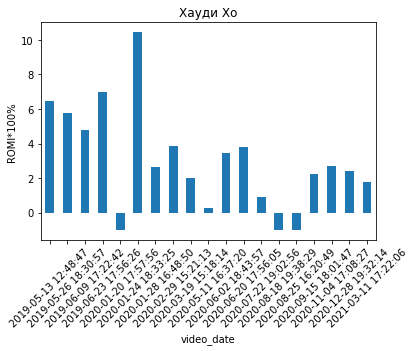

In [241]:
haudi_co.plot( y = 'mean', kind = 'bar', rot=45)
plt.ylabel('ROMI*100%')
plt.title("–•–∞—É–¥–∏ –•–æ")

In [242]:
maxim_cats = data[data['–ù–∞–∑–≤–∞–Ω–∏–µ']=='–ú–∞–∫—Å–∏–º –ö–∞—Ü'].groupby(by = 'video_date')['ROMI2'].mean()

Text(0.5, 1.0, '–ú–∞–∫—Å–∏–º –ö–∞—Ü')

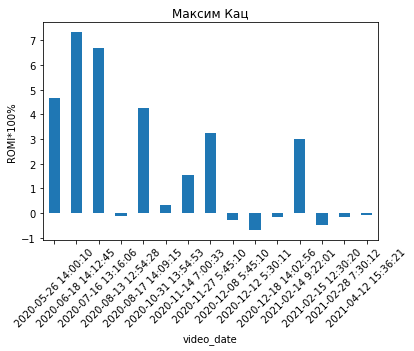

In [243]:
maxim_cats.plot( y = 'mean', kind = 'bar', rot=45)
plt.ylabel('ROMI*100%')
plt.title("–ú–∞–∫—Å–∏–º –ö–∞—Ü")

In [244]:
asafiev = data[data['–ù–∞–∑–≤–∞–Ω–∏–µ']=='–ê—Å–∞—Ñ—å–µ–≤'].groupby(by = 'video_date')['ROMI2'].mean()


Text(0.5, 1.0, '–ê—Å–∞—Ñ—å–µ–≤')

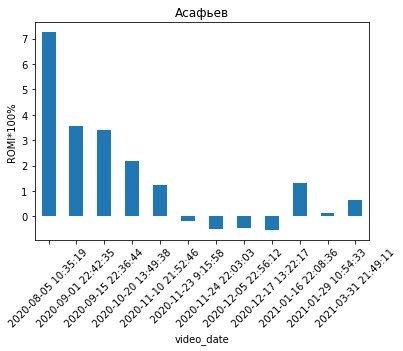

In [245]:
asafiev.plot( y = 'mean', kind = 'bar', rot=45)
plt.ylabel('ROMI*100%')
plt.title("–ê—Å–∞—Ñ—å–µ–≤")

In [246]:
kik_obzor = data[data['–ù–∞–∑–≤–∞–Ω–∏–µ']=='–ö–∏–∫ –û–±–∑–æ—Ä'].groupby(by = 'video_date')['ROMI2'].mean()

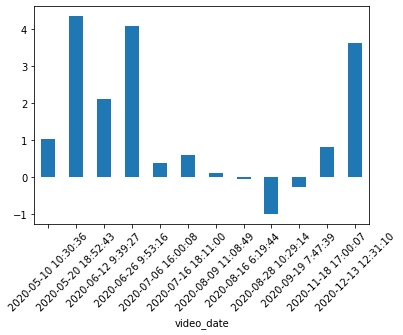

In [247]:
kik_obzor.plot( y = 'mean', kind = 'bar', rot=45)

 –Ω–∞ –∫–∞–∫–æ–π –º–∏–Ω—É—Ç–µ (–ø—Ä–æ—Ü–µ–Ω—Ç –≤—Ä–µ–º–µ–Ω–∏ –æ—Ç –≤–∏–¥–µ–æ) –ª—É—á—à–µ —Ä–∞–∑–º–µ—â–∞—Ç—å—Å—è;

In [248]:
time_of_adver = data.groupby(by = 'part_of_video_with_ad_from1_to_10')['ROMI2'].agg('mean')

Text(0.5, 0, '–ß–∞—Å—Ç—å –≤–∏–¥–µ–æ –≤ –∫–æ—Ç–æ—Ä–æ–π —Ä–∞–∑–º–µ—â–∞–µ—Ç—Å—è —Ä–æ–ª–∏–∫ 10/10')

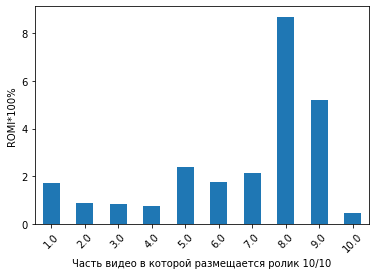

In [249]:
time_of_adver.plot( y = 'mean', kind = 'bar', rot=45)
plt.ylabel('ROMI*100%')
plt.xlabel('–ß–∞—Å—Ç—å –≤–∏–¥–µ–æ –≤ –∫–æ—Ç–æ—Ä–æ–π —Ä–∞–∑–º–µ—â–∞–µ—Ç—Å—è —Ä–æ–ª–∏–∫ 10/10')

–∫–∞–∫ —Ä–∞–∑–º–µ—Ä —Å–∫–∏–¥–∫–∏ –≤–ª–∏—è–µ—Ç –Ω–∞ CTR, –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ª–∏–¥–æ–≤, –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–¥–∞–∂ –∏ ROMI;

In [250]:
data['discount_percentage'].value_counts()

45.00000    176
50.00000    143
55.00000     75
0.00000      61
35.00000     23
60.00000      8
40.00000      6
10.00000      5
25.00000      5
15.00000      3
5.00000       2
20.00000      2
Name: discount_percentage, dtype: int64

Text(0.5, 1.0, '–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å ROMI –æ—Ç —Ä–∞–∑–º–µ—Ä–∞ —Å–∫–∏–¥–∫–∏')

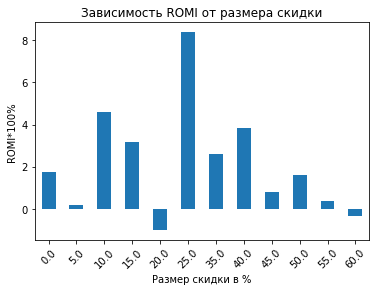

In [251]:
discount_romi = data.groupby(by = 'discount_percentage')['ROMI2'].agg('mean')
discount_romi.plot( y = 'mean', kind = 'bar', rot=45)
plt.ylabel('ROMI*100%')
plt.xlabel('–†–∞–∑–º–µ—Ä —Å–∫–∏–¥–∫–∏ –≤ %')
plt.title("–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å ROMI –æ—Ç —Ä–∞–∑–º–µ—Ä–∞ —Å–∫–∏–¥–∫–∏")

Text(0.5, 1.0, '–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å CTR –æ—Ç —Ä–∞–∑–º–µ—Ä–∞ —Å–∫–∏–¥–∫–∏')

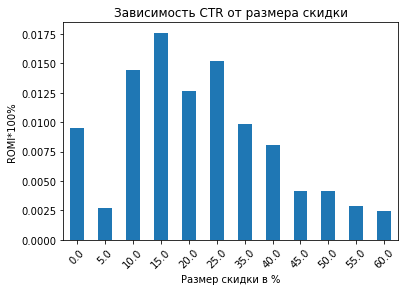

In [252]:
discount_ctr = data.groupby(by = 'discount_percentage')['CTR2'].agg('mean')
discount_ctr.plot( y = 'mean', kind = 'bar', rot=45)
plt.ylabel('ROMI*100%')
plt.xlabel('–†–∞–∑–º–µ—Ä —Å–∫–∏–¥–∫–∏ –≤ %')
plt.title("–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å CTR –æ—Ç —Ä–∞–∑–º–µ—Ä–∞ —Å–∫–∏–¥–∫–∏")

In [253]:
discount_lead = data.groupby(by = 'discount_percentage')['–ó–∞—è–≤–∫–∏_–§–∞–∫—Ç2'].agg('mean')

Text(0.5, 1.0, '–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –ó–∞—è–≤–∫–∏_–§–∞–∫—Ç –æ—Ç —Ä–∞–∑–º–µ—Ä–∞ —Å–∫–∏–¥–∫–∏')

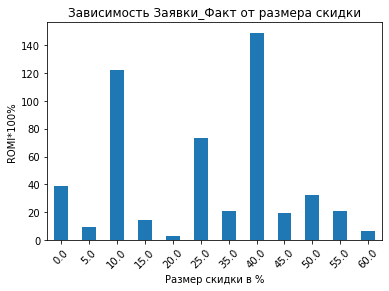

In [254]:
discount_lead.plot( y = 'mean', kind = 'bar', rot=45)
plt.ylabel('ROMI*100%')
plt.xlabel('–†–∞–∑–º–µ—Ä —Å–∫–∏–¥–∫–∏ –≤ %')
plt.title("–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –ó–∞—è–≤–∫–∏_–§–∞–∫—Ç –æ—Ç —Ä–∞–∑–º–µ—Ä–∞ —Å–∫–∏–¥–∫–∏")

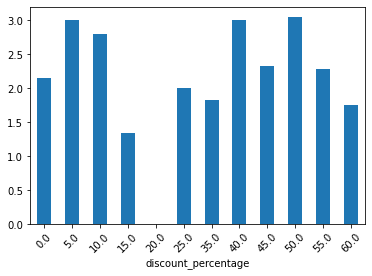

In [255]:
discount_–¥–æ—Ö–æ–¥ = data.groupby(by = 'discount_percentage')['–î–æ—Ö–æ–¥2'].agg('mean')
discount_–¥–æ—Ö–æ–¥.plot( y = 'mean', kind = 'bar', rot=45)

In [256]:
data['likes'].describe()

count      509.00000
mean     21713.57957
std      30618.82665
min          0.00000
25%       5462.00000
50%      13814.00000
75%      25295.00000
max     336394.00000
Name: likes, dtype: float64

—á—Ç–æ –ª—É—á—à–µ: –∫–æ–≥–¥–∞ –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–ª–µ–Ω–∏–µ —Å–∫–∏–¥–∫–∏ –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–æ –ø–æ –≤—Ä–µ–º–µ–Ω–∏ –∏–ª–∏ –Ω–µ –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–æ;

In [257]:
# –ë—É–¥–µ–º —Å—á–∏—Ç–∞—Ç—å, —á—Ç–æ –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–ª–µ–Ω–∏–µ —Å–∫–∏–¥–∫–∏ –Ω–µ –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–æ –ø–æ –≤—Ä–µ–º–µ–Ω–∏, –∫–æ–≥–¥–∞ —É –Ω–∞—Å –≤ –¥–∞–Ω–Ω—ã—Ö Nan,
# –æ—Å—Ç–∞–ª—å–Ω—ã–µ —è—á–µ–π–∫–∏ –∑–∞–ø–æ–ª–Ω–µ–Ω—ã , —Ç–∞–∫ —á—Ç–æ –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∏–µ –µ—Å—Ç—å

In [258]:
data['discount_until_date'].isna().sum()

143

In [259]:
data['discount_until_date'].fillna(0,inplace=True)

In [260]:
data1 = data[data['discount_until_date']==0]

In [261]:
data2 = data[data['discount_until_date']!=0]

In [262]:
data1['ROMI2'].mean()

1.8332867132867139

In [263]:
data1['–î–æ—Ö–æ–¥2'].mean()

2.6573426573426575

In [264]:
data2['ROMI2'].mean()

1.0900546448087425

In [265]:
data2['–î–æ—Ö–æ–¥2'].mean()

2.390710382513661

–°—Ä–∞–≤–Ω–∏–≤ –ø–æ –î–æ—Ö–æ–¥—É –∏ ROMI –ø–æ–ª—É—á–∞–µ–º, —á—Ç–æ –ª—É—á—à–µ, –∫–æ–≥–¥–∞ —Å–∫–∏–¥–∫–∞ –Ω–µ –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∞ –ø–æ –≤—Ä–µ–º–µ–Ω–∏

 —Å–∫–æ–ª—å–∫–æ –≤ —Å—Ä–µ–¥–Ω–µ–º –¥–Ω–µ–π –ª—É—á—à–µ —É–∫–∞–∑—ã–≤–∞—Ç—å –¥–æ –∫–æ–Ω—Ü–∞ —Å–∫–∏–¥–∫–∏, —á—Ç–æ–±—ã –¥–æ–±–∏—Ç—å—Å—è –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–≥–æ —ç—Ñ—Ñ–µ–∫—Ç–∞;

In [266]:
from datetime import datetime, timedelta
data2['video_date1'] = pd.to_datetime(data2['video_date'])


<ipython-input-266-766bef32c8f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['video_date1'] = pd.to_datetime(data2['video_date'])


In [267]:
#data2['discount_until_date1'].values

In [268]:
data2['discount_until_date1'] = data2['discount_until_date'].replace('\u200c31.01.2021','31.01.2021',regex=True)
#'\u200c31.01.2021'
#'1.09.2020'
data2['discount_until_date1'] = data2['discount_until_date1'].replace('1.09.2020','01.09.2020',regex=True)
#'001.09.2020'
data2['discount_until_date1'] = data2['discount_until_date1'].replace('001.09.2020','01.09.2020',regex=True)
#'301.09.2020'
data2['discount_until_date1'] = data2['discount_until_date1'].replace('301.09.2020','30.09.2020',regex=True)
#'31.04.2021'
data2['discount_until_date1'] = data2['discount_until_date1'].replace('31.04.2021','30.04.2021',regex=True)

<ipython-input-268-55c9ef5e1c8d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['discount_until_date1'] = data2['discount_until_date'].replace('\u200c31.01.2021','31.01.2021',regex=True)
<ipython-input-268-55c9ef5e1c8d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['discount_until_date1'] = data2['discount_until_date1'].replace('1.09.2020','01.09.2020',regex=True)
<ipython-input-268-55c9ef5e1c8d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [269]:
data2['discount_until_date2'] = pd.to_datetime(data2['discount_until_date1'], format="%d.%m.%Y")

<ipython-input-269-3d7dfd5c92b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['discount_until_date2'] = pd.to_datetime(data2['discount_until_date1'], format="%d.%m.%Y")


In [270]:
data2['delta'] = data2['discount_until_date2']-data2['video_date1']

<ipython-input-270-dbf0b02e7c68>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['delta'] = data2['discount_until_date2']-data2['video_date1']


In [271]:
delta = data2.groupby(by = 'delta')['ROMI2'].agg('mean')

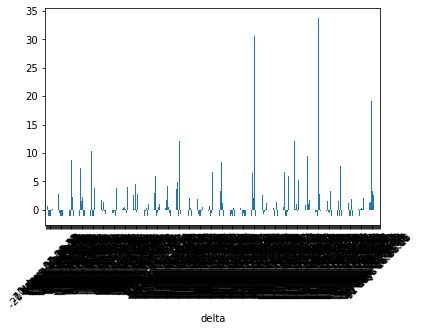

In [272]:
delta.plot( y = 'mean', kind = 'bar', rot=45)

In [273]:
delta.values

array([ 3.430e+00, -2.000e-01,  6.300e-01, -1.000e+00, -1.000e+00,
       -1.000e+00, -1.200e-01,  1.500e-01, -1.000e+00, -1.000e+00,
        6.550e+00,  2.430e+00,  6.600e-01,  5.400e-01,  2.860e+00,
       -6.200e-01, -1.000e+00, -1.000e+00, -1.000e+00,  2.900e-01,
        2.700e-01, -6.200e-01, -2.600e-01,  3.230e+00, -6.200e-01,
       -1.000e+00, -1.000e+00, -1.000e+00,  8.830e+00,  2.330e+00,
       -1.000e+00, -1.000e+00, -1.000e+00,  3.230e+00, -1.000e+00,
       -4.900e-01,  6.100e-01, -1.000e+00,  7.400e+00,  1.510e+00,
        2.210e+00, -1.000e+00, -1.000e+00, -1.000e+00,  2.580e+00,
       -1.000e+00,  5.300e-01, -1.000e+00, -1.000e+00, -1.000e+00,
        1.044e+01, -1.000e+00, -1.000e+00,  3.840e+00, -1.200e-01,
       -1.000e+00, -1.000e+00,  5.530e+00, -1.000e+00,  2.000e+00,
       -1.900e-01,  1.680e+00, -2.200e-01,  1.380e+00, -1.600e-01,
       -7.900e-01, -1.000e+00,  1.410e+00,  6.200e-01, -1.000e+00,
       -1.000e+00,  5.800e-01, -3.700e-01, -5.500e-01, -5.100e

In [274]:
data2.head()

–≥–æ–¥        –î–∞—Ç–∞    –ú–µ—Å—è—Ü     –ù–∞–∑–≤–∞–Ω–∏–µ      –§–æ—Ä–º–∞—Ç –¢–µ–≥_(–∫—É—Ä—Å)  \
2   2020  15.01.2020   —è–Ω–≤–∞—Ä—å  PRO —Ä–æ–±–æ—Ç–æ–≤  –ò–Ω—Ç–µ–≥—Ä–∞—Ü–∏—è        DST   
3   2020  15.01.2020   —è–Ω–≤–∞—Ä—å     –•–∞—É–¥–∏ –•–æ  –ò–Ω—Ç–µ–≥—Ä–∞—Ü–∏—è        PWS   
4   2020  15.01.2020   —è–Ω–≤–∞—Ä—å      Foo52ru  –ò–Ω—Ç–µ–≥—Ä–∞—Ü–∏—è        DST   
9   2020  01.02.2020  —Ñ–µ–≤—Ä–∞–ª—å  PRO —Ä–æ–±–æ—Ç–æ–≤  –ò–Ω—Ç–µ–≥—Ä–∞—Ü–∏—è        DST   
10  2020  01.02.2020  —Ñ–µ–≤—Ä–∞–ª—å     –•–∞—É–¥–∏ –•–æ    –ü—Ä–µ-—Ä–æ–ª–ª        PWS   

         –õ–∏–Ω–µ–π–∫–∞ –ü–æ–¥–ø–∏—Å—á–∏–∫–∏ –û—Ö–≤–∞—Ç_–§–∞–∫—Ç    –†–∞—Å—Ö–æ–¥   CPC    –°TR –í–∏–∑–∏—Ç—ã_–§–∞–∫—Ç  \
2   Data Science     38¬†000      6¬†900   —Ä.7¬†500  —Ä.46  2,38%         164   
3         –ö–æ–¥–∏–Ω–≥    842¬†000     50¬†000  —Ä.25¬†000  —Ä.15  3,39%        1697   
4   Data Science     35¬†000     22¬†000  —Ä.25¬†000  —Ä.60  1,90%         418   
9   Data Science     38¬†000     18¬†000   —Ä.7¬†500  —Ä.89  0,47%          84   
10        –ö–æ–¥–∏–Ω–≥    992¬†000    295¬†000  —Ä.30¬†000  —Ä.13  0,76%        2249   

   –°1_–§–∞–∫—Ç  –ó–∞—è–≤–∫–∏_–§–∞–∫—Ç –°2_–§–∞–∫—Ç –û–ø–ª–∞—Ç—ã_–§–∞–∫—Ç  –î–æ—Ö–æ–¥      CPL   ROMI  \
2     7,9%     13.00000   23,1%           3      4    —Ä.577  3380%   
3     6,5%    111.00000    5,4%           6      4    —Ä.225  1044%   
4     4,3%     18.00000   11,1%           2      3  —Ä.1¬†389   620%   
9     4,8%      4.00000    0,0%           0      0  —Ä.1¬†875  -100%   
10   14,4%    324.00000    0,9%           3      3     —Ä.93   384%   

                                               link_x    link_true  \
2   https://www.youtube.com/watch?v=mk8OsCBZ-yw&fe...  mk8OsCBZ-yw   
3                        https://youtu.be/M8fhrtvedHA  M8fhrtvedHA   
4         https://www.youtube.com/watch?v=J9ZgrTAFw60  J9ZgrTAFw60   
9                        https://youtu.be/3oZsjfpmwwI  3oZsjfpmwwI   
10        https://www.youtube.com/watch?v=tqQnUio-j4g  tqQnUio-j4g   

                                         link_y  \
2   https://www.youtube.com/watch?v=mk8OsCBZ-yw   
3   https://www.youtube.com/watch?v=M8fhrtvedHA   
4   https://www.youtube.com/watch?v=J9ZgrTAFw60   
9   https://www.youtube.com/watch?v=3oZsjfpmwwI   
10  https://www.youtube.com/watch?v=tqQnUio-j4g   

                     channel_name  channel_subscribers  \
2                     PRO —Ä–æ–±–æ—Ç–æ–≤         136000.00000   
3   –•–∞—É–¥–∏ –•–æ‚Ñ¢ - –ü—Ä–æ—Å—Ç–æ –æ –º–∏—Ä–µ IT!        1560000.00000   
4              foo52ru –¢–µ—Ö–Ω–æ–®–∞–º–∞–Ω          62100.00000   
9                     PRO —Ä–æ–±–æ—Ç–æ–≤         136000.00000   
10  –•–∞—É–¥–∏ –•–æ‚Ñ¢ - –ü—Ä–æ—Å—Ç–æ –æ –º–∏—Ä–µ IT!        1560000.00000   

                                           video_name           video_date  \
2   20+ –°–∞–º—ã—Ö –ù–µ–≤–µ—Ä–æ—è—Ç–Ω—ã—Ö –ò–∑–æ–±—Ä–µ—Ç–µ–Ω–∏–π, –ö–æ—Ç–æ—Ä—ã–µ –ò–∑–º...  2020-01-23 13:33:38   
3                       –ü–∏—à–µ–º TELEGRAM –±–æ—Ç–∞ –Ω–∞ Python  2020-01-24 18:33:25   
4   –ù–µ–π—Ä–æ–Ω–Ω–∞—è —Å–µ—Ç—å. –ß–∞—Å—Ç—å 6. –ü—Ä–∏–∫—Ä—É—á–∏–≤–∞—é –Ω–µ–π—Ä–æ—Å–µ—Ç—å...   2020-01-24 4:44:31   
9   –ß–µ–º –æ—Ç–ª–∏—á–∏–ª—Å—è —Ä–æ–±–æ—Ç Spot –æ—Ç Boston Dynamics? –î...  2020-02-27 13:58:29   
10  –ö–∞–∫ —Å–æ–∑–¥–∞—Ç—å Android –∏–≥—Ä—É –∑–∞ 10 –º–∏–Ω—É—Ç –Ω–∞ —è–∑—ã–∫–µ ...  2020-02-29 15:21:13   

    video_year video_month day_of_week        views video_duration  \
2   2020.00000     January    Thursday 112566.00000         10M14S   
3   2020.00000     January      Friday 560514.00000         12M58S   
4   2020.00000     January      Friday  59620.00000          9M23S   
9   2020.00000    February    Thursday  19406.00000          9M28S   
10  2020.00000    February    Saturday 633849.00000          7M35S   

   time_of_advertisement  part_of_video_with_ad_from1_to_10  \
2                  04m13                            5.00000   
3                  06m52                            6.00000   
4                  00m43                            2.00000   
9                  02m32   

## –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –Ω–∞–∏–≤–Ω–æ–π –º–æ–¥–µ–ª–∏

In [275]:
# –ü–æ—Å—Ç—Ä–æ–∏–º –Ω–∞–∏–≤–Ω—É—é –º–æ–¥–µ–ª—å –Ω–∞ –æ—Å–Ω–æ–≤–µ –æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã—Ö —á–∏—Å–ª–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤. –í –∫–∞—á–µ—Å—Ç–≤–µ –º–µ—Ç—Ä–∏–∫–∏ –≤–æ–∑—å–º–µ–º MAPE,
# —á—Ç–æ–±—ã –≤ –¥–∞–ª—å–Ω–µ–π—à–µ–º –æ—Ü–µ–Ω–∏–≤–∞—Ç—å –Ω–∞—Å–∫–æ–ª—å–∫–æ –º–æ–¥–µ–ª—å –ª—É—á—à–µ/—Ö—É–∂–µ –∏—Å—Ö–æ–¥–Ω–æ–π

In [276]:
num_cols

['–ü–æ–¥–ø–∏—Å—á–∏–∫–∏2',
 '–û—Ö–≤–∞—Ç_–§–∞–∫—Ç2',
 '–†–∞—Å—Ö–æ–¥2',
 'CPC2',
 'CTR2',
 '–í–∏–∑–∏—Ç—ã_–§–∞–∫—Ç2',
 '–°1_–§–∞–∫—Ç2',
 '–ó–∞—è–≤–∫–∏_–§–∞–∫—Ç2',
 '–°2_–§–∞–∫—Ç2',
 '–û–ø–ª–∞—Ç—ã_–§–∞–∫—Ç2',
 '–î–æ—Ö–æ–¥2',
 'CPL2',
 'ROMI2',
 'channel_subscribers',
 'views',
 'time_of_advertisement5',
 'comments',
 'likes',
 'dislikes',
 'discount_percentage',
 'ER']

In [277]:
data_model1 = data[num_cols]

In [278]:
data_model1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 0 to 586
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   –ü–æ–¥–ø–∏—Å—á–∏–∫–∏2             509 non-null    float64
 1   –û—Ö–≤–∞—Ç_–§–∞–∫—Ç2             509 non-null    float64
 2   –†–∞—Å—Ö–æ–¥2                 509 non-null    float64
 3   CPC2                    509 non-null    float64
 4   CTR2                    509 non-null    float64
 5   –í–∏–∑–∏—Ç—ã_–§–∞–∫—Ç2            509 non-null    float64
 6   –°1_–§–∞–∫—Ç2                509 non-null    float64
 7   –ó–∞—è–≤–∫–∏_–§–∞–∫—Ç2            509 non-null    float64
 8   –°2_–§–∞–∫—Ç2                509 non-null    float64
 9   –û–ø–ª–∞—Ç—ã_–§–∞–∫—Ç2            509 non-null    float64
 10  –î–æ—Ö–æ–¥2                  509 non-null    int64  
 11  CPL2                    509 non-null    float64
 12  ROMI2                   509 non-null    float64
 13  channel_subscribers     5

In [279]:
X = data_model1.drop(['ROMI2'], axis=1).values
y = data_model1['ROMI2'].values

In [280]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [281]:
lr = LinearRegression()
lr.fit(X_train, y_train)
predict_test = lr.predict(X_test)

In [282]:
print(f"–¢–æ—á–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ –ø–æ –º–µ—Ç—Ä–∏–∫–µ MAPE: {(mean_absolute_percentage_error(y_test, predict_test))*100:0.2f}%")

–¢–æ—á–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ –ø–æ –º–µ—Ç—Ä–∏–∫–µ MAPE: 177.01%


## –ú–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–µ:

In [283]:
# –º–æ–¥–µ–ª—å —Å –æ—Ç—Ñ–∏–ª—å—Ç—Ä–æ–≤–∞–Ω–Ω—ã–º–∏ —á–∏—Å–ª–æ–≤—ã–º–∏ —Å—Ç–æ–ª–±—Ü–∞–º–∏( –æ—Å—Ç–∞–≤–∏–º —Ç–æ–ª—å–∫–æ —Ç–µ –ø—Ä–∏–∑–Ω–∞–∫–∏, –∫–æ—Ç–æ—Ä—ã–µ —É–ª—É—á—à–∞—é—Ç –º–µ—Ç—Ä–∏–∫—É)
data_model3 = data[[
 '–û—Ö–≤–∞—Ç_–§–∞–∫—Ç2',
 '–†–∞—Å—Ö–æ–¥2',
  'CTR2',
  '–°2_–§–∞–∫—Ç2',
 '–û–ø–ª–∞—Ç—ã_–§–∞–∫—Ç2',
 '–î–æ—Ö–æ–¥2',
  'ROMI2',
 'channel_subscribers',
  'time_of_advertisement5',
 'comments',
 'likes',
 'dislikes',
 
 
                  ]]
X = data_model3.drop(['ROMI2'], axis=1).values
y = data_model3['ROMI2'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
predict_test = lr.predict(X_test)
print(f"–¢–æ—á–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ –ø–æ –º–µ—Ç—Ä–∏–∫–µ MAPE: {(mean_absolute_percentage_error(y_test, predict_test))*100:0.2f}%")

–¢–æ—á–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ –ø–æ –º–µ—Ç—Ä–∏–∫–µ MAPE: 147.90%


In [284]:
# –º–æ–¥–µ–ª—å —Å –æ—Ç—Ñ–∏–ª—å—Ç—Ä–æ–≤–∞–Ω–Ω—ã–º–∏ —á–∏—Å–ª–æ–≤—ã–º–∏ + feature —Å—Ç–æ–ª–±—Ü–∞–º–∏ (–¥–æ–±–∞–≤–∏–º –≤ –º–æ–¥–µ–ª—å –Ω–æ–≤—ã–µ —Å—Ç–æ–ª–±—Ü—ã, —É–ª—É—á—à–∞—é—â–∏–µ –º–µ—Ç—Ä–∏–∫—É)
data_model4 = data[[
 '–û—Ö–≤–∞—Ç_–§–∞–∫—Ç2',
 '–†–∞—Å—Ö–æ–¥2',
  'CTR2',
  '–°2_–§–∞–∫—Ç2',
 '–û–ø–ª–∞—Ç—ã_–§–∞–∫—Ç2',
 '–î–æ—Ö–æ–¥2',
  'ROMI2',
 'channel_subscribers',
  'time_of_advertisement5',
 'comments',
 'likes',
 'dislikes',
    '–õ–∏–Ω–µ–π–∫–∞3_romi','–≥–æ–¥_romi','time_of_advertisement6_romi'
 
 
                  ]]
X = data_model4.drop(['ROMI2'], axis=1).values
y = data_model4['ROMI2'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
predict_test = lr.predict(X_test)
print(f"–¢–æ—á–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ –ø–æ –º–µ—Ç—Ä–∏–∫–µ MAPE: {(mean_absolute_percentage_error(y_test, predict_test))*100:0.2f}%")

–¢–æ—á–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ –ø–æ –º–µ—Ç—Ä–∏–∫–µ MAPE: 125.49%


In [285]:
data.columns

Index(['–≥–æ–¥', '–î–∞—Ç–∞', '–ú–µ—Å—è—Ü', '–ù–∞–∑–≤–∞–Ω–∏–µ', '–§–æ—Ä–º–∞—Ç', '–¢–µ–≥_(–∫—É—Ä—Å)', '–õ–∏–Ω–µ–π–∫–∞',
       '–ü–æ–¥–ø–∏—Å—á–∏–∫–∏', '–û—Ö–≤–∞—Ç_–§–∞–∫—Ç', '–†–∞—Å—Ö–æ–¥', 'CPC', '–°TR', '–í–∏–∑–∏—Ç—ã_–§–∞–∫—Ç',
       '–°1_–§–∞–∫—Ç', '–ó–∞—è–≤–∫–∏_–§–∞–∫—Ç', '–°2_–§–∞–∫—Ç', '–û–ø–ª–∞—Ç—ã_–§–∞–∫—Ç', '–î–æ—Ö–æ–¥', 'CPL',
       'ROMI', 'link_x', 'link_true', 'link_y', 'channel_name',
       'channel_subscribers', 'video_name', 'video_date', 'video_year',
       'video_month', 'day_of_week', 'views', 'video_duration',
       'time_of_advertisement', 'part_of_video_with_ad_from1_to_10',
       'video_category', 'comments', 'likes', 'dislikes', 'tags',
       'description', 'promocode', 'discount_percentage',
       'discount_until_date', 'ER', '–ü–æ–¥–ø–∏—Å—á–∏–∫–∏2', '–û—Ö–≤–∞—Ç_–§–∞–∫—Ç2', '–†–∞—Å—Ö–æ–¥2',
       'CPC2', 'CTR2', '–í–∏–∑–∏—Ç—ã_–§–∞–∫—Ç2', '–°1_–§–∞–∫—Ç2', '–ó–∞—è–≤–∫–∏_–§–∞–∫—Ç2', '–°2_–§–∞–∫—Ç2',
       '–û–ø–ª–∞—Ç—ã_–§–∞–∫—Ç2', '–î–æ—Ö–æ–¥2', 'CPL2', 'R

In [286]:
# –º–æ–¥–µ–ª—å —Å –æ—Ç—Ñ–∏–ª—å—Ç—Ä–æ–≤–∞–Ω–Ω—ã–º–∏ —á–∏—Å–ª–æ–≤—ã–º–∏ + feature —Å—Ç–æ–ª–±—Ü–∞–º–∏+ dummy —Å—Ç–æ–ª–±—Ü–∞–º–∏
# –í–∏–¥–∏–º, —á—Ç–æ –º–µ—Ç—Ä–∏–∫–∞ —É—Ö—É–¥—à–∏–ª–∞—Å—å, –Ω–µ –±—É–¥–µ–º –∏—Ö –¥–∞–ª—å—à–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å
data_model4 = data[[
 '–û—Ö–≤–∞—Ç_–§–∞–∫—Ç2',
 '–†–∞—Å—Ö–æ–¥2',
  'CTR2',
  '–°2_–§–∞–∫—Ç2',
 '–û–ø–ª–∞—Ç—ã_–§–∞–∫—Ç2',
 '–î–æ—Ö–æ–¥2',
  'ROMI2',
 'channel_subscribers',
  'time_of_advertisement5',
 'comments',
 'likes',
 'dislikes',
    '–õ–∏–Ω–µ–π–∫–∞3_romi','–≥–æ–¥_romi','time_of_advertisement6_romi',
    '–õ–∏–Ω–µ–π–∫–∞_nums_1', '–õ–∏–Ω–µ–π–∫–∞_nums_2', '–õ–∏–Ω–µ–π–∫–∞_nums_3', '–õ–∏–Ω–µ–π–∫–∞_nums_4',
       '–õ–∏–Ω–µ–π–∫–∞_nums_5', '–õ–∏–Ω–µ–π–∫–∞_nums_6', '–õ–∏–Ω–µ–π–∫–∞_nums_7', '–º–µ—Å—è—Ü_nums_0',
       '–º–µ—Å—è—Ü_nums_1', '–º–µ—Å—è—Ü_nums_2', '–º–µ—Å—è—Ü_nums_3', '–º–µ—Å—è—Ü_nums_4',
       '–º–µ—Å—è—Ü_nums_5', '–º–µ—Å—è—Ü_nums_6', '–º–µ—Å—è—Ü_nums_7', '–º–µ—Å—è—Ü_nums_8',
       '–º–µ—Å—è—Ü_nums_9', '–º–µ—Å—è—Ü_nums_10', '–º–µ—Å—è—Ü_nums_11', '–º–µ—Å—è—Ü_nums_12',
       '–≥–æ–¥_nums_1', '–≥–æ–¥_nums_2', '–≥–æ–¥_nums_3'
    
 
 
                  ]]
X = data_model4.drop(['ROMI2'], axis=1).values
y = data_model4['ROMI2'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
predict_test = lr.predict(X_test)
print(f"–¢–æ—á–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ –ø–æ –º–µ—Ç—Ä–∏–∫–µ MAPE: {(mean_absolute_percentage_error(y_test, predict_test))*100:0.2f}%")

–¢–æ—á–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ –ø–æ –º–µ—Ç—Ä–∏–∫–µ MAPE: 146.39%


–ü–æ–ø—Ä–æ–±—É–µ–º –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞—Ç—å —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é

In [287]:

data_model5 = data[[
 '–û—Ö–≤–∞—Ç_–§–∞–∫—Ç2',
 '–†–∞—Å—Ö–æ–¥2',
    'CPC2',
  'CTR2',
  '–°2_–§–∞–∫—Ç2',
 '–û–ø–ª–∞—Ç—ã_–§–∞–∫—Ç2',
 '–î–æ—Ö–æ–¥2',
  'ROMI2',
 'channel_subscribers',
  'time_of_advertisement5',
 'comments',
 'likes',
 'dislikes',
    '–õ–∏–Ω–µ–π–∫–∞3_romi','–≥–æ–¥_romi','time_of_advertisement6_romi',
    
 
 
                  ]]
X = data_model5.drop(['ROMI2'], axis=1).values
data_model5['ROMI2'] = data_model5['ROMI2']+2 # –î–æ–±–∞–ª—è–µ–º 2, —á—Ç–æ–±—ã –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–∏–µ –Ω–µ –≤—ã–¥–∞–≤–∞–ª–æ –æ—à–∏–±–∫—É –Ω–∞ –Ω—É–ª–µ–≤—ã—Ö –∏ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏—è—Ö
y = data_model5['ROMI2'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
lr = LinearRegression()
lr.fit(X_train, np.log(y_train ))
predict_test = np.exp(lr.predict(X_test))
print(f"–¢–æ—á–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ –ø–æ –º–µ—Ç—Ä–∏–∫–µ MAPE: {(mean_absolute_percentage_error(y_test, predict_test))*100:0.2f}%")

–¢–æ—á–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ –ø–æ –º–µ—Ç—Ä–∏–∫–µ MAPE: 27.63%


<ipython-input-287-8aeac84bc239>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model5['ROMI2'] = data_model5['ROMI2']+2 # –î–æ–±–∞–ª—è–µ–º 2, —á—Ç–æ–±—ã –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–∏–µ –Ω–µ –≤—ã–¥–∞–≤–∞–ª–æ –æ—à–∏–±–∫—É –Ω–∞ –Ω—É–ª–µ–≤—ã—Ö –∏ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏—è—Ö


In [288]:
# –ú–æ–¥–µ–ª—å –Ω–∞ –æ—Å–Ω–æ–≤–µ CatBoostRegressor 
# –ü—Ä–æ–±—É–µ–º –ø—Ä–∏–º–µ–Ω–∏—Ç—å –∫ –Ω–∞—à–∏–º –¥–∞–Ω–Ω—ã–º –º–æ–¥–µ–ª—å –Ω–∞ –æ—Å–Ω–æ–≤–µ —ç—Ç–æ–≥–æ –∞–ª–≥–æ—Ä–∏—Ç–º–∞ –∏ –ø–æ–ª—É—á–∞–µ–º –Ω–µ–ø–ª–æ—Ö–æ–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç!
model = CatBoostRegressor(iterations = 10000,
                          random_seed = 42,
                          eval_metric='MAPE',
                          custom_metric=['R2', 'MAE'],
                          silent=True,
                         )
model.fit(X_train, np.log(y_train ),
         #cat_features=cat_features_ids,
         eval_set=(X_test, np.log(y_test)),
         verbose_eval=0,
         use_best_model=True,
         plot=True
         )
predict_test = np.exp(model.predict(X_test))
print(f"–¢–æ—á–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ –ø–æ –º–µ—Ç—Ä–∏–∫–µ MAPE: {(mean_absolute_percentage_error(y_test, predict_test))*100:0.2f}%")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

–¢–æ—á–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ –ø–æ –º–µ—Ç—Ä–∏–∫–µ MAPE: 11.32%


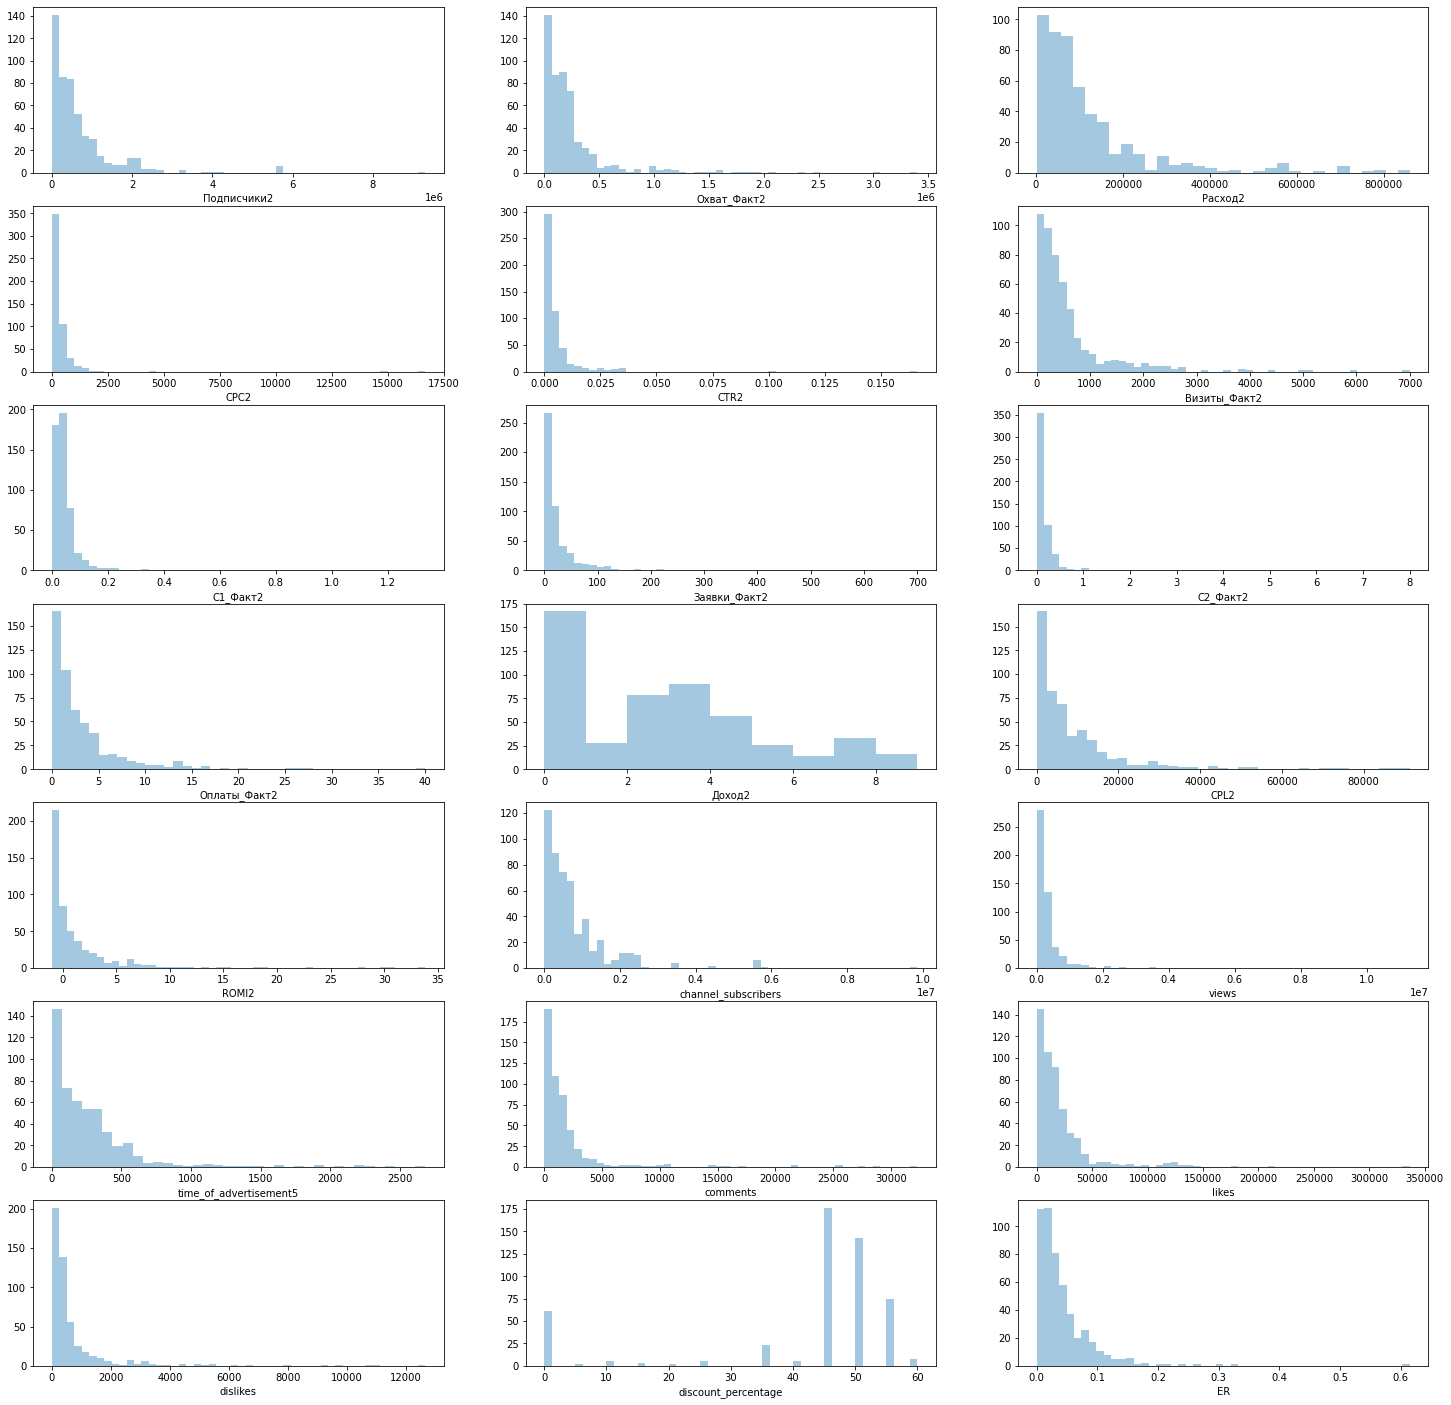

In [289]:
fig, axes = plt.subplots(7,3, figsize=(25,25))

for i,col in enumerate(num_cols):
    sns.distplot(data[col], kde=False, ax=axes.flat[i])

In [290]:
# –ü—Ä–æ–ª–æ–≥–æ—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–ª–∏ –≤—Å–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ:
# –ü–æ –≥—Ä–∞—Ñ–∏–∫–∞–º –≤—ã—à–µ –≤–¥–Ω–æ, —á—Ç–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –Ω–µ –Ω–æ—Ä–º–∞–ª—å–Ω—ã–µ –∏ —Å–∏–ª—å–Ω–æ —Å–º–µ—â–µ–Ω—ã,
# –ø–æ–ø—Ä–æ–±—É–µ–º –ø—Ä–æ–ª–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞—Ç—å –≤—Å–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –º–æ–¥–µ–ª–∏, –∏ –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –∫–∞–∫ —ç—Ç–æ –æ—Ç—Ä–∞–∑–∏—Ç—Å—è –Ω–∞ –µ–µ –∫–∞—á–µ—Å—Ç–≤–µ:

data_model55 = data[[
 '–û—Ö–≤–∞—Ç_–§–∞–∫—Ç2',
 '–†–∞—Å—Ö–æ–¥2',
    'CPC2',
  'CTR2',
  '–°2_–§–∞–∫—Ç2',
 '–û–ø–ª–∞—Ç—ã_–§–∞–∫—Ç2',
 '–î–æ—Ö–æ–¥2',
  'ROMI2',
 'channel_subscribers',
  'time_of_advertisement5',
 'comments',
 'likes',
 'dislikes',
    '–õ–∏–Ω–µ–π–∫–∞3_romi','–≥–æ–¥_romi','time_of_advertisement6_romi',
    
 
 
                  ]]
X = data_model55.drop(['ROMI2'], axis=1).values
X = np.log(X+2)
data_model55['ROMI2'] = data_model55['ROMI2']+2
y = data_model55['ROMI2'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
lr = LinearRegression()
lr.fit(X_train, np.log(y_train ))
predict_test = np.exp(lr.predict(X_test))
print(f"–¢–æ—á–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ –ø–æ –º–µ—Ç—Ä–∏–∫–µ MAPE: {(mean_absolute_percentage_error(y_test, predict_test))*100:0.2f}%")

–¢–æ—á–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ –ø–æ –º–µ—Ç—Ä–∏–∫–µ MAPE: 25.84%


<ipython-input-290-cfdbabbbfad5>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model55['ROMI2'] = data_model55['ROMI2']+2


In [291]:
# –ú–æ–¥–µ–ª—å –Ω–∞ –æ—Å–Ω–æ–≤–µ CatBoostRegressor –¥–∞–µ—Ç –Ω–∞–∏–ª—É—á—à–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫–∏
model = CatBoostRegressor(iterations = 10000,
                          random_seed = 42,
                          eval_metric='MAPE',
                          custom_metric=['R2', 'MAE'],
                          silent=True,
                         )
model.fit(X_train, np.log(y_train ),
         #cat_features=cat_features_ids,
         eval_set=(X_test, np.log(y_test)),
         verbose_eval=0,
         use_best_model=True,
         plot=True
         )
predict_test = np.exp(model.predict(X_test))
print(f"–¢–æ—á–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ –ø–æ –º–µ—Ç—Ä–∏–∫–µ MAPE: {(mean_absolute_percentage_error(y_test, predict_test))*100:0.2f}%")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

–¢–æ—á–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ –ø–æ –º–µ—Ç—Ä–∏–∫–µ MAPE: 11.31%


In [292]:
# –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –º–æ–¥–µ–ª–∏ –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å–∏–∏:
lr.coef_

array([ 1.34436568e-02, -2.99438291e-01, -7.55593426e-02,  1.54121397e+01,
        1.46641074e-01, -3.95924917e-02,  1.35876163e+00, -1.78201460e-02,
       -3.89836610e-04, -7.60819891e-02,  1.04528170e-01, -4.81285136e-03,
       -5.52586336e-02,  1.18830376e-01,  2.00980140e-01])

### –ú–æ–¥–µ–ª—å –Ω–∞ –æ—Å–Ω–æ–≤–µ CatBoostRegressor –¥–∞–µ—Ç –Ω–∞–∏–ª—É—á—à–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫–∏ MAPE: 11.31%